In [4]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.cluster import KMeans

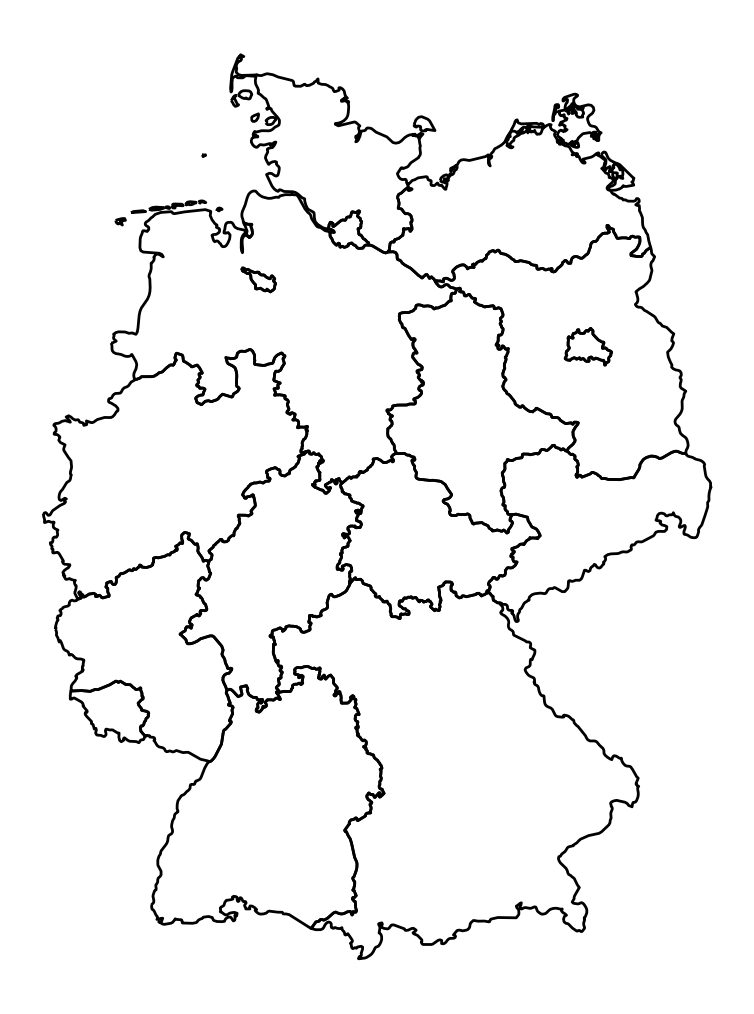

In [ ]:
# pip install geopandas matplotlib pyproj shapely
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Natural Earth Admin-1 (states/provinces)
URL_LAENDER = "https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces.zip"

# Load + filter Germany; use a Europe-friendly equal-area projection for clean shapes
adm1 = gpd.read_file(URL_LAENDER)
de_states = adm1[adm1["admin"] == "Germany"].to_crs(3035)  # EPSG:3035 (ETRS89 / LAEA Europe)

# Improve line aesthetics and avoid rasterization
mpl.rcParams["pdf.use14corefonts"] = True       # vector text
mpl.rcParams["lines.solid_joinstyle"] = "round"
mpl.rcParams["lines.solid_capstyle"] = "round"

fig, ax = plt.subplots(figsize=(8, 10))         # larger canvas -> crisper perception
# Plot boundaries with thicker lines
coll = de_states.boundary.plot(ax=ax, linewidth=2, color="black")

# Ensure nothing is rasterized in vector backends
for c in ax.collections:
    c.set_rasterized(False)
ax.set_axis_off()
plt.tight_layout(pad=0.2)

# Pure vector exports (crisp at any zoom)
#plt.savefig("../01Figures/germany_states.pdf", bbox_inches="tight")   # vector PDF
#plt.savefig("../01Figures/germany_states.svg", bbox_inches="tight")   # vector SVG

# Optional: a high-DPI raster export for slides or docs that don't like PDF/SVG
#plt.savefig("../01Figures/germany_states.png", dpi=600, bbox_inches="tight")

plt.show()


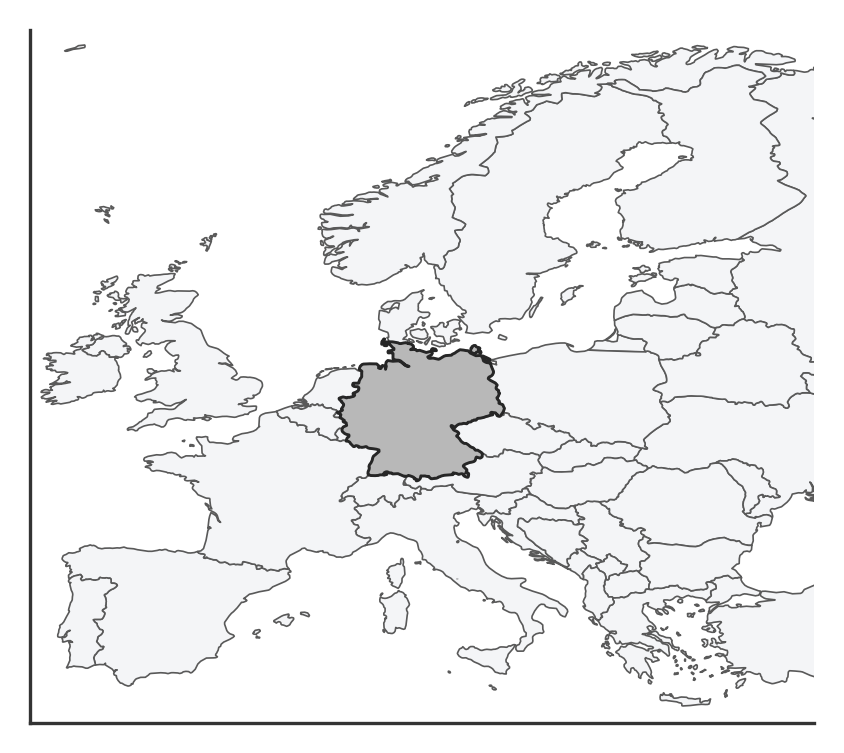

Saved europe_germany.pdf


In [14]:
# europe_germany_map_neurl.py
# pip install geopandas matplotlib

import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ---------- Styling ----------
rcParams.update({
    "figure.dpi": 300,
    "savefig.dpi": 300,
    "font.size": 10,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": "0.2",
})

# Natural Earth Admin-0 (countries), 1:50m scale (nice balance of detail/size)
NE_URL = "https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_countries.zip"

# Read directly from the URL (Fiona supports zip:// over HTTP)
world = gpd.read_file(NE_URL)

# Column names in Natural Earth (Admin-0)
# 'ADMIN' is the English country name; 'CONTINENT' is the continent.
name_col = "ADMIN" if "ADMIN" in world.columns else "NAME"
cont_col = "CONTINENT" if "CONTINENT" in world.columns else None

# Subset to Europe (keep Turkey/Russia to complete the map context)
if cont_col is not None:
    europe = world[world[cont_col].isin(["Europe"]) | world[name_col].isin(["Turkey", "Russia"])].copy()
else:
    # Fallback: geographic crop if continent column is missing
    europe = world.cx[-11:32, 34:72].copy()

# Germany geometry
germany = world[world[name_col] == "Germany"].copy()
if germany.empty:
    raise RuntimeError("Germany not found in the dataset. Inspect columns and values.")

# ---------- Plot ----------
fig, ax = plt.subplots(figsize=(10.0, 3))  # 1-col figure size

# Base Europe
europe.plot(ax=ax, color="#f4f5f7", edgecolor="0.35", linewidth=0.4)

# Highlight Germany
germany.plot(ax=ax, color="#b8b8b8", edgecolor="0.15", linewidth=0.7, zorder=3)

# Optional label at centroid (safe for multipolygons)
gcent = germany.to_crs(3857).geometry.centroid.to_crs(4326).iloc[0]

# Frame Europe
ax.set_xlim(-11.0, 32.0)
ax.set_ylim(34.0, 72.0)
ax.set_aspect("equal")

# Clean axes
ax.set_xticks([]); ax.set_yticks([])
ax.set_xlabel(""); ax.set_ylabel("")

# ---------- Save as vector PDF ----------
out_pdf = "europe_germany.pdf"
plt.show()#savefig(out_pdf, bbox_inches="tight")
print(f"Saved {out_pdf}")


             009_I2
count  4.120547e+06
mean   3.182519e-01
std    1.958922e+00
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    2.012500e+01


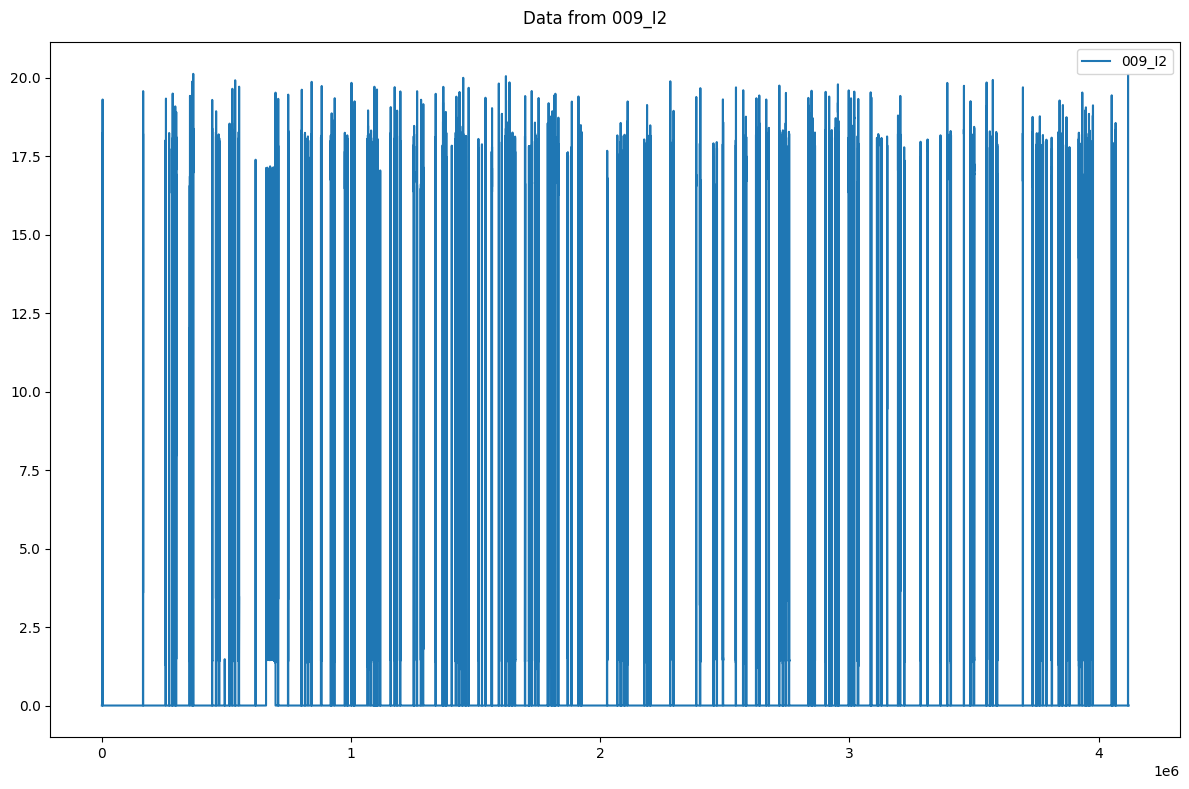

In [5]:
# Set base path
base_path = r'dataset\AVT02_SolderOven'

# Get list of subfolders
subfolders = sorted([f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))])

# Select by index (0 for first)
index = 9 -1
selected_subfolder = subfolders[index]

# Full path to the .csv.xz file
file_path = os.path.join(base_path, selected_subfolder, f'2019_{selected_subfolder}.csv.xz')

# Load the CSV file
df = pd.read_csv(file_path)

# Display first few rows (optional)
print(df.describe())

# Plot the first few columns
df.iloc[:, :].plot(subplots=True, figsize=(12, 8), title=f"Data from {selected_subfolder}")
plt.tight_layout()
plt.show()

        012_P_total
count  4.120547e+06
mean   9.915886e-02
std    6.862629e-01
min   -1.000000e-02
25%    0.000000e+00
50%    0.000000e+00
75%    0.000000e+00
max    8.630000e+00


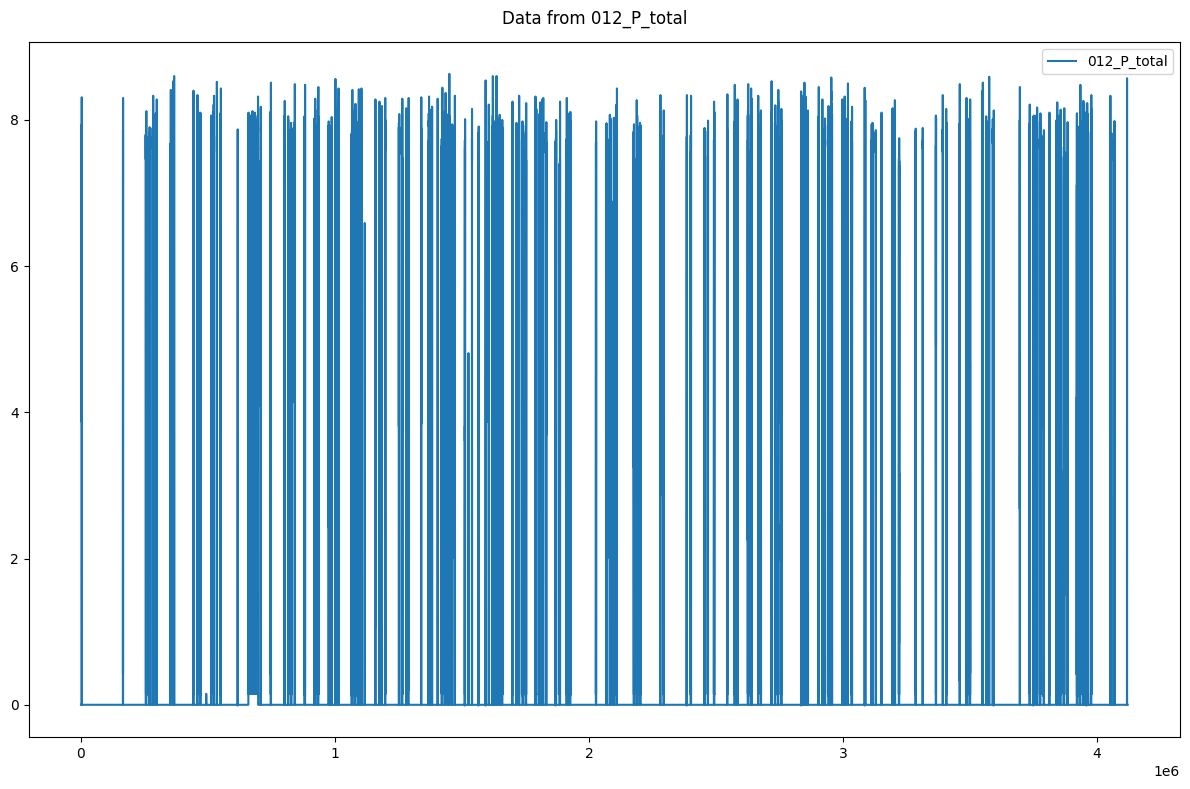

In [27]:
# Set base path
base_path = r'dataset\AVT02_SolderOven'

# Get list of subfolders
subfolders = sorted([f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))])

# Select by index (0 for first)
index = 10 +1
selected_subfolder = subfolders[index]

# Full path to the .csv.xz file
file_path = os.path.join(base_path, selected_subfolder, f'2019_{selected_subfolder}.csv.xz')

# Load the CSV file
df = pd.read_csv(file_path)

# Display first few rows (optional)
print(df.describe())

# Plot the first few columns
df.iloc[:, :].plot(subplots=True, figsize=(12, 8), title=f"Data from {selected_subfolder}")
plt.tight_layout()
plt.show()


### Helper Functions

In [12]:
measurement_dict = {
    0: {'unit': 'h', 'short_desc': 'OpHours', 'long_desc': 'Operating hours counter'},
    1: {'unit': 'V', 'short_desc': 'U12', 'long_desc': 'Effective value of the Line voltage between phase 1 and 2 (U12)'},
    2: {'unit': 'V', 'short_desc': 'U23', 'long_desc': 'Effective value of the Line voltage between phase 2 and 3 (U23)'},
    3: {'unit': 'V', 'short_desc': 'U31', 'long_desc': 'Effective value of the Line voltage between phase 3 and 1 (U31)'},
    4: {'unit': 'V', 'short_desc': 'U1', 'long_desc': 'Effective value of the Phase voltage of phase 1 to neutral (U1)'},
    5: {'unit': 'V', 'short_desc': 'U2', 'long_desc': 'Effective value of the Phase voltage of phase 2 to neutral (U2)'},
    6: {'unit': 'V', 'short_desc': 'U3', 'long_desc': 'Effective value of the Phase voltage of phase 3 to neutral (U3)'},
    7: {'unit': 'Hz', 'short_desc': 'Freq', 'long_desc': 'Network frequency'},
    8: {'unit': 'A', 'short_desc': 'I1', 'long_desc': 'Effective value of the Current in phase 1 (I1)'},
    9: {'unit': 'A', 'short_desc': 'I2', 'long_desc': 'Effective value of the Current in phase 2 (I2)'},
    10: {'unit': 'A', 'short_desc': 'I3', 'long_desc': 'Effective value of the Current in phase 3 (I3)'},
    11: {'unit': 'A', 'short_desc': 'IN', 'long_desc': 'Effective value of the Current in neutral conductor (IN)'},
    12: {'unit': 'kW', 'short_desc': 'P_total', 'long_desc': 'Total active power (DIN EN 61557-12 >0: Demand)'},
    13: {'unit': 'kvar', 'short_desc': 'Q_total_vec', 'long_desc': 'Total reactive power (vectorial sum, >0: Demand)'},
    14: {'unit': 'kVA', 'short_desc': 'S_total_vec', 'long_desc': 'Total apparent power (vectorial sum)'},
    15: {'unit': '-', 'short_desc': 'PF_total_vec', 'long_desc': 'Power factor from vectorial power (>0: Inductive, <0: Capacitive)'},
    16: {'unit': 'kW', 'short_desc': 'P1', 'long_desc': 'Active power in phase 1 (>0: Demand)'},
    17: {'unit': 'kW', 'short_desc': 'P2', 'long_desc': 'Active power in phase 2 (>0: Demand)'},
    18: {'unit': 'kW', 'short_desc': 'P3', 'long_desc': 'Active power in phase 3 (>0: Demand)'},
    19: {'unit': 'kvar', 'short_desc': 'Q1', 'long_desc': 'Reactive power in phase 1 (>0: Demand)'},
    20: {'unit': 'kvar', 'short_desc': 'Q2', 'long_desc': 'Reactive power in phase 2 (>0: Demand)'},
    21: {'unit': 'kvar', 'short_desc': 'Q3', 'long_desc': 'Reactive power in phase 3 (>0: Demand)'},
    22: {'unit': 'kVA', 'short_desc': 'S1', 'long_desc': 'Apparent power in phase 1 (unsigned)'},
    23: {'unit': 'kVA', 'short_desc': 'S2', 'long_desc': 'Apparent power in phase 2 (unsigned)'},
    24: {'unit': 'kVA', 'short_desc': 'S3', 'long_desc': 'Apparent power in phase 3 (unsigned)'},
    25: {'unit': '-', 'short_desc': 'PF1', 'long_desc': 'Power factor of phase 1 (>0: Demand)'},
    26: {'unit': '-', 'short_desc': 'PF2', 'long_desc': 'Power factor of phase 2 (>0: Demand)'},
    27: {'unit': '-', 'short_desc': 'PF3', 'long_desc': 'Power factor of phase 3 (>0: Demand)'},
    28: {'unit': 'kWh', 'short_desc': 'Ea_pos', 'long_desc': 'Current positive active energy'},
    29: {'unit': 'kvarh', 'short_desc': 'Er_pos', 'long_desc': 'Current positive reactive energy'},
    30: {'unit': 'kVAh', 'short_desc': 'Es', 'long_desc': 'Current apparent energy'},
    31: {'unit': 'kWh', 'short_desc': 'Ea_neg', 'long_desc': 'Current negative active energy'},
    32: {'unit': 'kvarh', 'short_desc': 'Er_neg', 'long_desc': 'Current negative reactive energy'},
}


measurement_dict.update({
    33: {'unit': 'A', 'short_desc': 'I_sys', 'long_desc': 'Average phase current (I1+I2+I3)/3'},
    34: {'unit': 'V', 'short_desc': 'U_line_avg', 'long_desc': 'Average line voltage (U12+U23+U31)/3'},
    35: {'unit': 'V', 'short_desc': 'U_phase_avg', 'long_desc': 'Average phase voltage (V1+V2+V3)/3'},

    36: {'unit': '%', 'short_desc': 'THD_U12', 'long_desc': 'Total Harmonic Distortion of line voltage U12'},
    37: {'unit': '%', 'short_desc': 'THD_U23', 'long_desc': 'Total Harmonic Distortion of line voltage U23'},
    38: {'unit': '%', 'short_desc': 'THD_U31', 'long_desc': 'Total Harmonic Distortion of line voltage U31'},
    39: {'unit': '%', 'short_desc': 'THD_U1', 'long_desc': 'Total Harmonic Distortion of phase voltage U1'},
    40: {'unit': '%', 'short_desc': 'THD_U2', 'long_desc': 'Total Harmonic Distortion of phase voltage U2'},
    41: {'unit': '%', 'short_desc': 'THD_U3', 'long_desc': 'Total Harmonic Distortion of phase voltage U3'},

    42: {'unit': '%', 'short_desc': 'THD_I1', 'long_desc': 'Total Harmonic Distortion of current I1'},
    43: {'unit': '%', 'short_desc': 'THD_I2', 'long_desc': 'Total Harmonic Distortion of current I2'},
    44: {'unit': '%', 'short_desc': 'THD_I3', 'long_desc': 'Total Harmonic Distortion of current I3'},
    45: {'unit': '%', 'short_desc': 'THD_IN', 'long_desc': 'Total Harmonic Distortion of neutral current IN'},

    46: {'unit': '-', 'short_desc': 'Harm_Max', 'long_desc': 'Highest detectable harmonic (63)'},
})

# Harmonic Components (3rd, 5th, 7th, 9th, 11th, 13th, 15th, 17th, 19th, 21st, 23rd, 25th, 27th, 29th, 31st, 33rd, 35th, 37th, 39th, 41st, 43rd, 45th, 47th, 49th, 51st, 53rd, 55th, 57th, 59th, 61st, 63rd)
harmonics = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63]
channels = ['I1', 'I2', 'I3', 'IN']

# Generating harmonic components
channel_id = 47  # Starting point after THD_IN
for harm in harmonics:
    for ch in channels:
        measurement_dict[channel_id] = {
            'unit': '%',
            'short_desc': f'{ch}_h{harm}',
            'long_desc': f'{harm}th harmonic of {ch} relative to fundamental'
        }
        channel_id += 1

measurement_dict[171] = {'unit': '-', 'short_desc': 'Harm_Max', 'long_desc': 'Highest detectable harmonic (63)'},

# Harmonic Components (3rd, 5th, 7th, 9th, 11th, 13th, 15th, 17th, 19th, 21st, 23rd, 25th, 27th, 29th, 31st, 33rd, 35th, 37th, 39th, 41st, 43rd, 45th, 47th, 49th, 51st, 53rd, 55th, 57th, 59th, 61st, 63rd)
harmonics = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63]
channels = ['U12', 'U23', 'U31']

# Generating harmonic components
channel_id = 172  # Starting point after THD_IN
for harm in harmonics:
    for ch in channels:
        measurement_dict[channel_id] = {
            'unit': '%',
            'short_desc': f'{ch}_h{harm}',
            'long_desc': f'{harm}th harmonic of {ch} relative to fundamental'
        }
        channel_id += 1

measurement_dict[265] = {'unit': '-', 'short_desc': 'Harm_Max', 'long_desc': 'Highest detectable harmonic (63)'},

# Harmonic Components (3rd, 5th, 7th, 9th, 11th, 13th, 15th, 17th, 19th, 21st, 23rd, 25th, 27th, 29th, 31st, 33rd, 35th, 37th, 39th, 41st, 43rd, 45th, 47th, 49th, 51st, 53rd, 55th, 57th, 59th, 61st, 63rd)
harmonics = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63]
channels = ['U1', 'U2', 'U3']

# Generating harmonic components
channel_id = 266  # Starting point after THD_IN
for harm in harmonics:
    for ch in channels:
        measurement_dict[channel_id] = {
            'unit': '%',
            'short_desc': f'{ch}_h{harm}',
            'long_desc': f'{harm}th harmonic of {ch} relative to fundamental'
        }
        channel_id += 1


for key, value in measurement_dict.items():
    print(f"{key}: {value},")


0: {'unit': 'h', 'short_desc': 'OpHours', 'long_desc': 'Operating hours counter'},
1: {'unit': 'V', 'short_desc': 'U12', 'long_desc': 'Effective value of the Line voltage between phase 1 and 2 (U12)'},
2: {'unit': 'V', 'short_desc': 'U23', 'long_desc': 'Effective value of the Line voltage between phase 2 and 3 (U23)'},
3: {'unit': 'V', 'short_desc': 'U31', 'long_desc': 'Effective value of the Line voltage between phase 3 and 1 (U31)'},
4: {'unit': 'V', 'short_desc': 'U1', 'long_desc': 'Effective value of the Phase voltage of phase 1 to neutral (U1)'},
5: {'unit': 'V', 'short_desc': 'U2', 'long_desc': 'Effective value of the Phase voltage of phase 2 to neutral (U2)'},
6: {'unit': 'V', 'short_desc': 'U3', 'long_desc': 'Effective value of the Phase voltage of phase 3 to neutral (U3)'},
7: {'unit': 'Hz', 'short_desc': 'Freq', 'long_desc': 'Network frequency'},
8: {'unit': 'A', 'short_desc': 'I1', 'long_desc': 'Effective value of the Current in phase 1 (I1)'},
9: {'unit': 'A', 'short_desc':

In [10]:
measurement_dict = {
    0: {'unit': 'h', 'short_desc': 'OpHours', 'long_desc': 'Operating hours counted'},
    1: {'unit': 'V', 'short_desc': 'V1', 'long_desc': 'Effective value of the Phase voltage of phase 1 to neutral (V1)'},
    2: {'unit': 'Hz', 'short_desc': 'Freq', 'long_desc': 'Network frequency'},
    3: {'unit': 'A', 'short_desc': 'I1', 'long_desc': 'Effective value of the Current in phase 1 (I1)'},
    4: {'unit': 'kW', 'short_desc': 'P_total', 'long_desc': 'Total active power (DIN EN 61557-12 >0: Demand)'},
    5: {'unit': 'kvar', 'short_desc': 'Q_total', 'long_desc': 'Total reactive power (vectorial sum, >0: Demand)'},
    6: {'unit': 'kVA', 'short_desc': 'S_total', 'long_desc': 'Total apparent power (vectorial sum)'},
    7: {'unit': '-', 'short_desc': 'PF_total', 'long_desc': 'Power factor from vectorial power (>0: Inductive, <0: Capacitive)'},
    8: {'unit': 'kWh', 'short_desc': 'Ea_pos', 'long_desc': 'Positive active energy'},
    9: {'unit': 'kvarh', 'short_desc': 'Er_pos', 'long_desc': 'Positive reactive energy'},
    10: {'unit': 'kVAh', 'short_desc': 'Es_total', 'long_desc': 'Total apparent energy (kVAh)'},
    11: {'unit': 'kWh', 'short_desc': 'Ea_neg', 'long_desc': 'Negative active energy'},
    12: {'unit': 'kvarh', 'short_desc': 'Er_neg', 'long_desc': 'Negative reactive energy'},
    13: {'unit': '0.10%', 'short_desc': 'THD_V1', 'long_desc': 'Total Harmonic Distortion of phase voltage V1'},
    14: {'unit': '0.10%', 'short_desc': 'THD_I1', 'long_desc': 'Total Harmonic Distortion of current I1'},
    15: {'unit': '0.10%', 'short_desc': 'THD_IN', 'long_desc': 'Total Harmonic Distortion of neutral current IN'},
    16: {'unit': 'R', 'short_desc': 'Max_Harmonic', 'long_desc': 'Highest detectable harmonic (63)'},
}

harmonics = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63]

for i, harmonic in enumerate(harmonics):
    measurement_dict[17 + 2 * i] = {
        'unit': '0.10%', 
        'short_desc': f'I1_h{harmonic}', 
        'long_desc': f'{harmonic}th harmonic of current I1 relative to fundamental'
    }
    measurement_dict[18 + 2 * i] = {
        'unit': '0.10%', 
        'short_desc': f'IN_h{harmonic}', 
        'long_desc': f'{harmonic}th harmonic of neutral current IN relative to fundamental'
    }

for i, harmonic in enumerate(harmonics):
    measurement_dict[80 + i] = {
        'unit': '0.10%', 
        'short_desc': f'V1_h{harmonic}', 
        'long_desc': f'{harmonic}th harmonic of phase voltage V1 relative to fundamental'
    }

for key, value in measurement_dict.items():
    print(f"{key}: {value},")


0: {'unit': 'h', 'short_desc': 'OpHours', 'long_desc': 'Operating hours counted'},
1: {'unit': 'V', 'short_desc': 'V1', 'long_desc': 'Effective value of the Phase voltage of phase 1 to neutral (V1)'},
2: {'unit': 'Hz', 'short_desc': 'Freq', 'long_desc': 'Network frequency'},
3: {'unit': 'A', 'short_desc': 'I1', 'long_desc': 'Effective value of the Current in phase 1 (I1)'},
4: {'unit': 'kW', 'short_desc': 'P_total', 'long_desc': 'Total active power (DIN EN 61557-12 >0: Demand)'},
5: {'unit': 'kvar', 'short_desc': 'Q_total', 'long_desc': 'Total reactive power (vectorial sum, >0: Demand)'},
6: {'unit': 'kVA', 'short_desc': 'S_total', 'long_desc': 'Total apparent power (vectorial sum)'},
7: {'unit': '-', 'short_desc': 'PF_total', 'long_desc': 'Power factor from vectorial power (>0: Inductive, <0: Capacitive)'},
8: {'unit': 'kWh', 'short_desc': 'Ea_pos', 'long_desc': 'Positive active energy'},
9: {'unit': 'kvarh', 'short_desc': 'Er_pos', 'long_desc': 'Positive reactive energy'},
10: {'unit

In [7]:
def preprocess_data_minute_resolution(df, year):
    full_index = pd.date_range(start=f"{year}-01-01", end=f"{year}-12-31 23:59", freq="min")
    df.index = df.index.round('min')
    df_grouped = df.groupby(df.index).mean()
    df_full = df_grouped.reindex(full_index, fill_value=0)
    df_full = df_full.fillna(0)

    # Apply Z-score based outlier removal ONLY for Power_AVT04
    if "Power_AVT04" in df_full.columns:
        # Mask values that are within acceptable Z-score range, set outliers to NaN
        z_scores = (df_full["Power_AVT04"] - df_full["Power_AVT04"].mean()).abs() / df_full["Power_AVT04"].std()
        df_full.loc[z_scores > 50, "Power_AVT04"] = np.nan

        # Fill NaNs (outliers) with zero or interpolation if preferred
        df_full["Power_AVT04"] = df_full["Power_AVT04"].fillna(0)

    return df_full



In [8]:
def plot_combined_heatmaps(df_per_year, machine_id, machine_name):
    # -------- Daily Intensity Heatmap with 4 rows --------
    daily_rows = []
    for year, df in df_per_year.items():
        df_daily = df.resample('D').mean()
        df_daily['DayOfYear'] = df_daily.index.dayofyear
        row = df_daily.set_index('DayOfYear').T
        row.index = [str(year)]  # rename for row label
        daily_rows.append(row)

    # Concatenate all years vertically
    daily_heatmap_data = pd.concat(daily_rows)

    plt.figure(figsize=(20, 4))
    sns.heatmap(daily_heatmap_data, cmap='viridis', cbar_kws={'label': 'Daily Average Measurement'})
    plt.title(f'Daily Measurement Intensity – {machine_id} ({machine_name})')
    plt.xlabel('Day of Year')
    plt.ylabel('Year')
    plt.tight_layout()
    plt.show()

    # -------- Hourly Heatmaps as 4 Subplots (1 per year) --------
    fig, axes = plt.subplots(1, len(df_per_year), figsize=(6 * len(df_per_year), 4), sharey=True)
    
    # Ensure axes is iterable
    if len(df_per_year) == 1:
        axes = [axes]

    for i, (year, df) in enumerate(df_per_year.items()):
        df_hourly = df.resample('h').mean()
        df_hourly['Day'] = df_hourly.index.dayofyear
        df_hourly['Hour'] = df_hourly.index.hour
        pivot_table = df_hourly.pivot_table(index='Day', columns='Hour', values=df_hourly.columns[0])

        sns.heatmap(pivot_table, cmap="viridis", ax=axes[i], cbar=(i == len(df_per_year) - 1))
        axes[i].set_title(f"{year}")
        axes[i].set_xlabel("Hour of Day")
        if i == 0:
            axes[i].set_ylabel("Day of Year")
        else:
            axes[i].set_ylabel("")

    plt.suptitle(f'Day vs. Hour Heatmap – {machine_id} ({machine_name})', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [9]:
def plot_heatmaps(df_full, machine_id, machine_name):
    # Daily heatmap
    df_daily = df_full.resample('D').mean()
    df_daily['DayOfYear'] = df_daily.index.dayofyear
    heatmap_data = df_daily.set_index('DayOfYear').T

    plt.figure(figsize=(20, 2))
    sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Daily Average Measurement'})
    plt.title(f'Daily Measurement Intensity – {machine_id} ({machine_name})')
    plt.xlabel('Day of Year')
    plt.yticks([])
    plt.tight_layout()
    plt.show()

    # Hourly heatmap
    df_hourly = df_full.resample('h').mean()
    df_hourly['Day'] = df_hourly.index.dayofyear
    df_hourly['Hour'] = df_hourly.index.hour
    pivot_table = df_hourly.pivot_table(index='Day', columns='Hour', values=df_hourly.columns[0])

    plt.figure(figsize=(20, 2))
    sns.heatmap(pivot_table, cmap="viridis")
    plt.title(f'Day vs. Hour Heatmap – {machine_id} ({machine_name})')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Year')
    plt.tight_layout()
    plt.show()

In [10]:
def plot_all_month(df_full):
    # Find global maximum for y-axis
    y_max = df_full.max().max()

    # Now plot month by month
    for month in range(1, 13):
        monthly_data = df_full[df_full.index.month == month]
        
        # Define first, middle, and last date
        first_day = monthly_data.index.min()
        last_day = monthly_data.index.max()
        middle_day = first_day + (last_day - first_day) / 2
        
        # Create plot
        plt.figure(figsize=(15,3))
        plt.plot(monthly_data.index, monthly_data.values)
        plt.title(f"Measurements for 2020-{month:02d}")
        plt.xlabel("Time")
        plt.ylabel("Measurement Value")
        plt.ylim(0, y_max * 1.05)  # Slightly higher to avoid cutting the top
        plt.xticks([first_day, middle_day, last_day], 
                [first_day.strftime('%Y-%m-%d'), 
                    middle_day.strftime('%Y-%m-%d'), 
                    last_day.strftime('%Y-%m-%d')])
        plt.tight_layout()
        plt.show()


✔️  Loading AVT02 (solader oven) for 2024


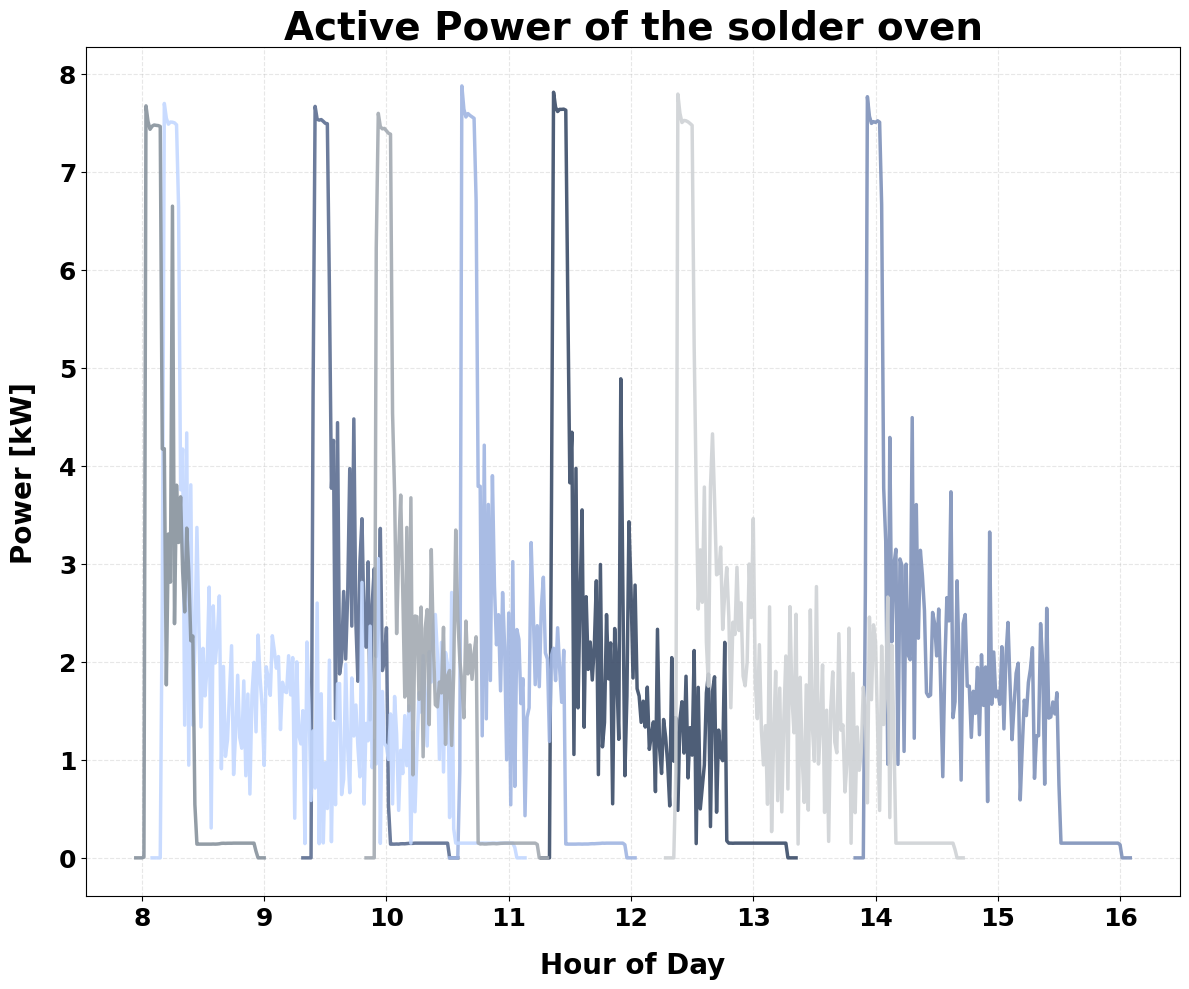

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Setup
machine_id = "AVT02"
machine_name = "solader oven"
year = 2024
file_path = f"backupDaten/AVT/{machine_id}_{year}.csv"

# Colors matching the graphical abstract
colors = ["#3b4c68", "#5c6e91", "#7e91b9", "#a0b5e2", "#c3d8ff", "#87929d", "#a3aab2", "#cfd2d5"]

if os.path.exists(file_path):
    print(f"✔️  Loading {machine_id} ({machine_name}) for {year}")
    df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
    df_full = preprocess_data_minute_resolution(df, year)

    value_column = df_full.columns[0]
    df_full["Date"] = df_full.index.date

    # Select active days
    daily_sums = df_full.groupby("Date")[value_column].sum()
    active_days = daily_sums[daily_sums > 1.0].index
    selected_days = active_days[:min(8, len(active_days))]

    plt.figure(figsize=(12, 10))

    for i, date in enumerate(selected_days):
        day_df = df_full[df_full["Date"] == date]
        power_series = day_df[value_column]

        # Find non-zero range with padding
        nonzero_indices = power_series[power_series > 0.1].index
        if len(nonzero_indices) > 0:
            first = power_series.index.get_loc(nonzero_indices[0])
            last = power_series.index.get_loc(nonzero_indices[-1])
            start = max(0, first - 5)
            end = min(len(power_series) - 1, last + 5)
            trimmed_series = power_series.iloc[start:end + 1]

            # Extract hour of day for x-axis
            time_index = trimmed_series.index
            time_hours = [t.hour + t.minute / 60 for t in time_index]

            plt.plot(time_hours, trimmed_series.values, color=colors[i % len(colors)], alpha=0.9, linewidth=2.5)

    # Formatting
    plt.title("Active Power of the solder oven", fontsize=28, fontweight="bold")
    plt.xlabel("Hour of Day", fontsize=20, fontweight="bold", labelpad=15)
    plt.ylabel("Power [kW]", fontsize=20, fontweight="bold", labelpad=15)
    plt.xticks(fontsize=18, fontweight="bold")
    plt.yticks(fontsize=18, fontweight="bold")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.savefig("solder_oven_profiles.pdf", format="pdf", bbox_inches="tight")
    plt.show()


### Debugging

In [6]:
#year = 2021
#file_path = f"backupDaten/AVT/AVT07_{year}.csv"
#df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
#df_full = preprocess_data_minute_resolution(df, year)
#df_full.plot()

### AVT

In [ ]:
import pandas as pd
import zipfile

# Read original CSV
df = pd.read_csv("backupDaten/AVT/AVT01_2018.csv")

# Downcast float64 → float32 where applicable
float_cols = df.select_dtypes(include="float").columns
df[float_cols] = df[float_cols].astype("float32")

df.to_csv("backupDaten/AVT/AVT01_2018_10.csv.xz", index=False, compression="xz") # Save with XZ




Reading: backupDaten/AVT/AVT01_2018_00.csv.gz


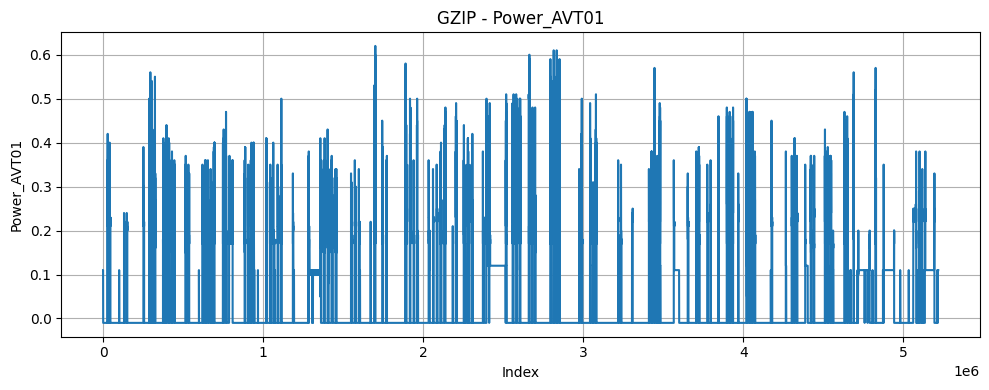

Reading: backupDaten/AVT/AVT01_2018_00.csv.bz2


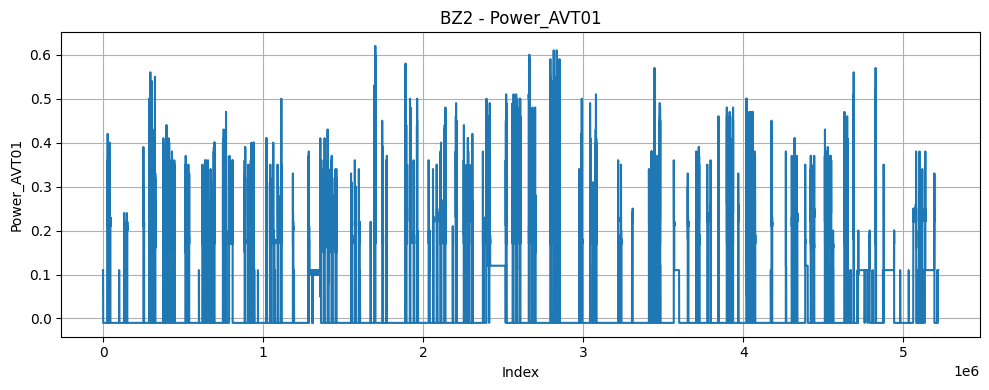

Reading: backupDaten/AVT/AVT01_2018_00.csv.xz


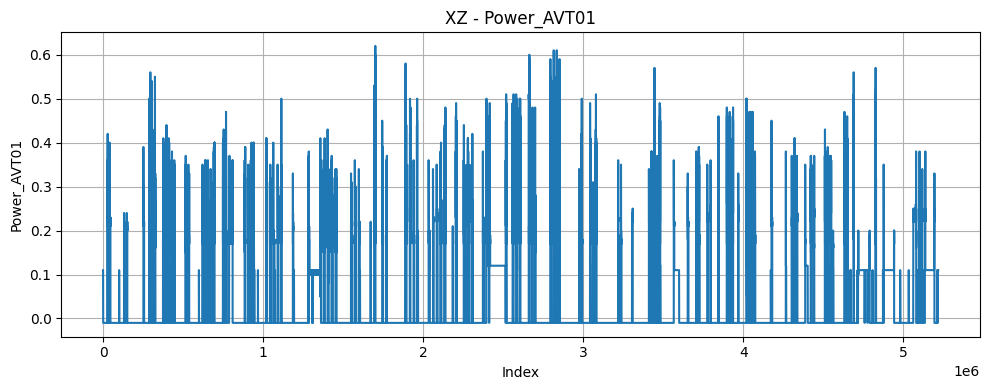

Reading: backupDaten/AVT/AVT01_2018_01.zip


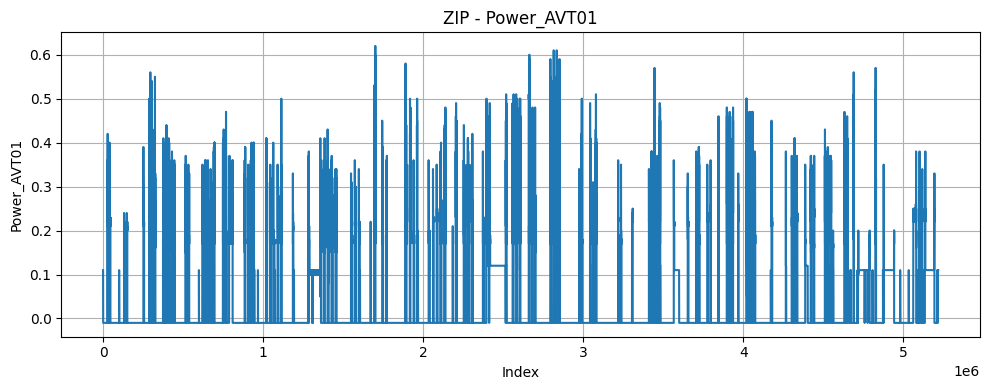

In [4]:
import zipfile

# File paths and compression types
files = {
    "gzip": ("backupDaten/AVT/AVT01_2018_00.csv.gz", "gzip"),
    "bz2": ("backupDaten/AVT/AVT01_2018_00.csv.bz2", "bz2"),
    "xz": ("backupDaten/AVT/AVT01_2018_00.csv.xz", "xz"),
    "zip": ("backupDaten/AVT/AVT01_2018_01.zip", "zip"),
}

# Plot a selected column (adjust to match your dataset)
column_to_plot = "Power_AVT01"  # Replace with any actual column name

# Loop and plot
for label, (path, compression) in files.items():
    print(f"Reading: {path}")
    
    if compression == "zip":
        with zipfile.ZipFile(path, 'r') as zipf:
            zip_name = zipf.namelist()[0]
            with zipf.open(zip_name) as f:
                df = pd.read_csv(f)
    else:
        df = pd.read_csv(path, compression=compression)

    # Plot
    plt.figure(figsize=(10, 4))
    df[column_to_plot].plot(title=f"{label.upper()} - {column_to_plot}")
    plt.xlabel("Index")
    plt.ylabel(column_to_plot)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<Axes: >

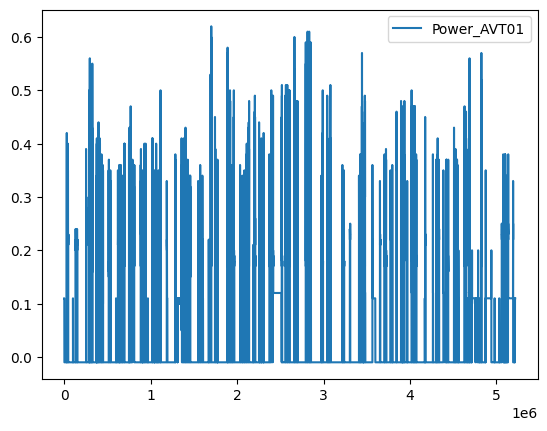

In [4]:
df = pd.read_csv("backupDaten/AVT/AVT01_2018.csv")
df.plot()

In [2]:
machine_names = {
    "AVT01": "pick and place machine",
    "AVT02": "solader oven",
    "AVT03": "washing machine",
    "AVT04": "Siebdruck",
    "AVT05": "vacuum pump1",
    "AVT06": "vacuum pump2",
    #"AVT07": "1 PEO 603",
    "AVT08": "SRO 700",
    "AVT09": "chip saw",
    "AVT10": "Leiterplattenpresse",
    "AVT11": "total load",
    "AVT12": "pump station",
    "AVT13": "pump station"
}


✔️  Loading AVT01 (pick and place machine) for 2024


C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Weekday"] = df_month.index.day_name()
C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Date"] = df_month.index.date


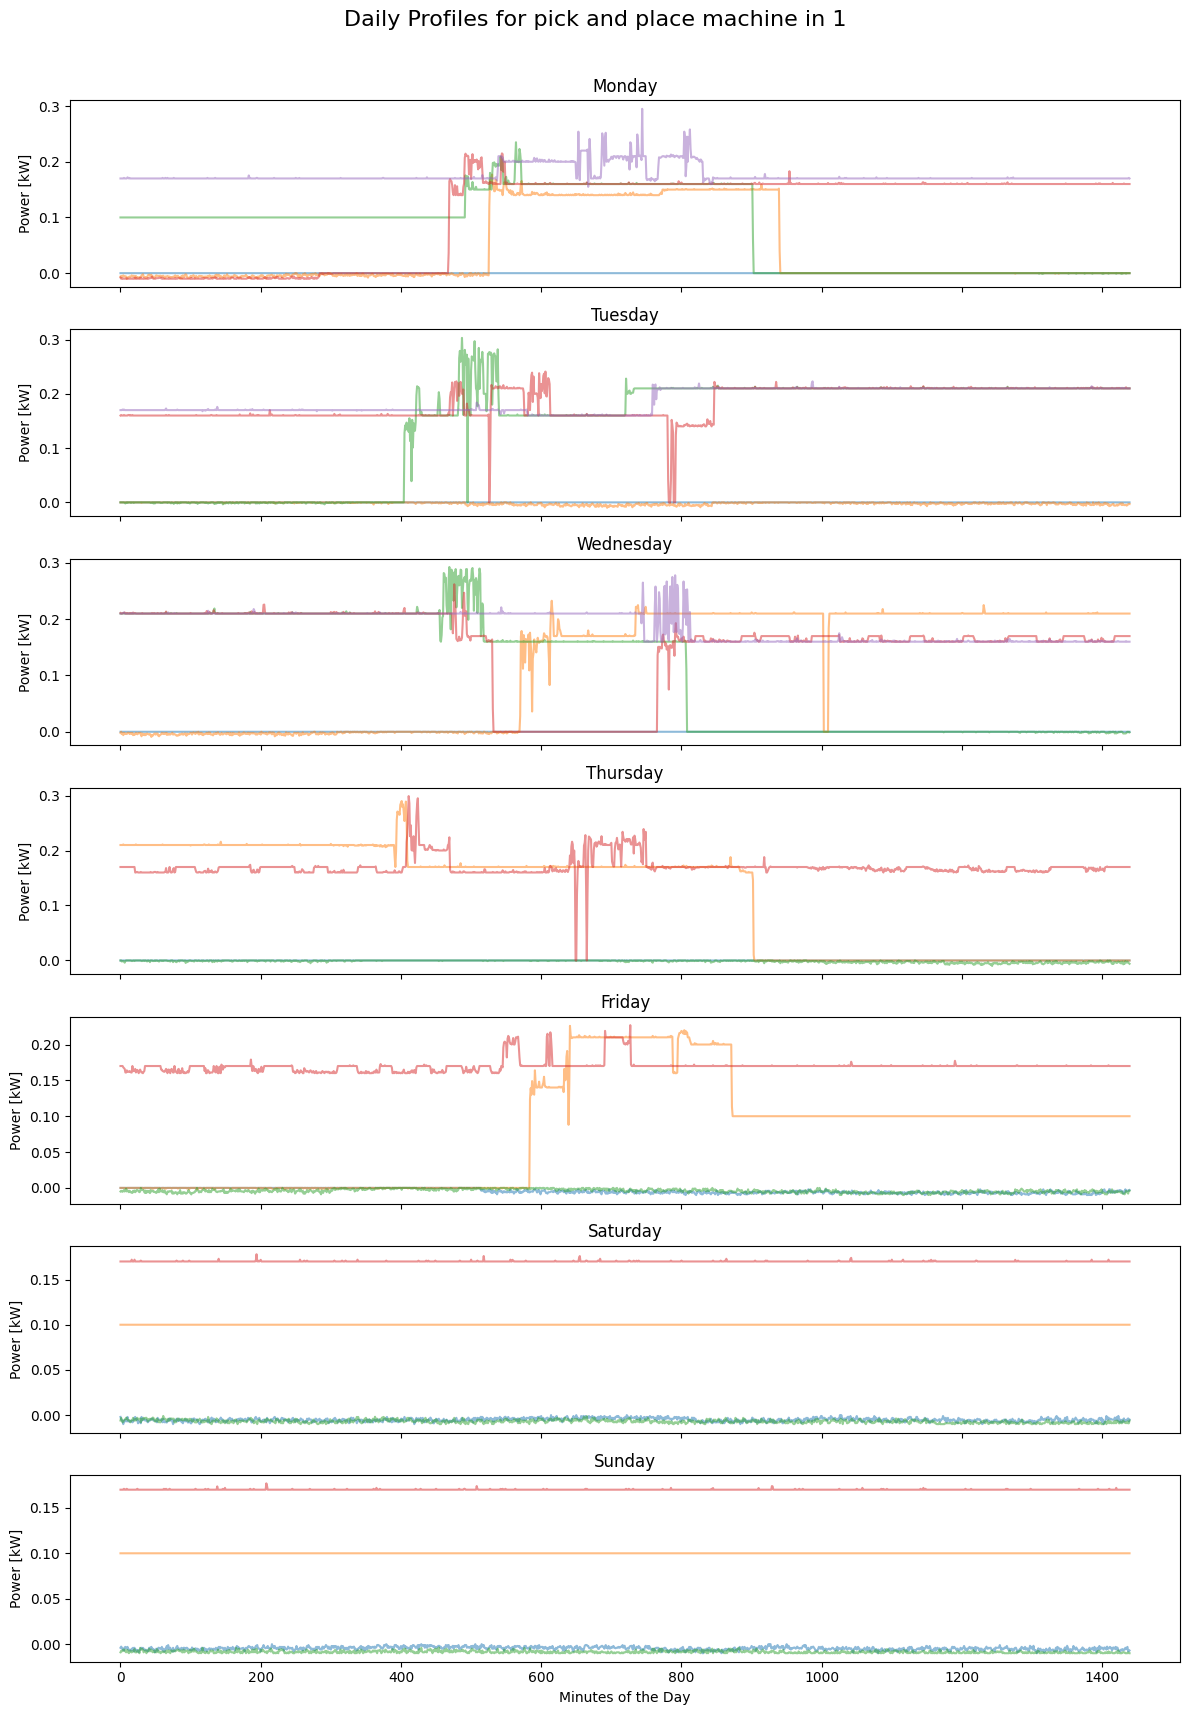


✔️  Loading AVT01 (pick and place machine) for 2024


C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Weekday"] = df_month.index.day_name()
C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Date"] = df_month.index.date


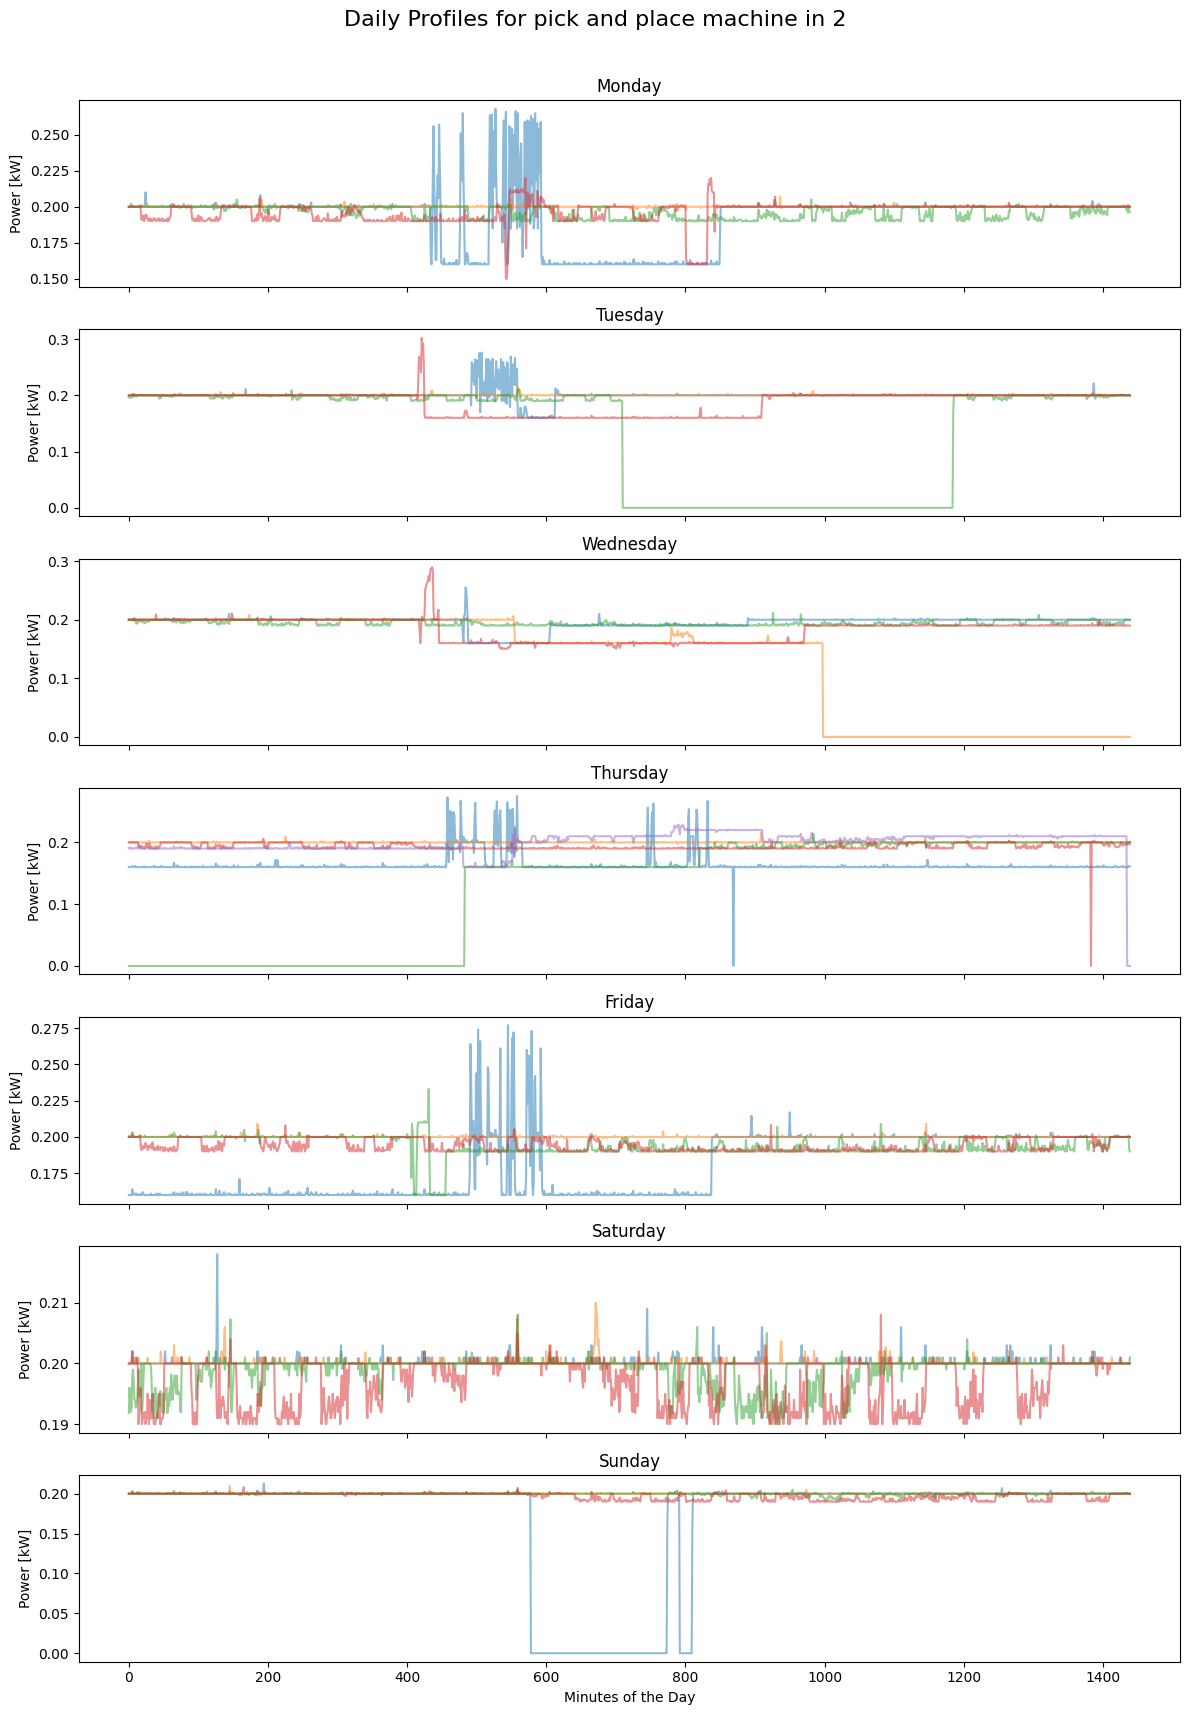


✔️  Loading AVT01 (pick and place machine) for 2024


C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Weekday"] = df_month.index.day_name()
C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Date"] = df_month.index.date


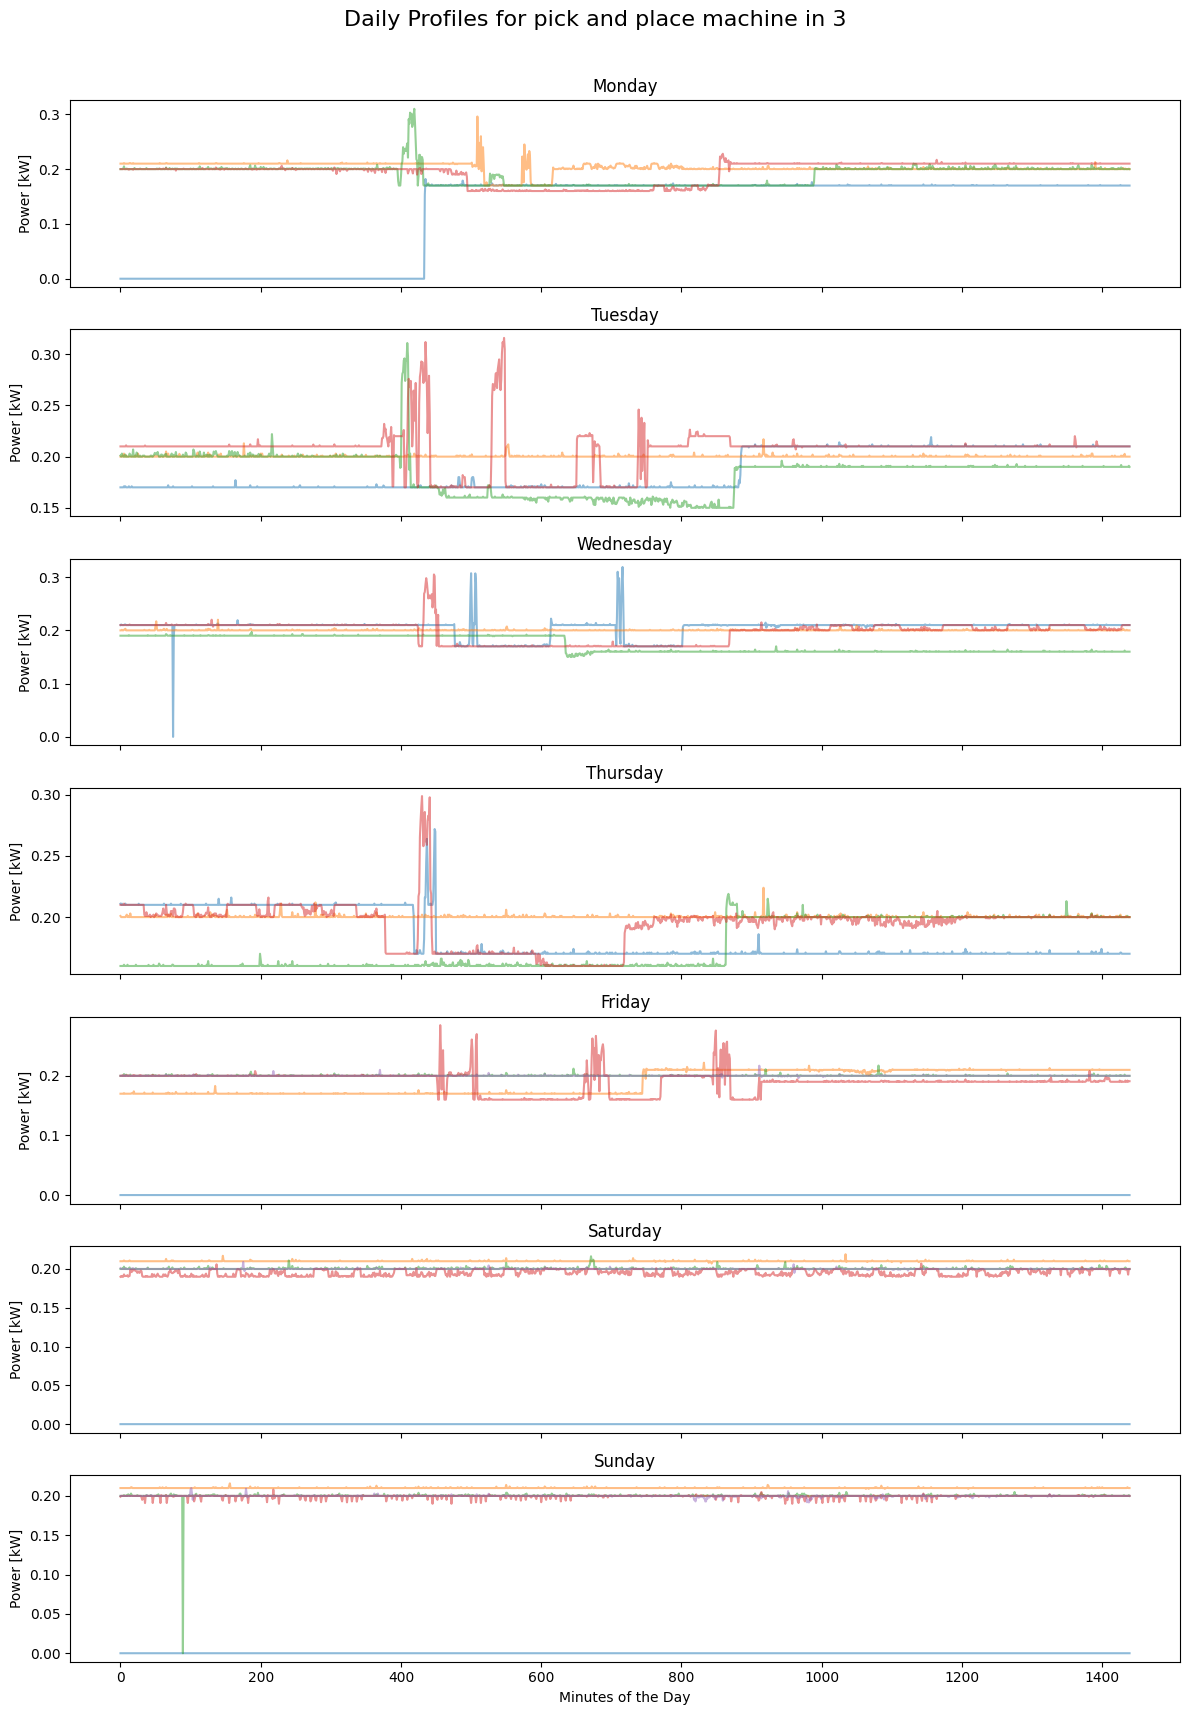


✔️  Loading AVT01 (pick and place machine) for 2024


C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Weekday"] = df_month.index.day_name()
C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Date"] = df_month.index.date


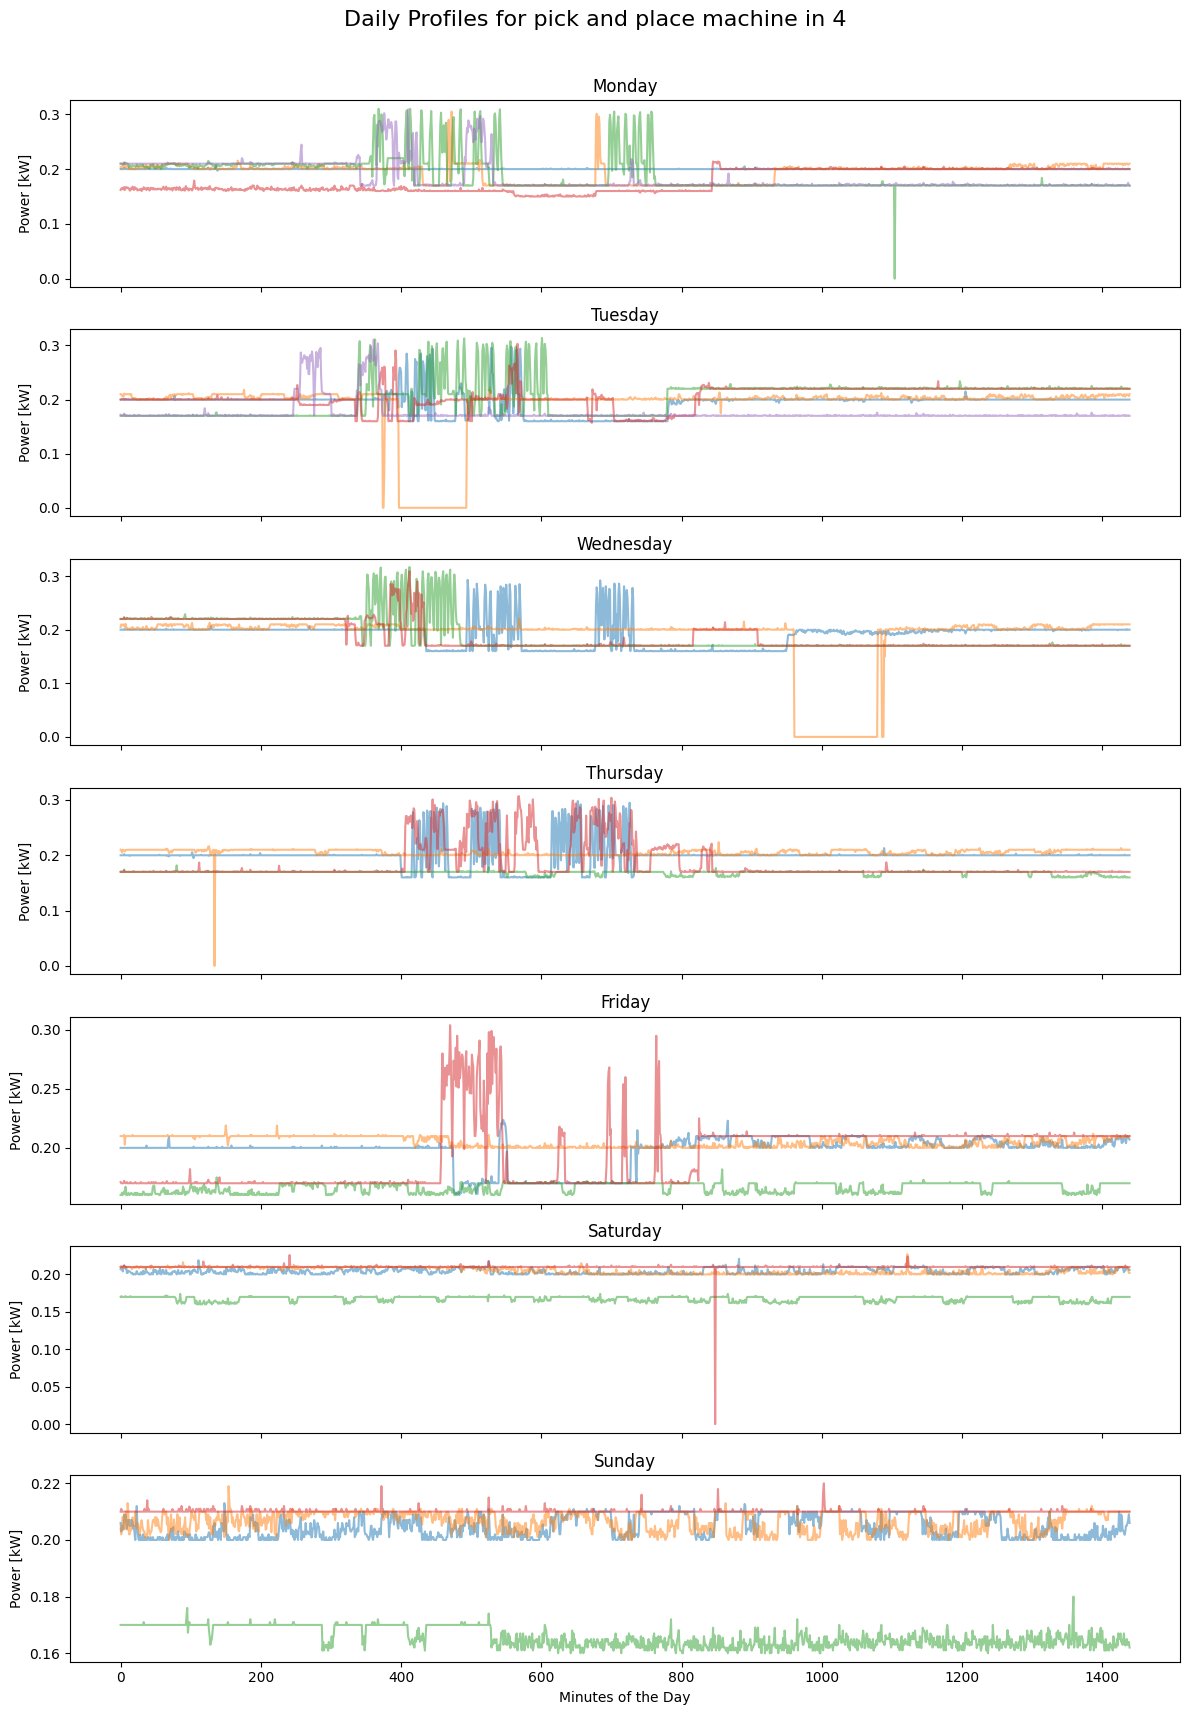


✔️  Loading AVT01 (pick and place machine) for 2024


C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Weekday"] = df_month.index.day_name()
C:\Users\rs1044\AppData\Local\Temp\ipykernel_19100\4017323501.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month["Date"] = df_month.index.date


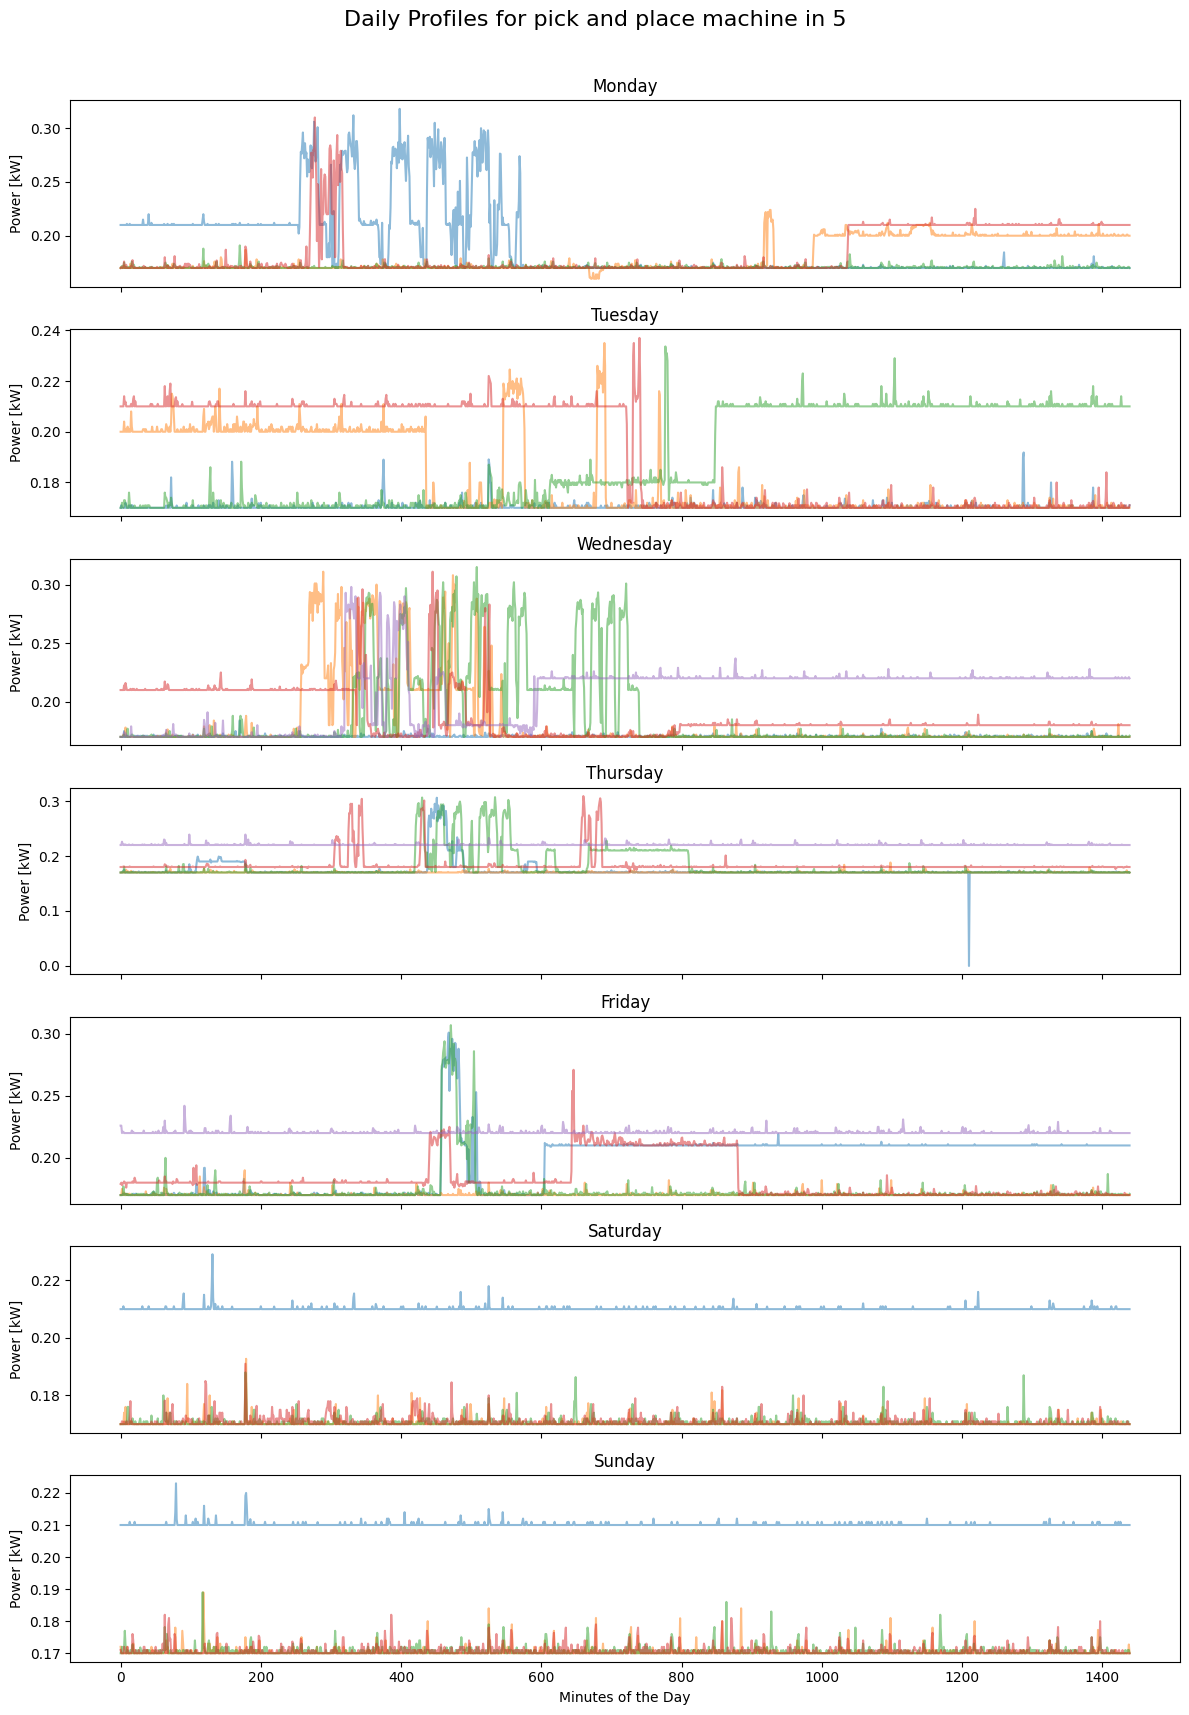


✔️  Loading AVT01 (pick and place machine) for 2024


KeyboardInterrupt: 

In [11]:
years = [2024]
months = [1,2,3,4,5,6,7,8,9,10,11,12]  # YYYY-MM

for machine_id, machine_name in machine_names.items():
    for year in years:
        for month in months:
            file_path = f"backupDaten/AVT/{machine_id}_{year}.csv"
            if os.path.exists(file_path):
                print(f"\n✔️  Loading {machine_id} ({machine_name}) for {year}")
                df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
                df_full = preprocess_data_minute_resolution(df, year)
                
                # Filter to the specified month
                df_month = df_full[df_full.index.month == month]
                # Get the name of the single column (e.g., "Power_AVT01")
                value_column = df_month.columns[0]

                # Create a new column for weekday name
                df_month["Weekday"] = df_month.index.day_name()
                df_month["Date"] = df_month.index.date
                unique_days = df_month["Date"].unique()

                # Group by date and weekday
                grouped = df_month.groupby(["Date", "Weekday"])

                # Create 7 subplots for each weekday
                fig, axes = plt.subplots(7, 1, figsize=(12, 18), sharex=True)
                weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

                for i, day in enumerate(weekdays):
                    ax = axes[i]
                    day_profiles = [group[value_column].values for (date, wd), group in grouped if wd == day]

                    for profile in day_profiles:
                        ax.plot(range(len(profile)), profile, alpha=0.5)

                    ax.set_title(day)
                    ax.set_ylabel("Power [kW]")

                plt.suptitle(f"Daily Profiles for {machine_name} in {month}", fontsize=16)
                plt.xlabel("Minutes of the Day")
                plt.tight_layout(rect=[0, 0.03, 1, 0.97])
                plt.show()


✔️  Loading AVT01 (pick and place machine) for 2018


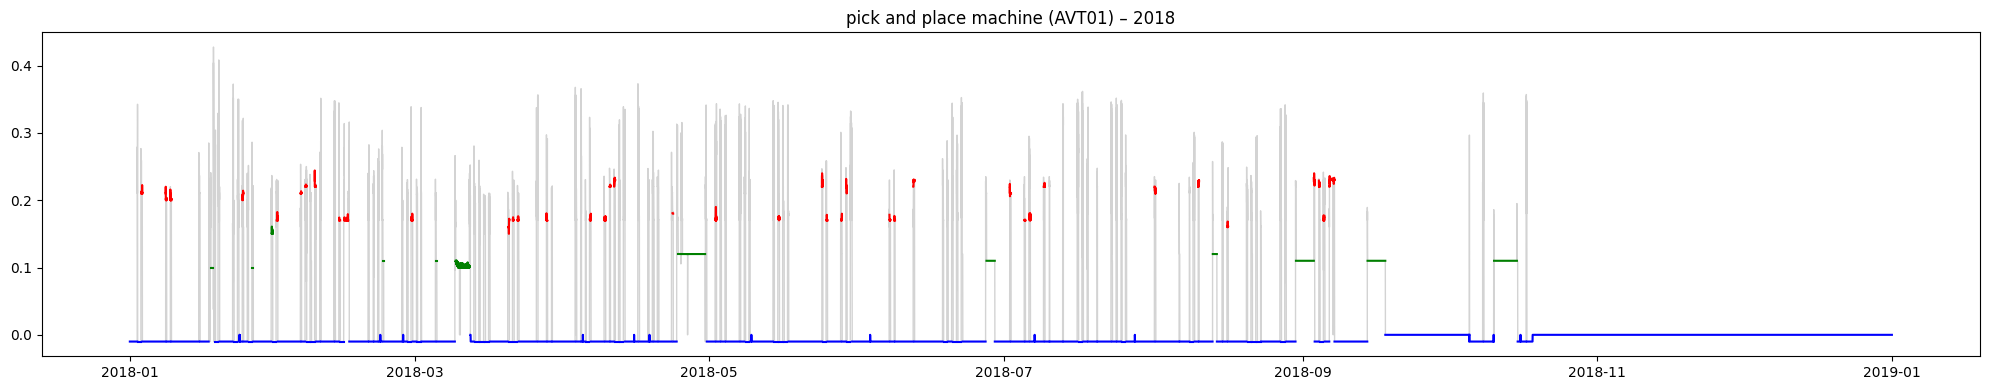


✔️  Loading AVT01 (pick and place machine) for 2019


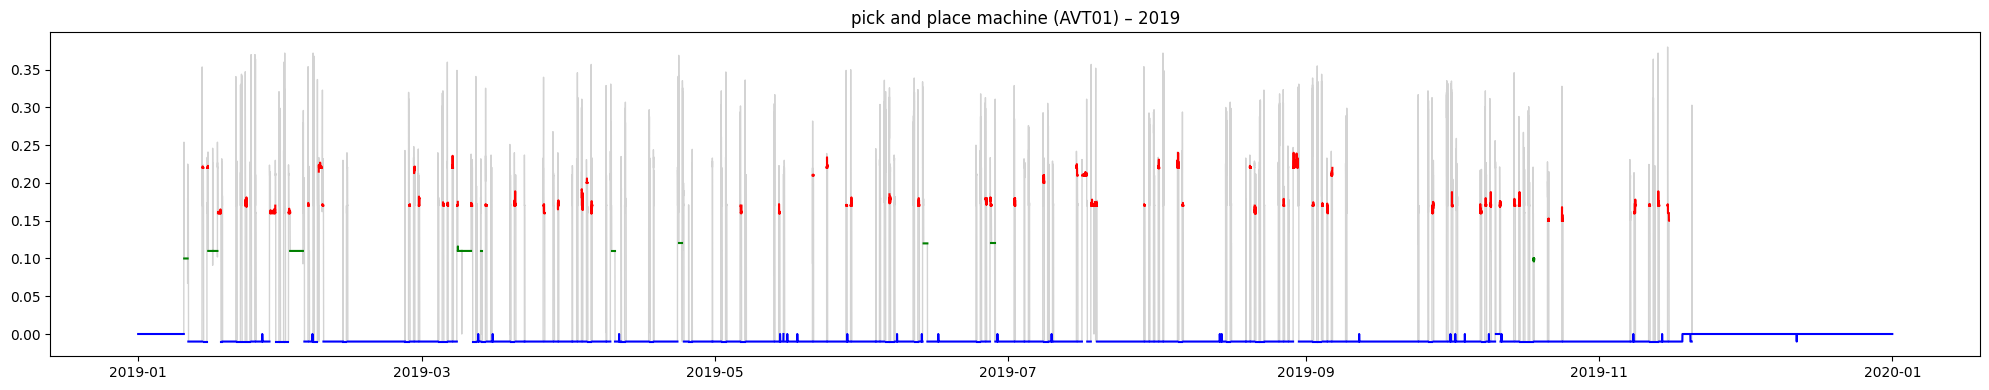


✔️  Loading AVT01 (pick and place machine) for 2020


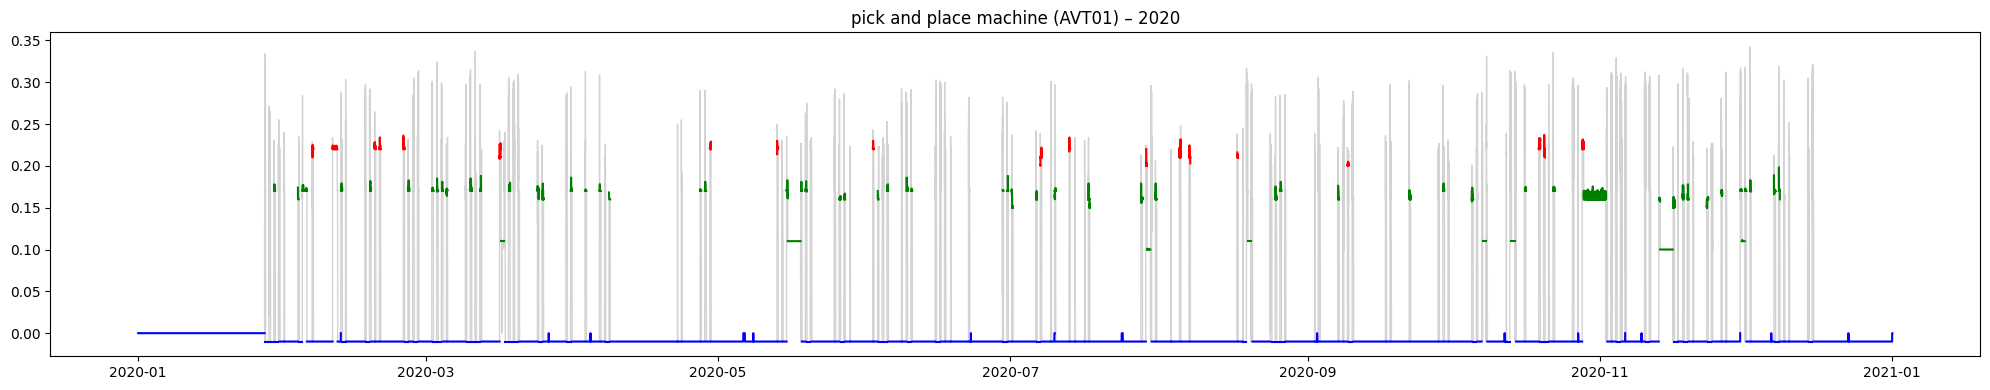


✔️  Loading AVT01 (pick and place machine) for 2021


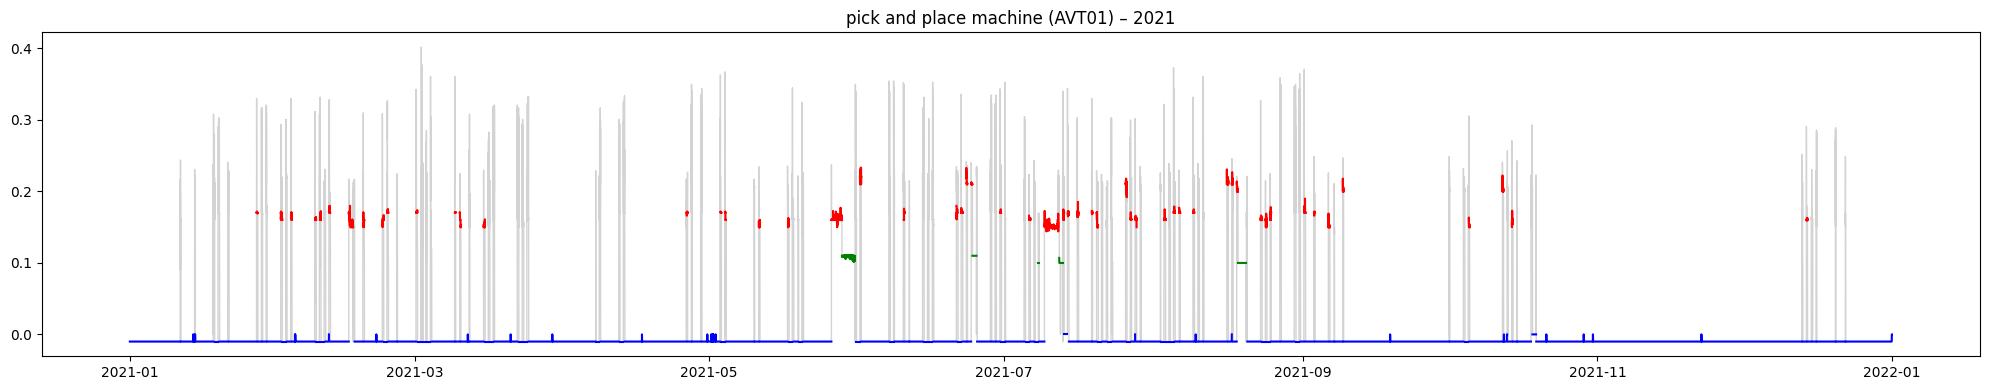


✔️  Loading AVT01 (pick and place machine) for 2022


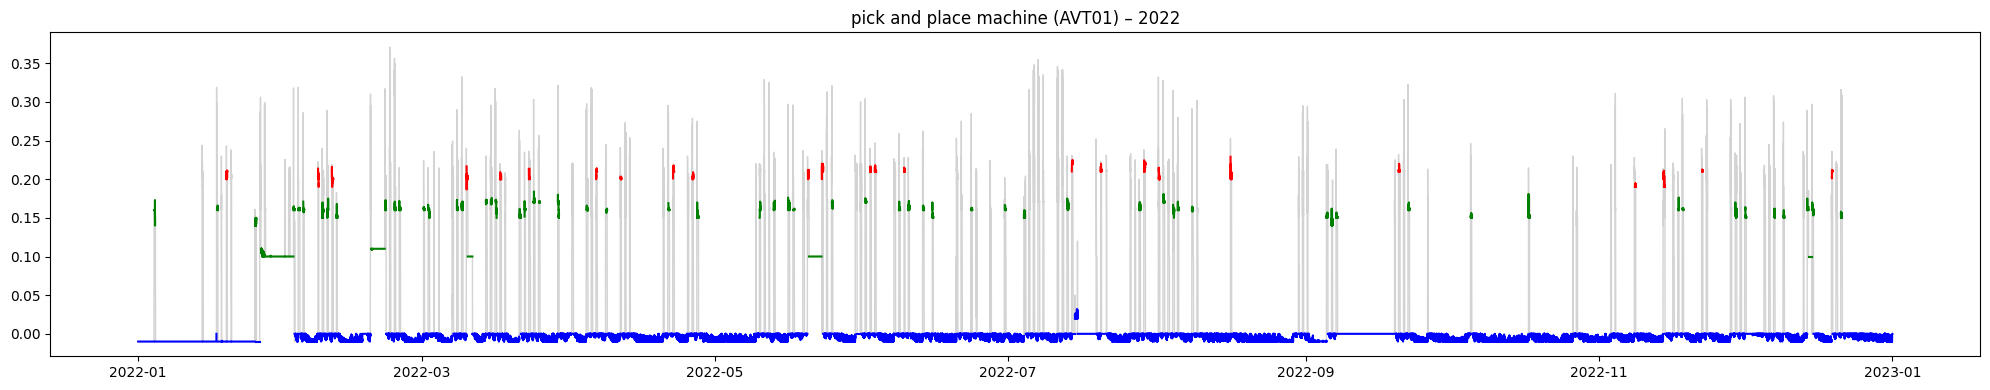


✔️  Loading AVT01 (pick and place machine) for 2023


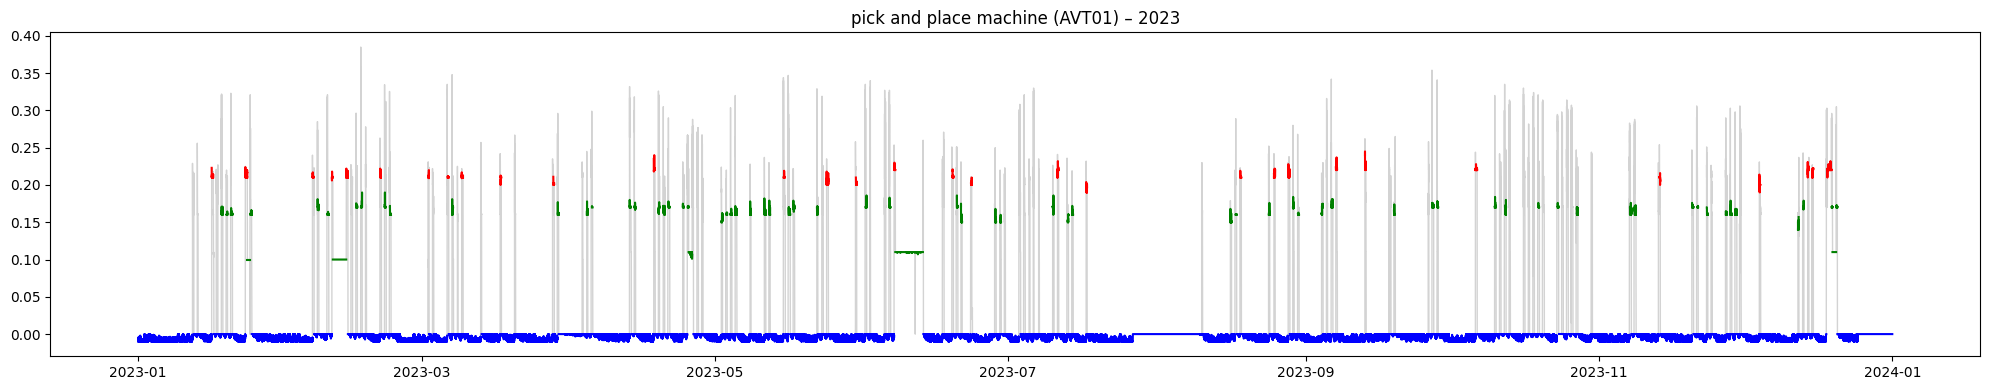


✔️  Loading AVT01 (pick and place machine) for 2024


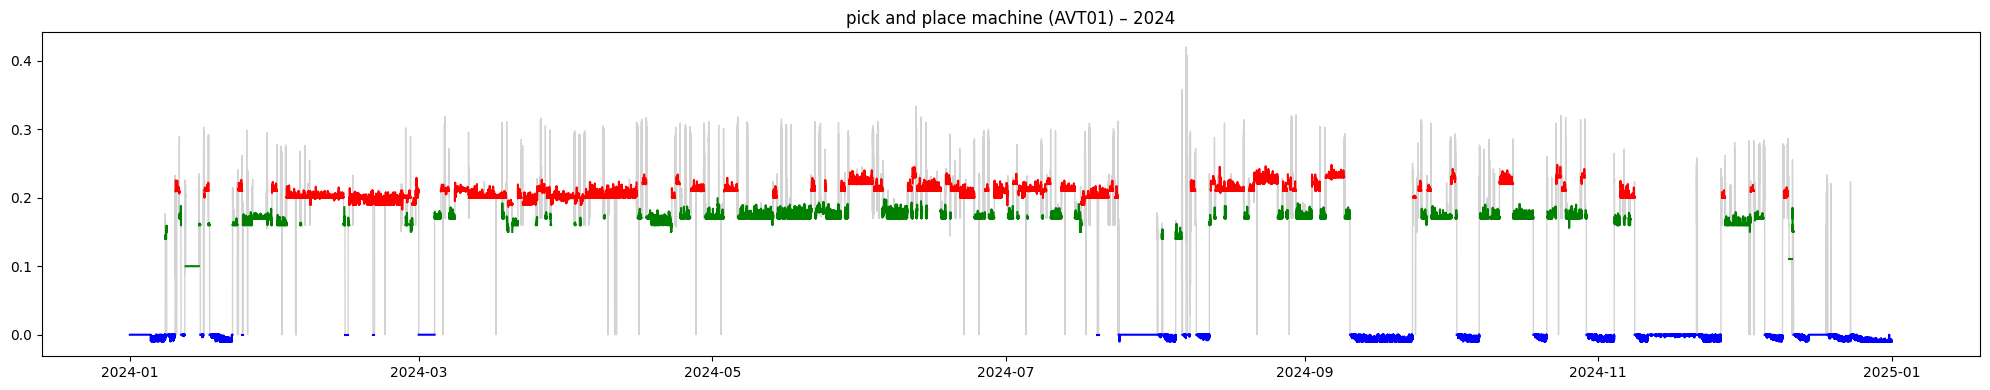


✔️  Loading AVT02 (solader oven) for 2018


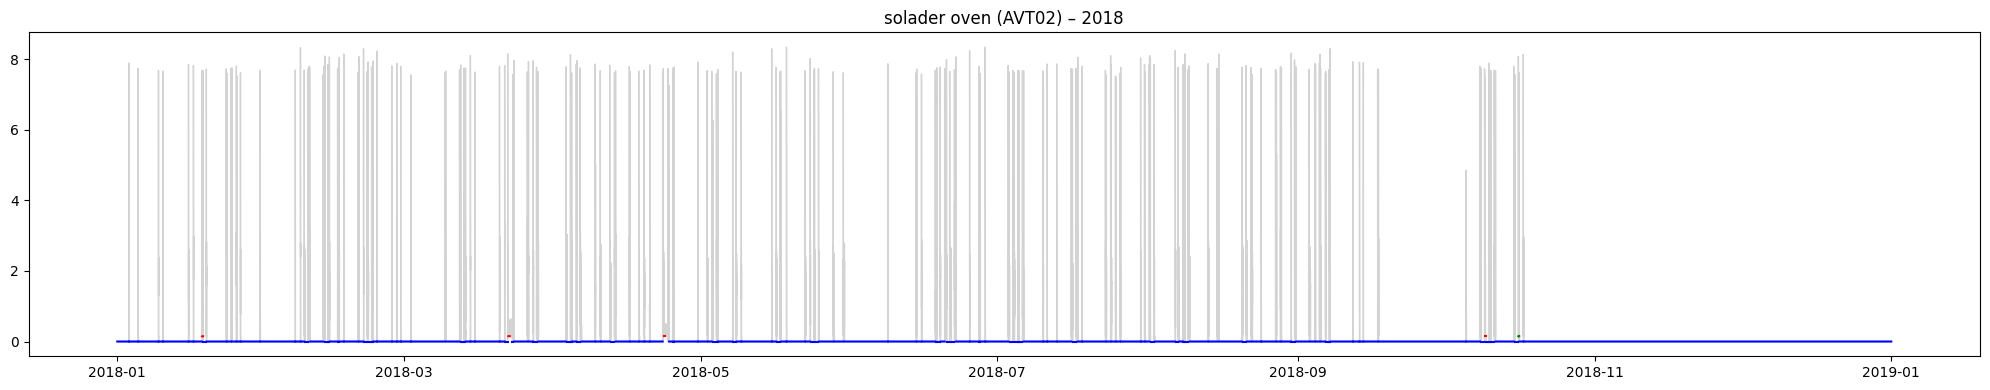


✔️  Loading AVT02 (solader oven) for 2019


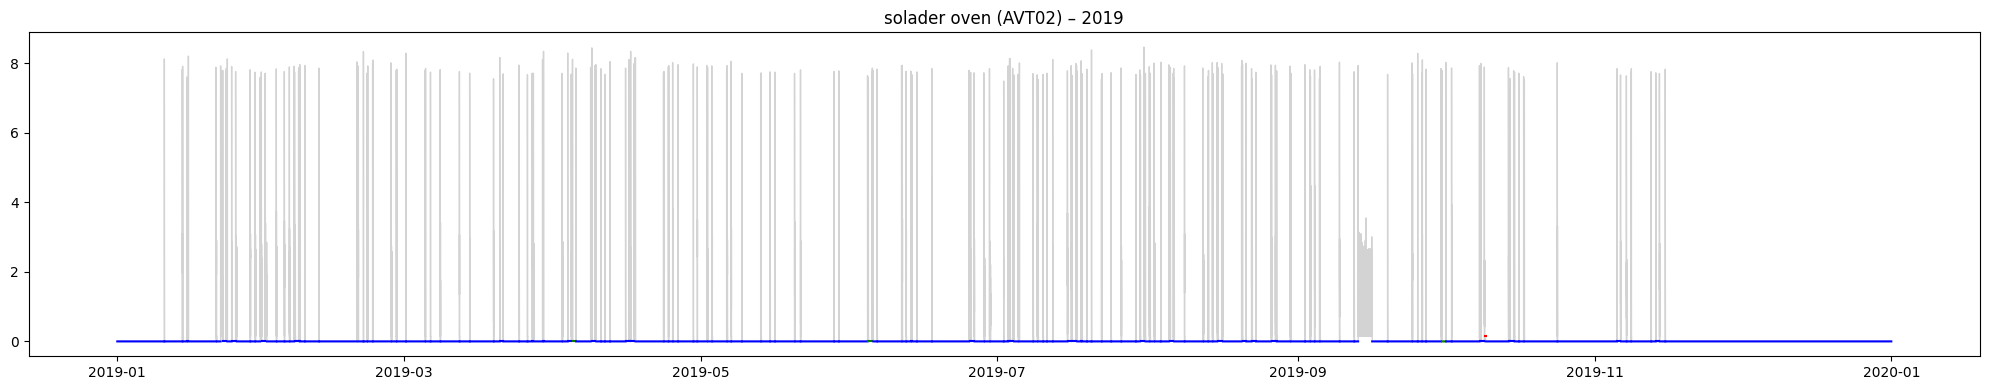


✔️  Loading AVT02 (solader oven) for 2020


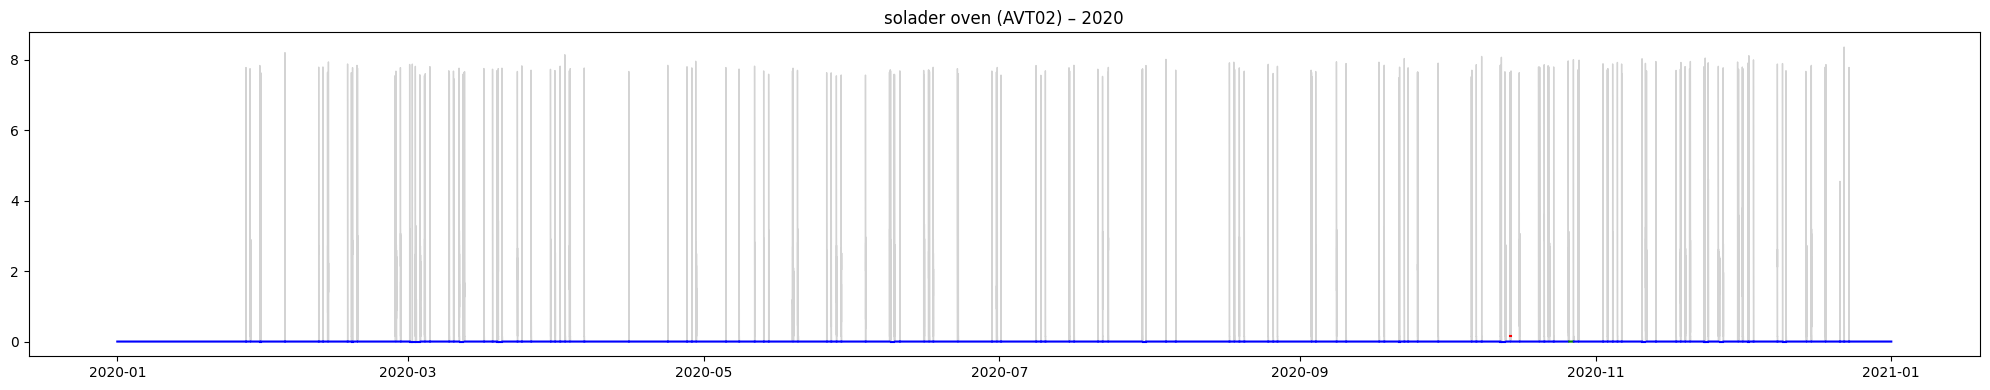


✔️  Loading AVT02 (solader oven) for 2021


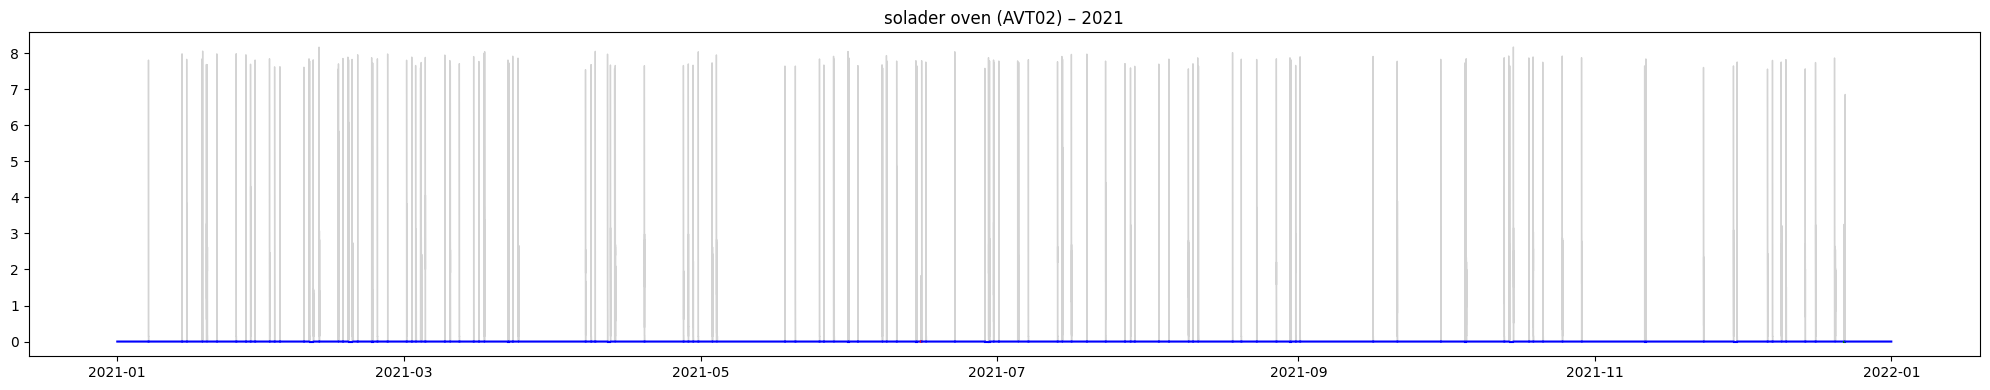


✔️  Loading AVT02 (solader oven) for 2022


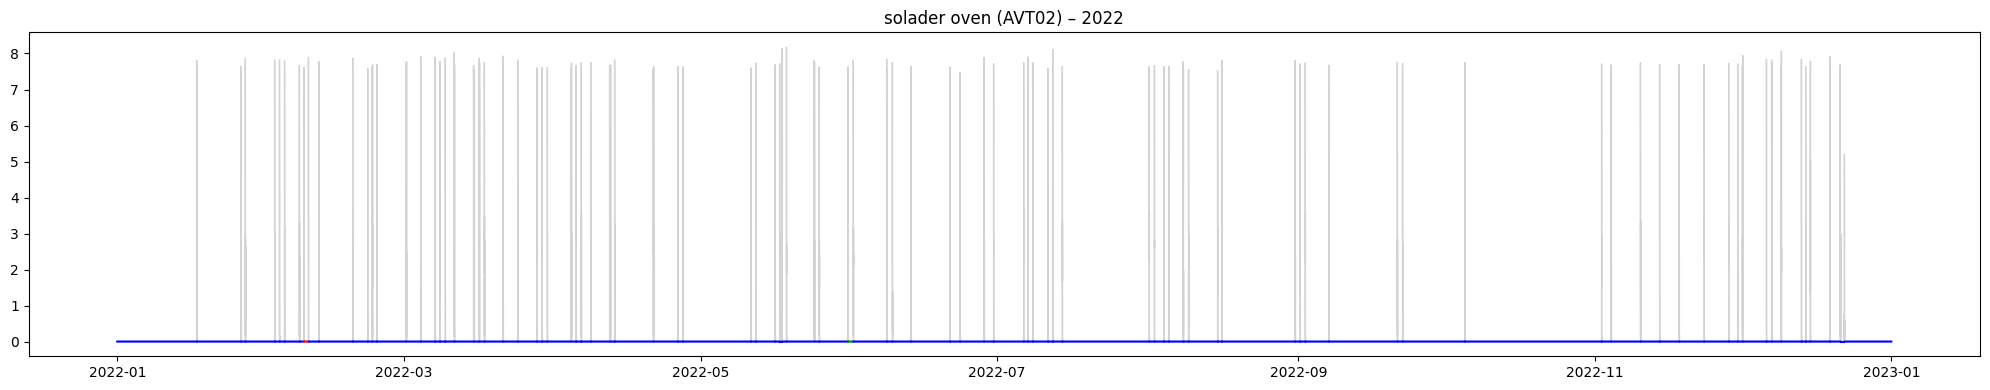


✔️  Loading AVT02 (solader oven) for 2023


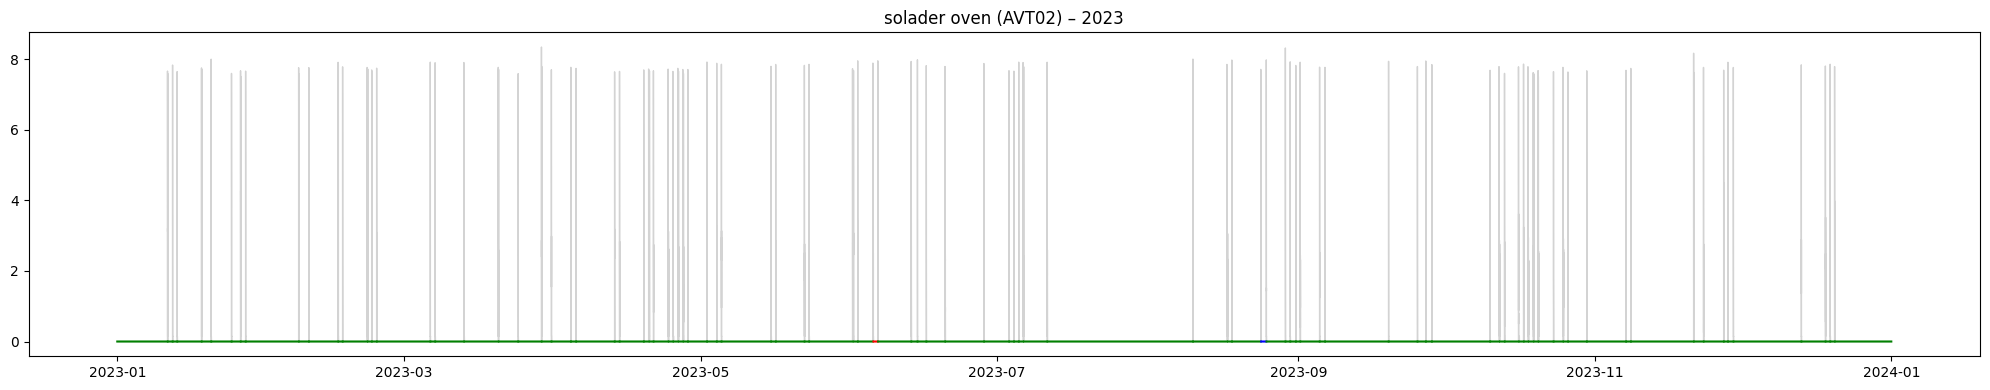


✔️  Loading AVT02 (solader oven) for 2024


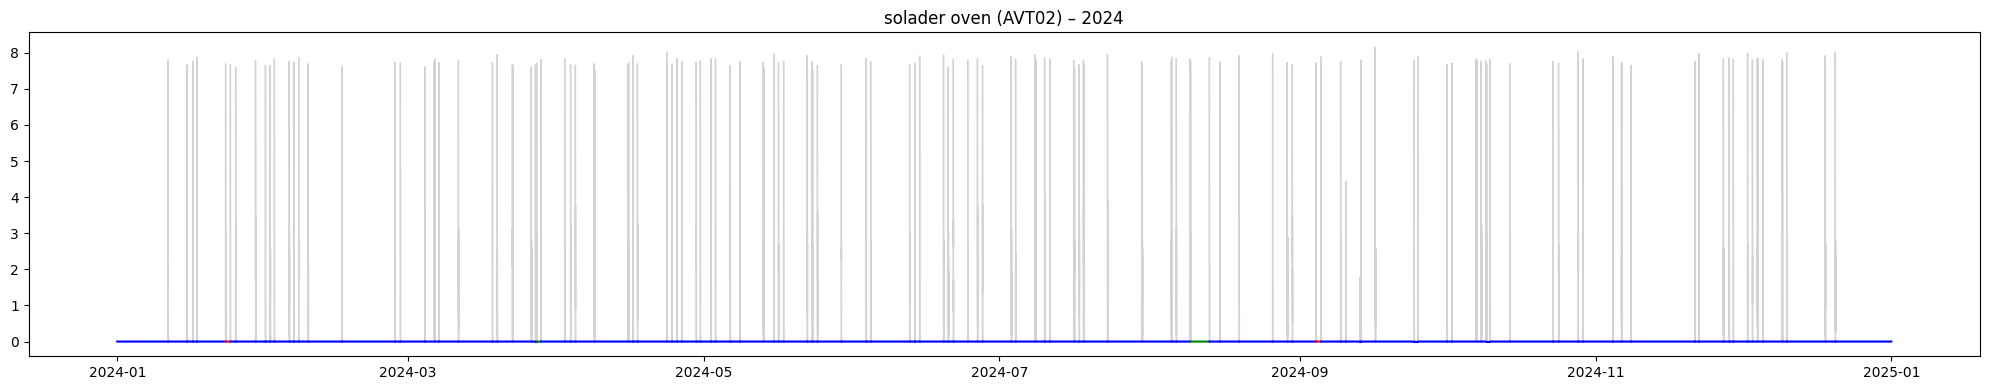


✔️  Loading AVT03 (washing machine) for 2018


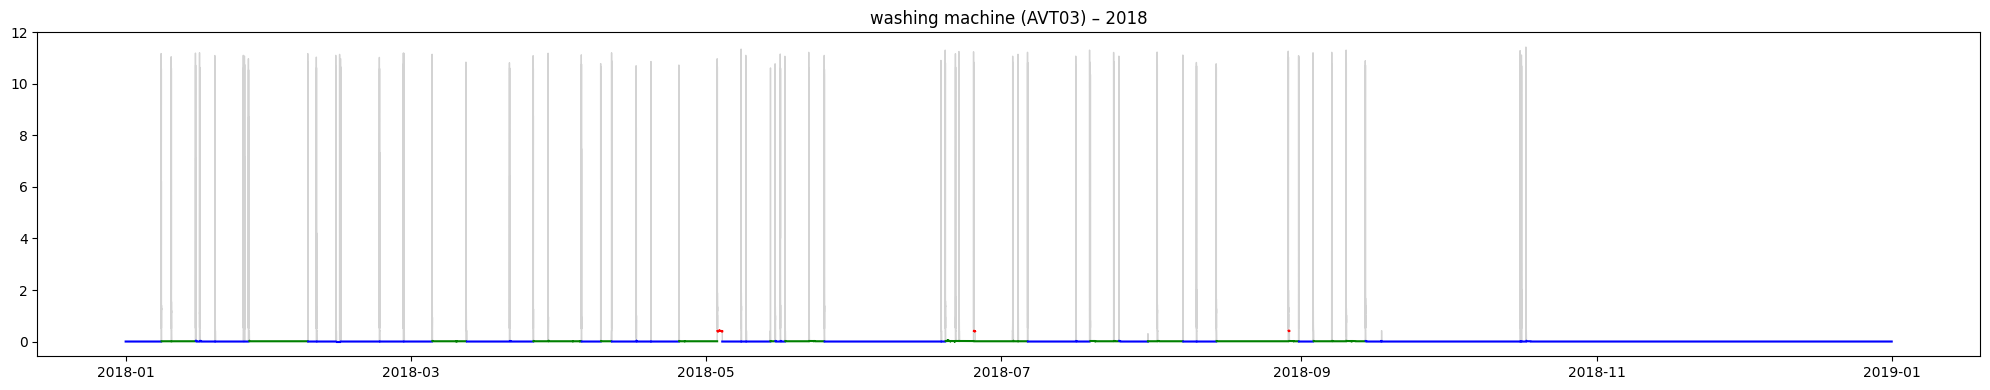


✔️  Loading AVT03 (washing machine) for 2019


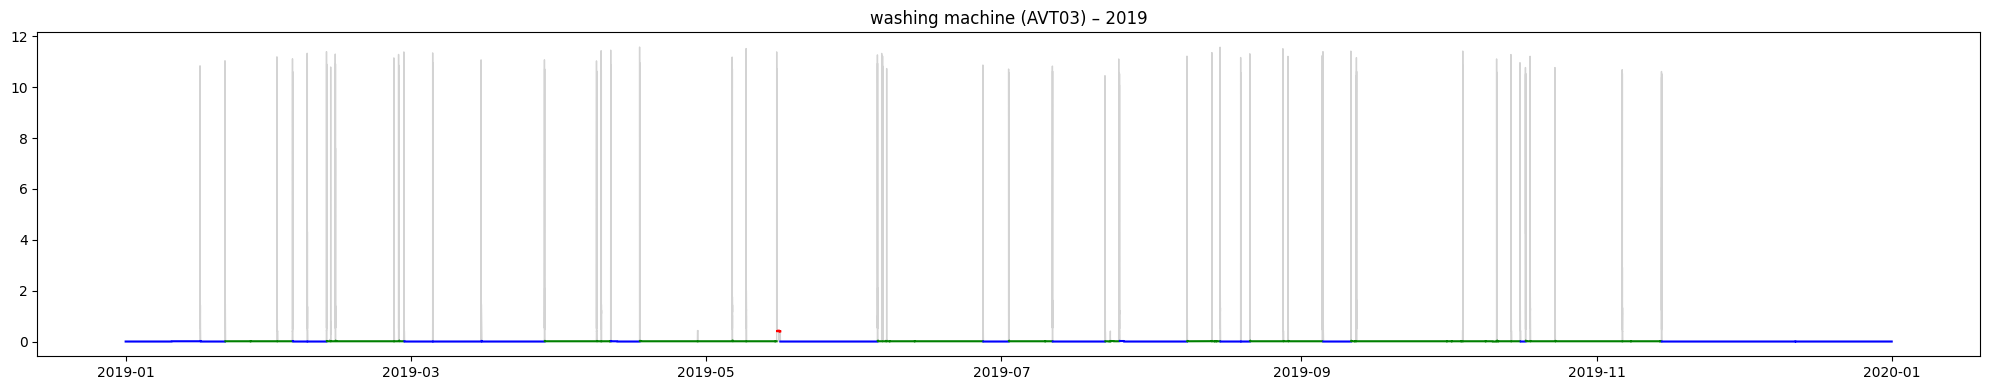


✔️  Loading AVT03 (washing machine) for 2020


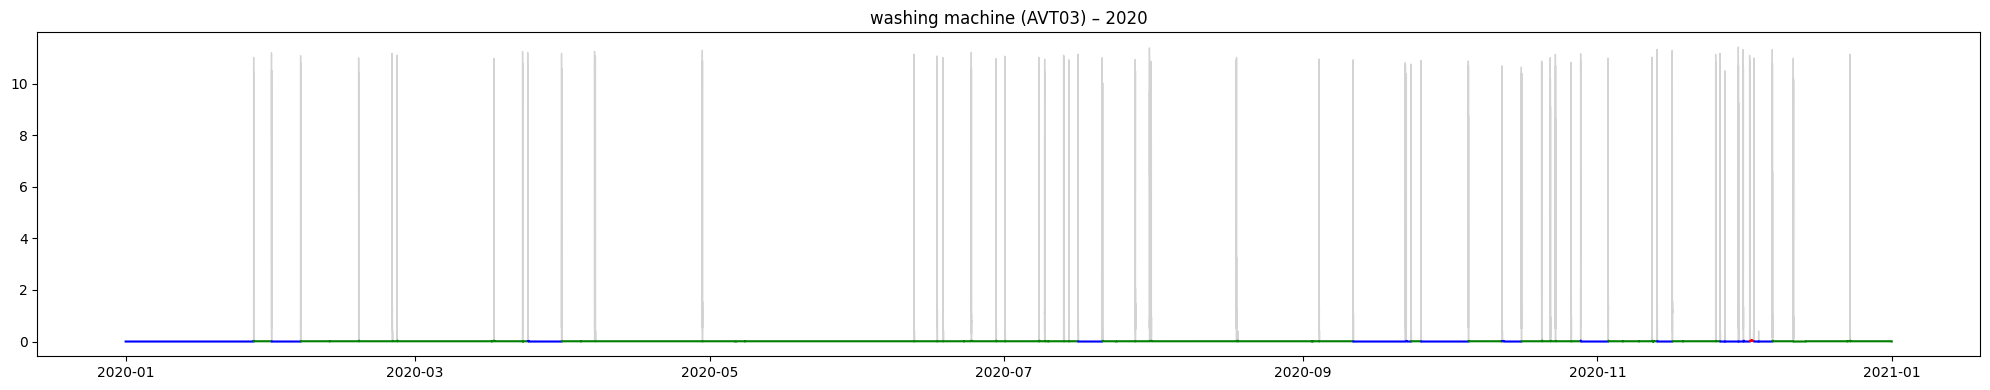


✔️  Loading AVT03 (washing machine) for 2021


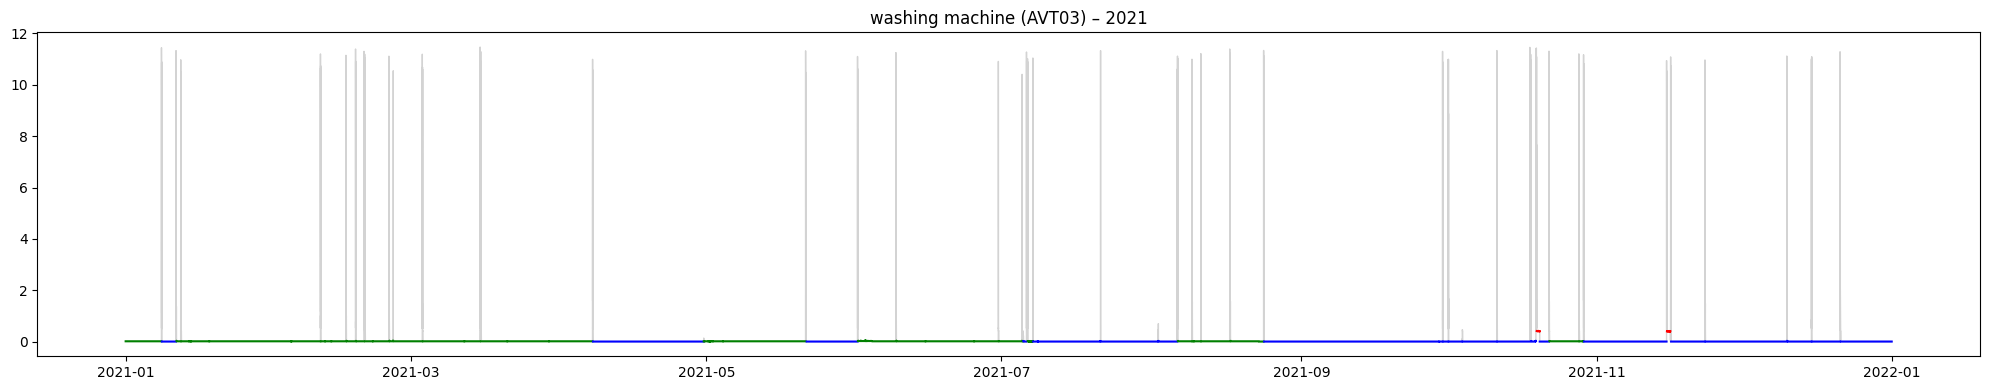


✔️  Loading AVT03 (washing machine) for 2022


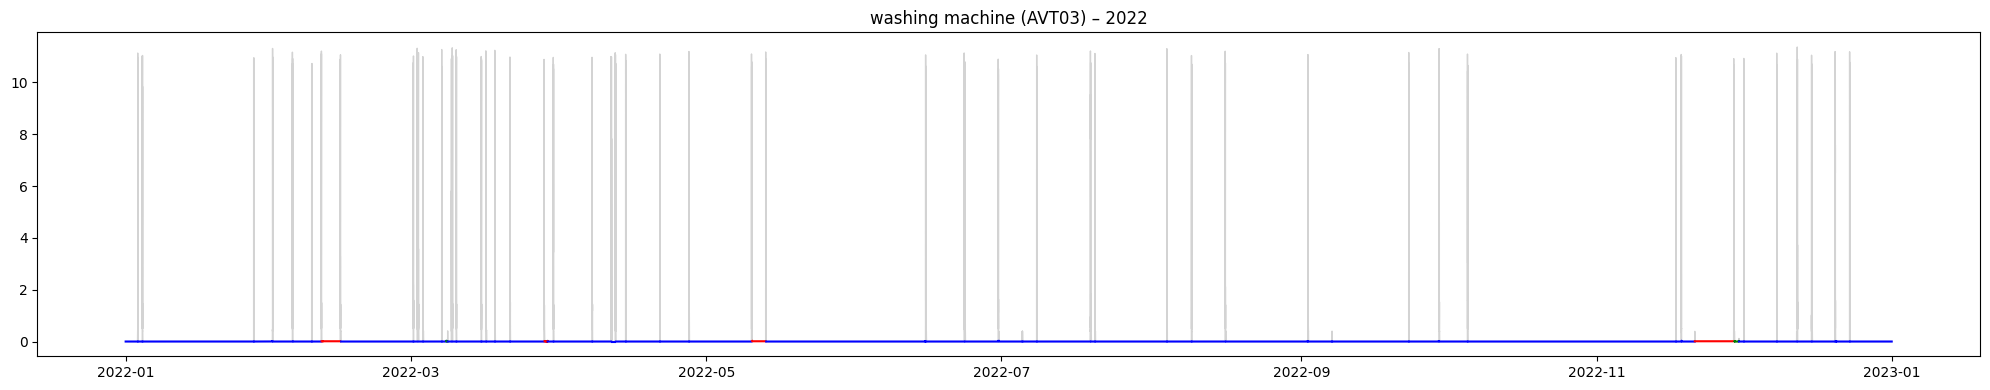


✔️  Loading AVT03 (washing machine) for 2023


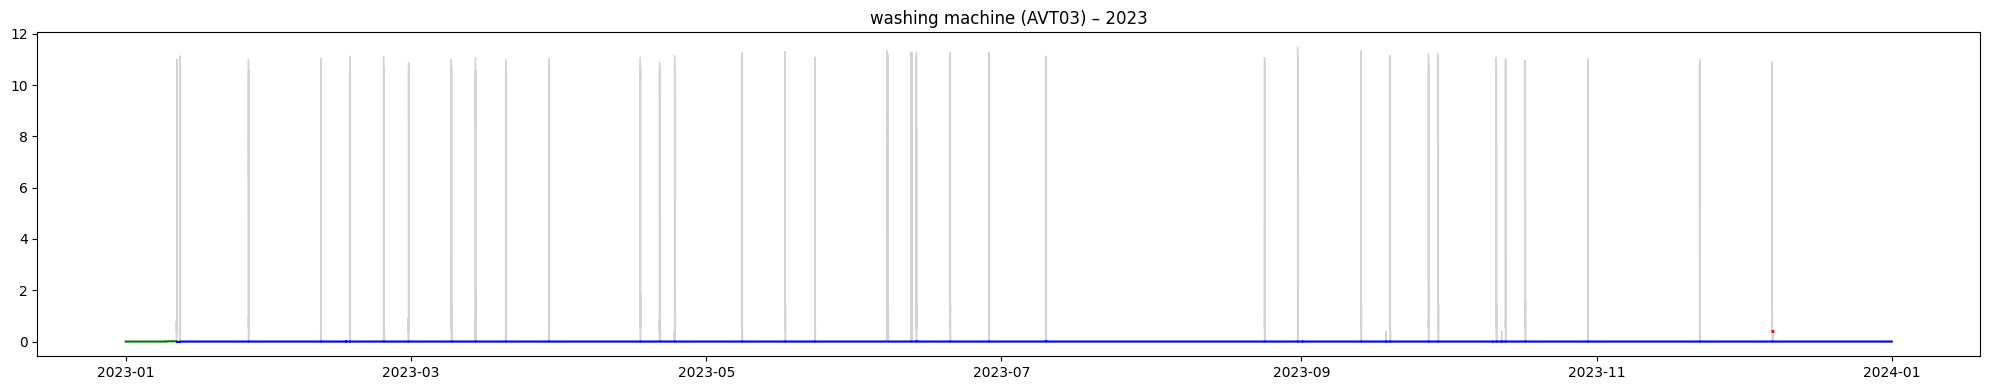


✔️  Loading AVT03 (washing machine) for 2024


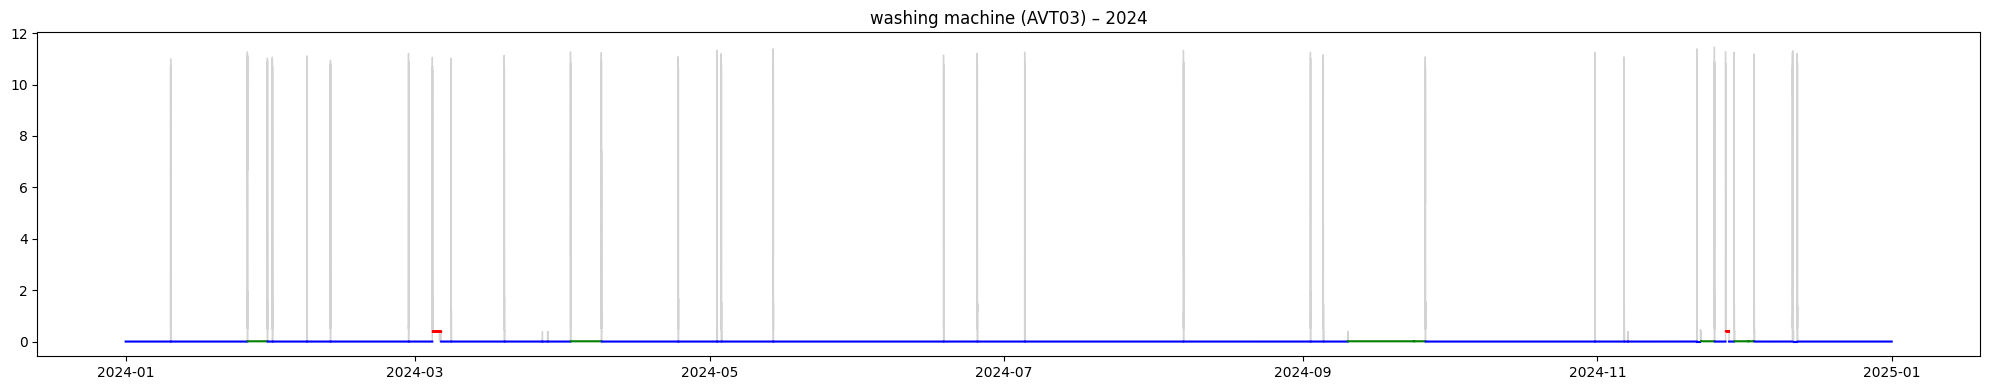


✔️  Loading AVT04 (Siebdruck) for 2018


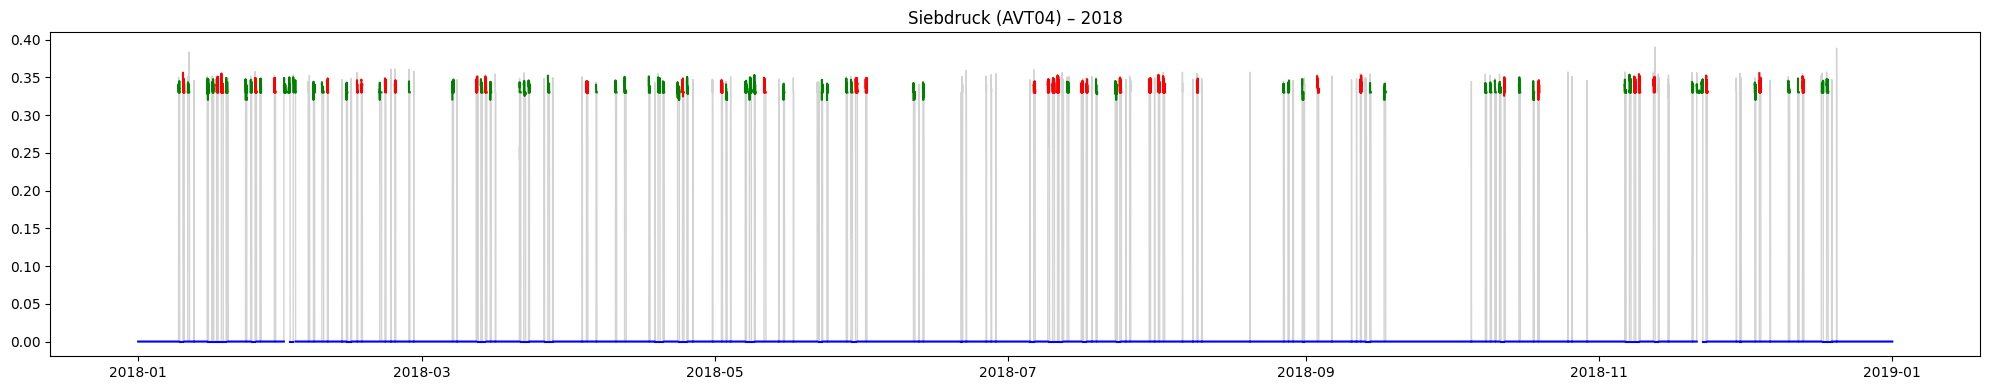


✔️  Loading AVT04 (Siebdruck) for 2019


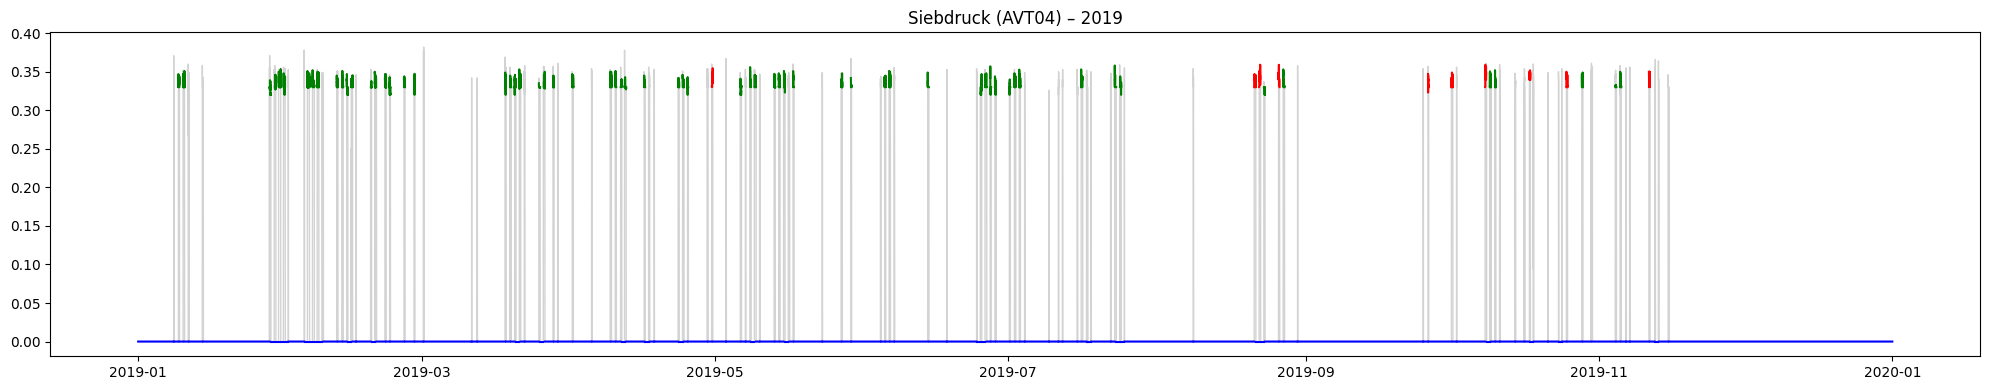


✔️  Loading AVT04 (Siebdruck) for 2020


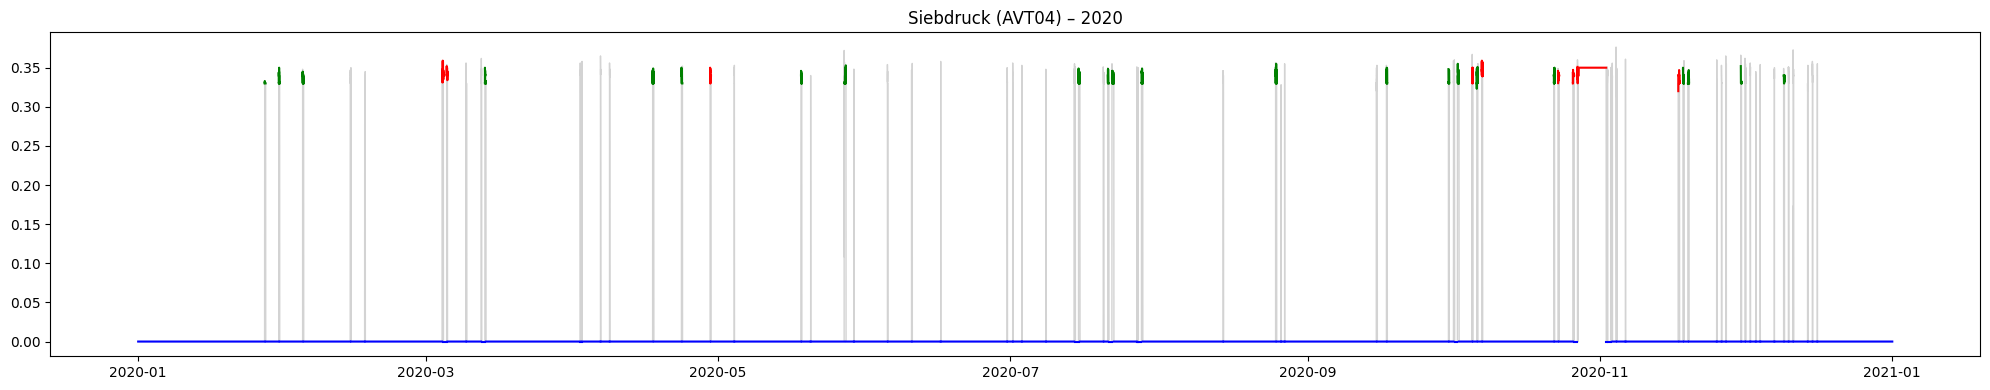


✔️  Loading AVT04 (Siebdruck) for 2021


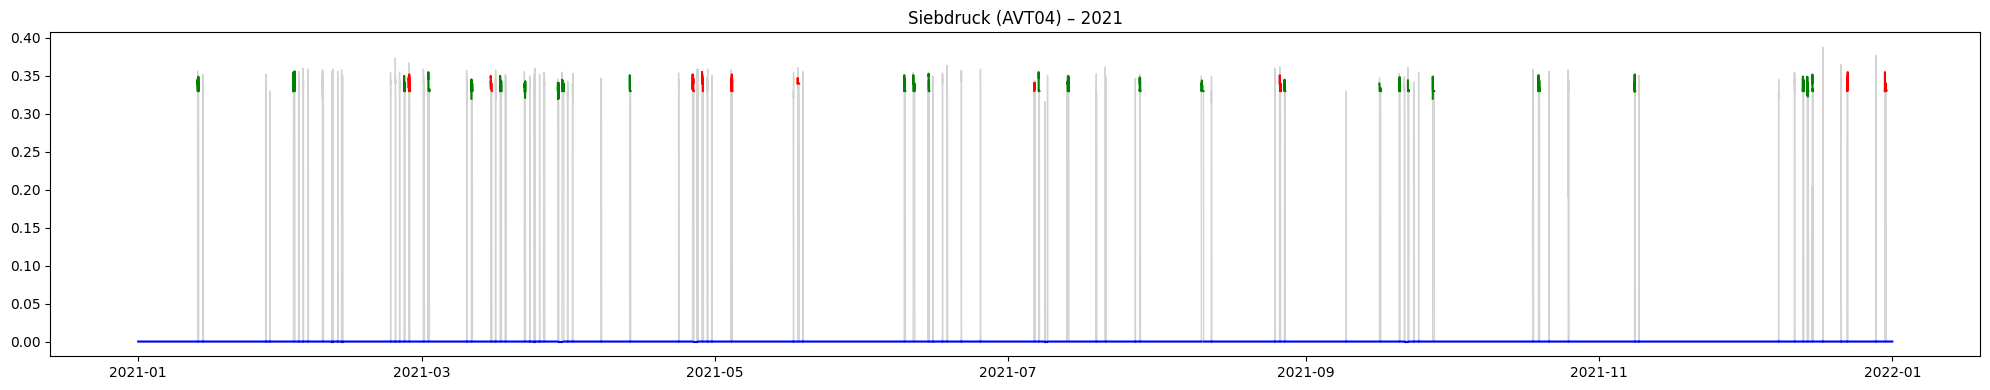


✔️  Loading AVT04 (Siebdruck) for 2022


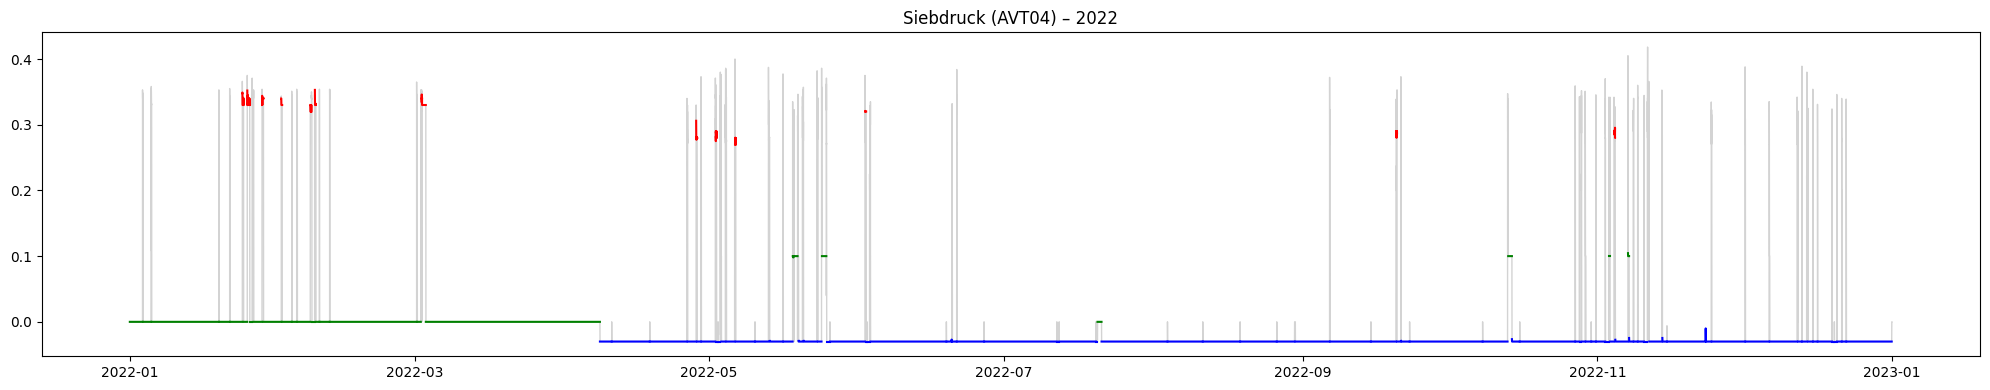


✔️  Loading AVT04 (Siebdruck) for 2023


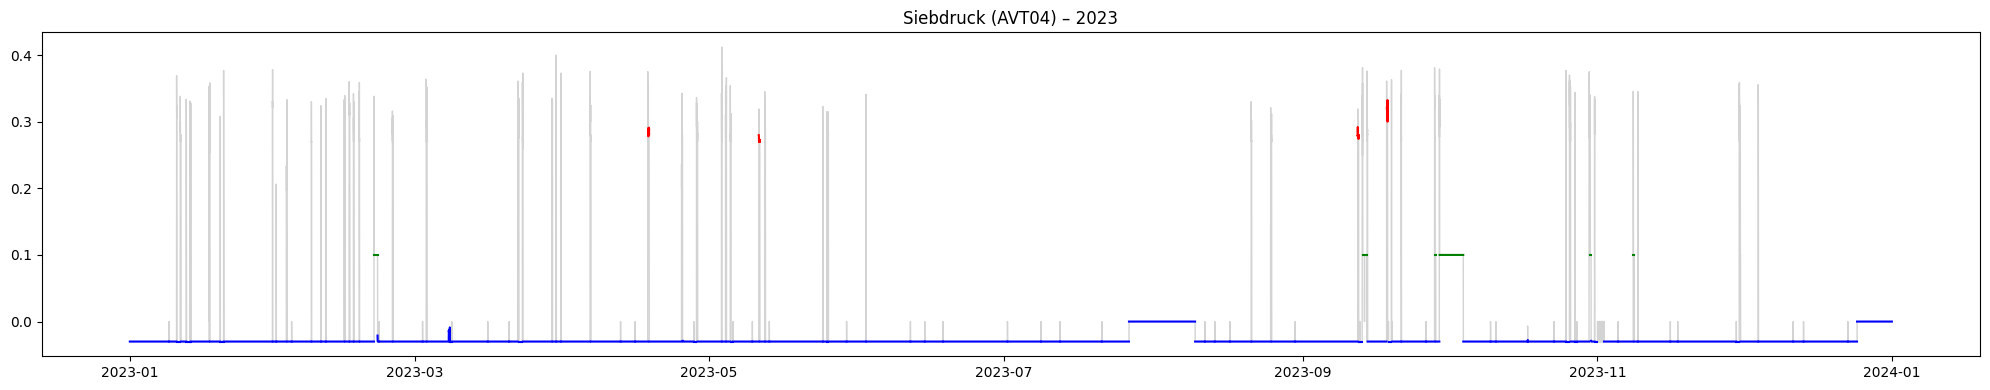


✔️  Loading AVT04 (Siebdruck) for 2024


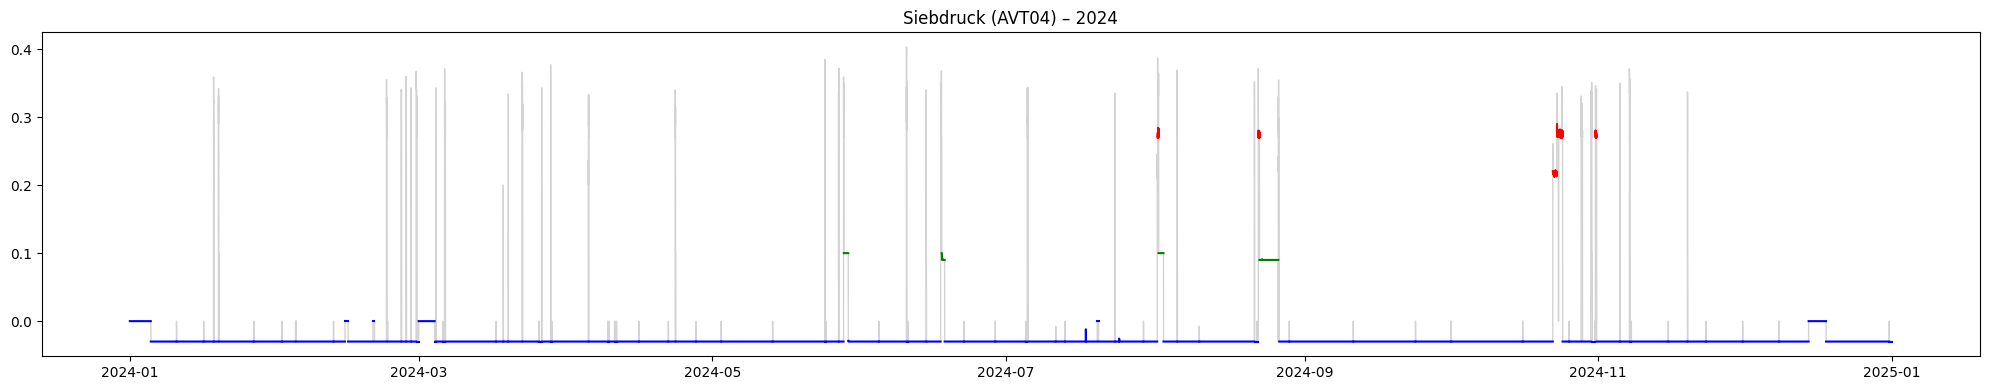


✔️  Loading AVT05 (vacuum pump1) for 2018


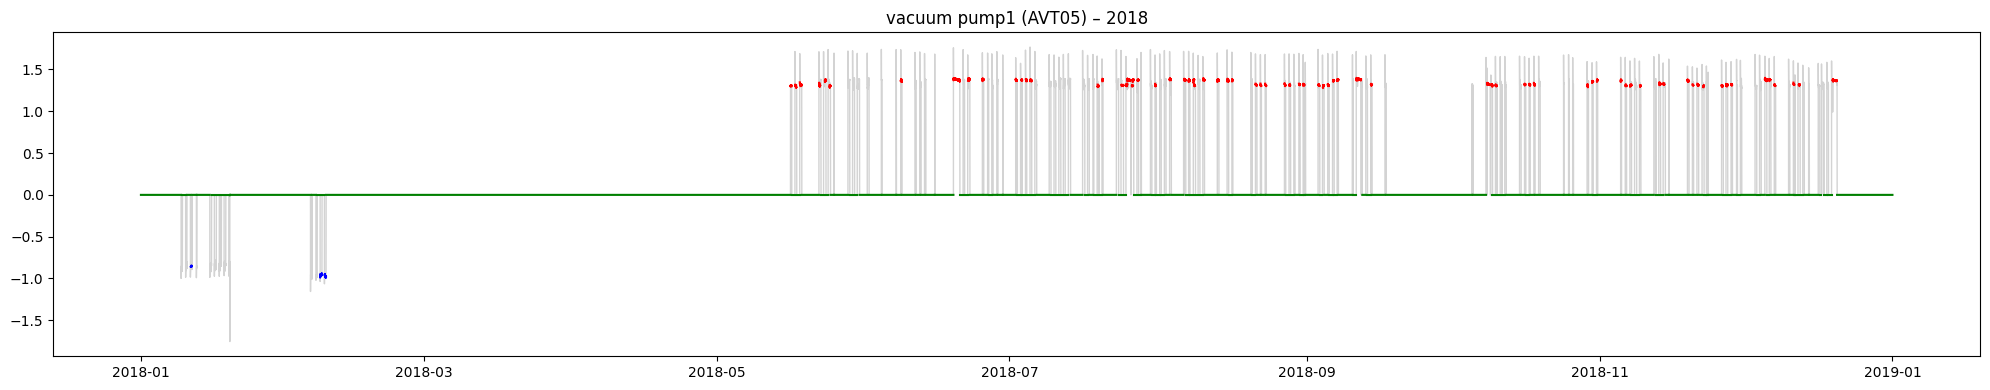


✔️  Loading AVT05 (vacuum pump1) for 2019


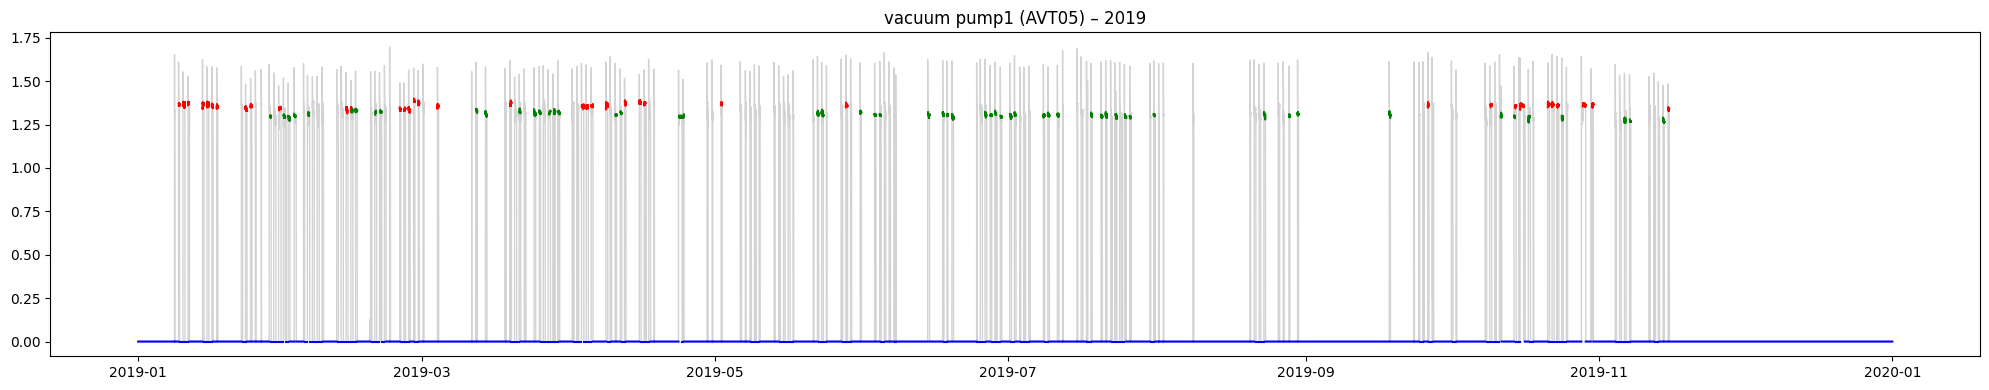


✔️  Loading AVT05 (vacuum pump1) for 2020


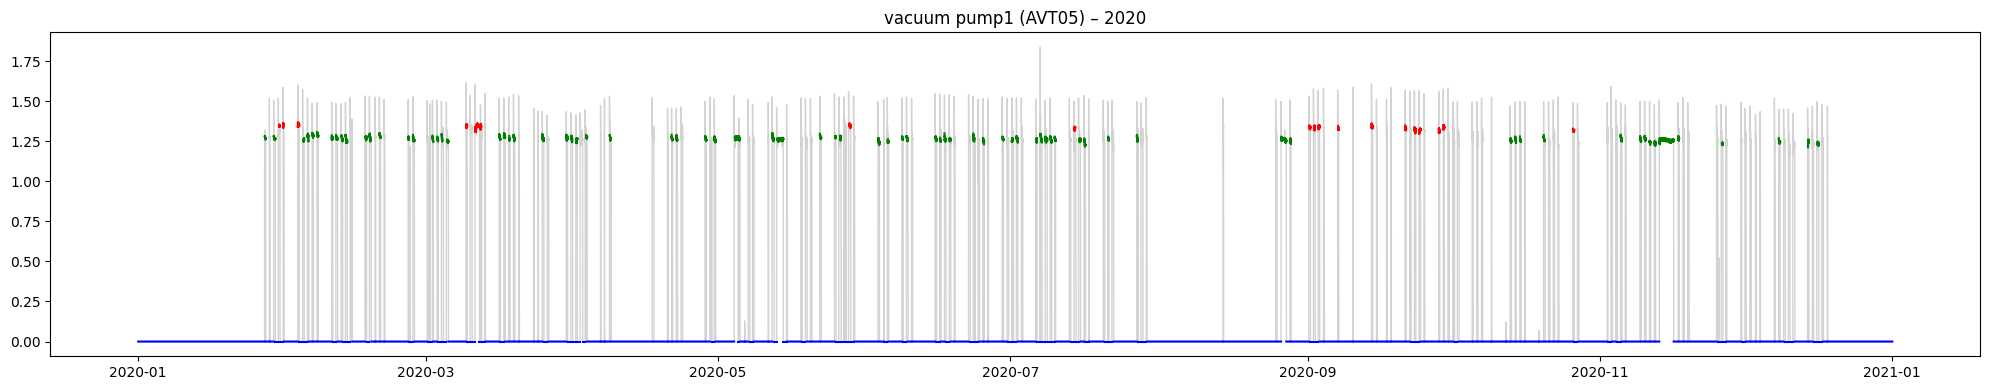


✔️  Loading AVT05 (vacuum pump1) for 2021


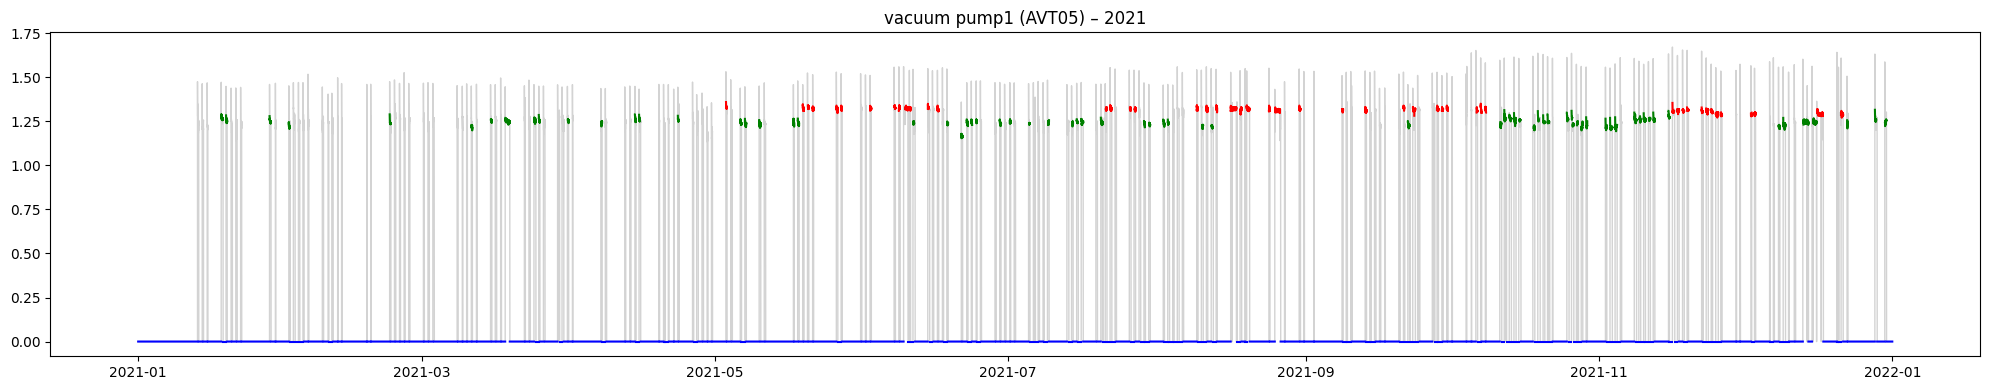


✔️  Loading AVT05 (vacuum pump1) for 2022


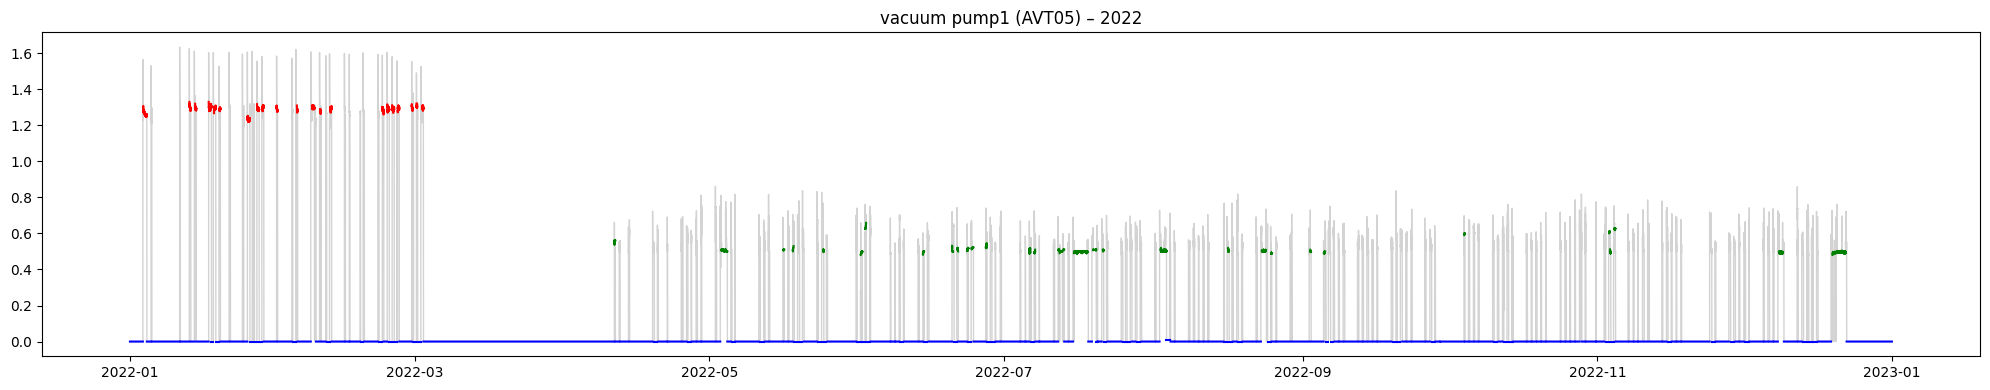


✔️  Loading AVT05 (vacuum pump1) for 2023


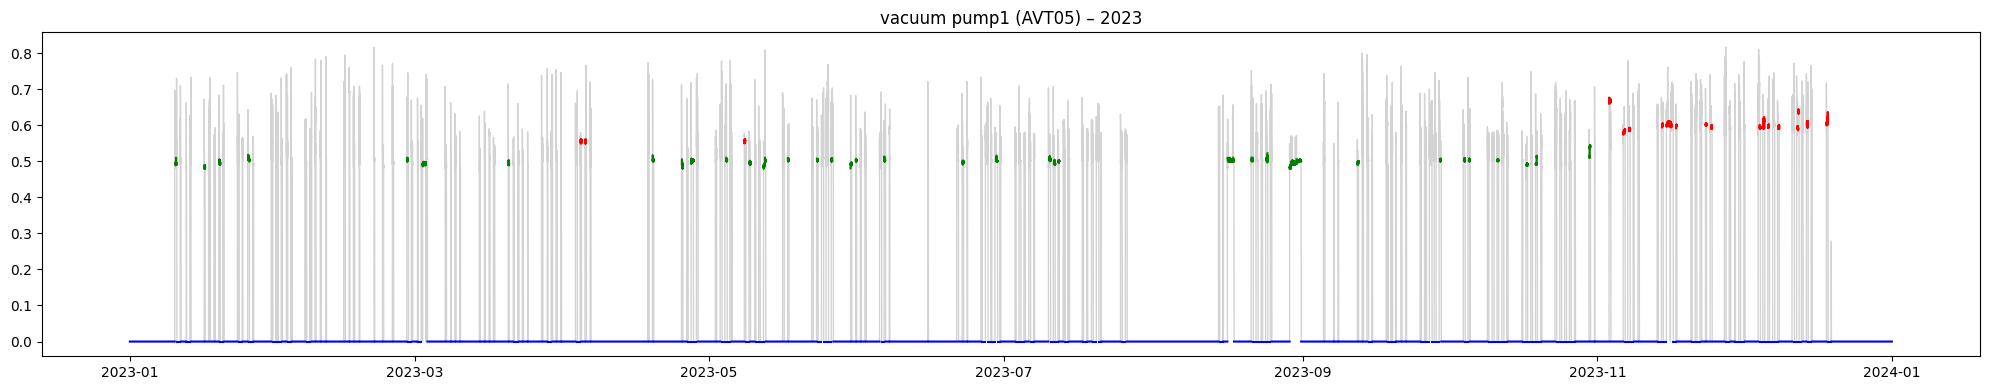


✔️  Loading AVT05 (vacuum pump1) for 2024


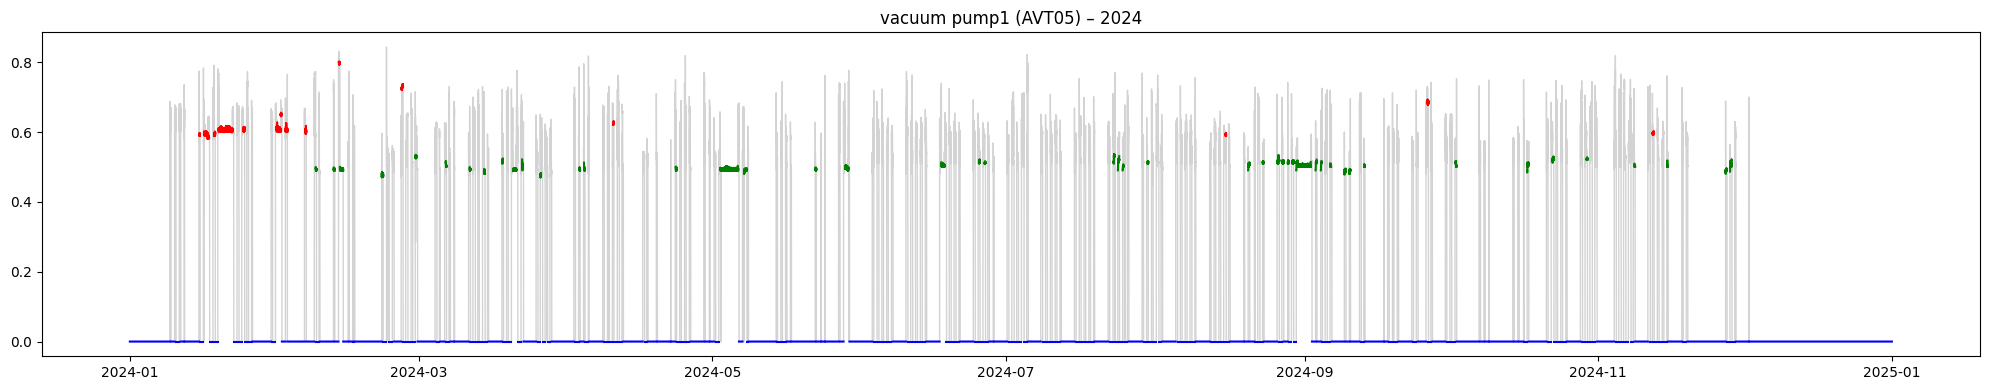


✔️  Loading AVT06 (vacuum pump2) for 2018


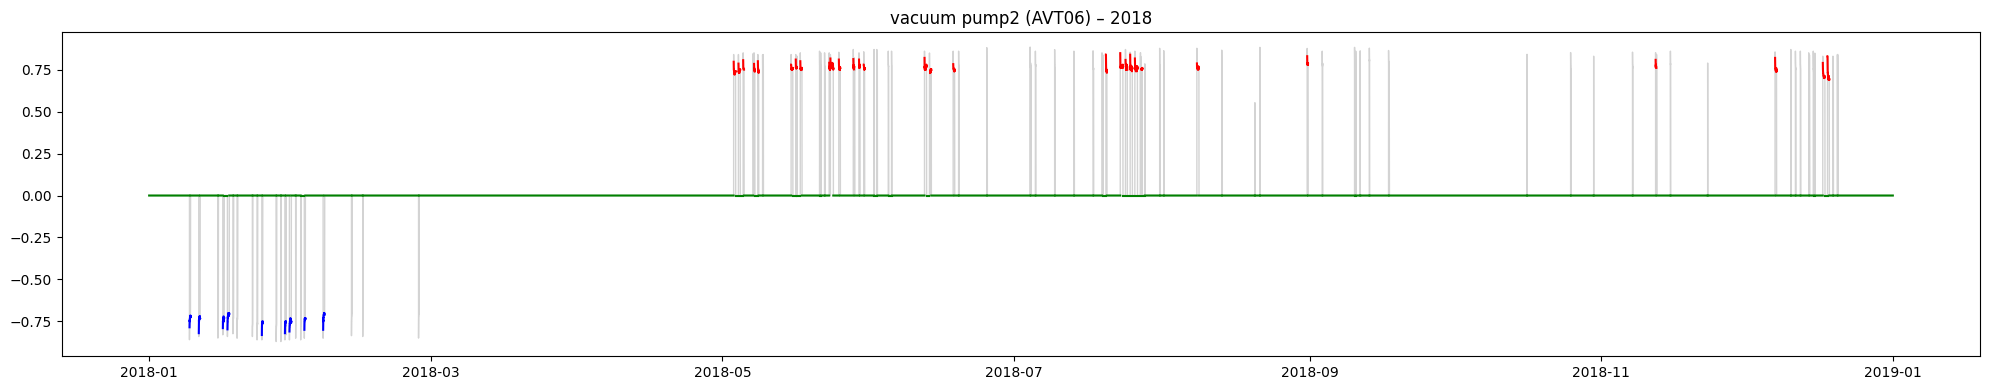


✔️  Loading AVT06 (vacuum pump2) for 2019


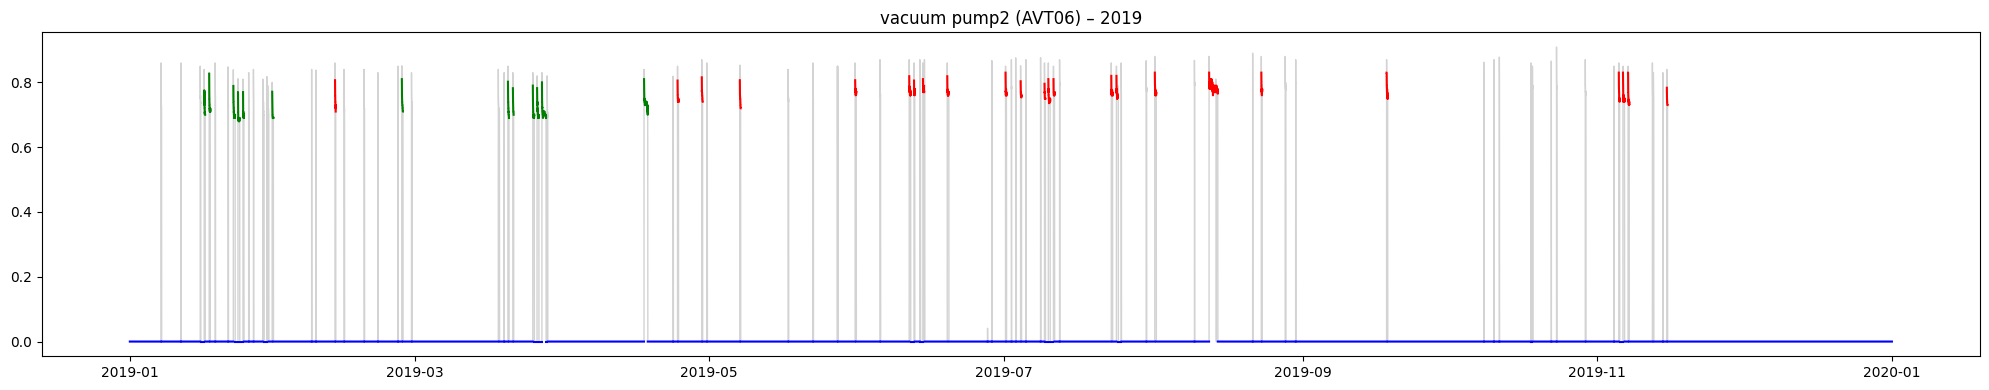


✔️  Loading AVT06 (vacuum pump2) for 2020


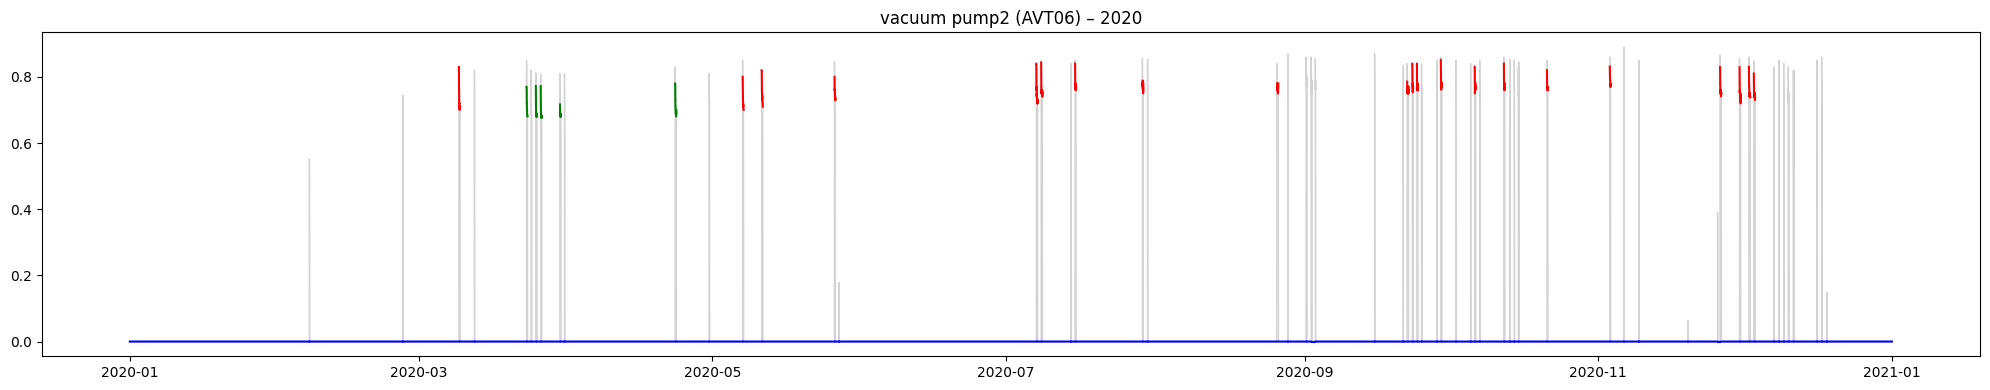


✔️  Loading AVT06 (vacuum pump2) for 2021


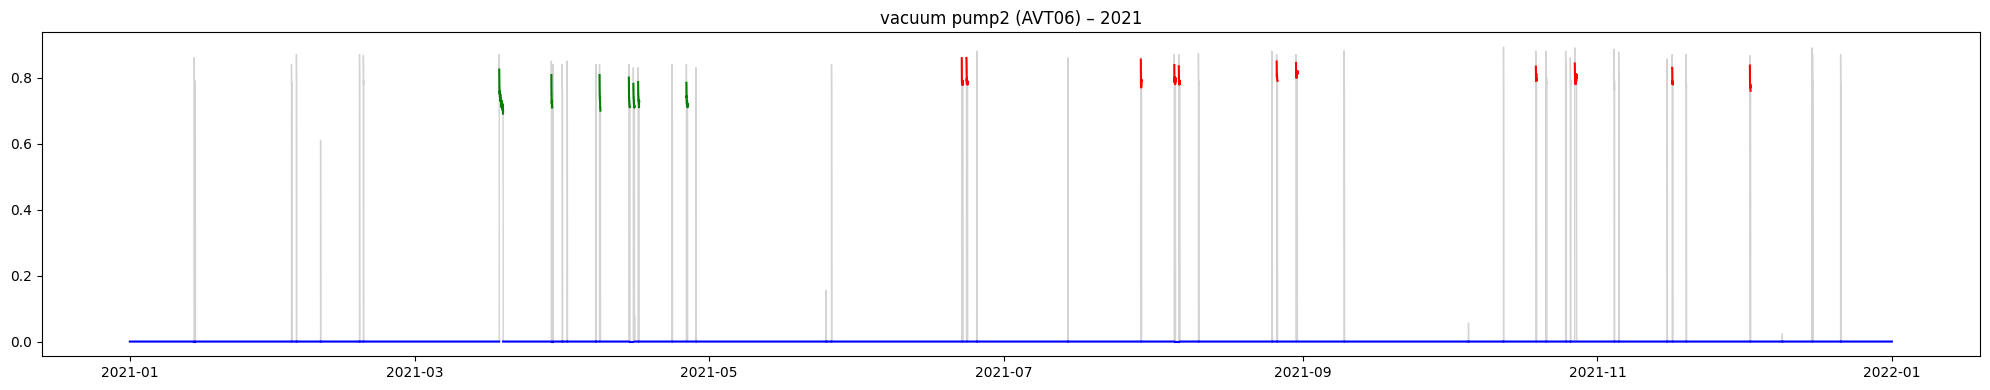


✔️  Loading AVT06 (vacuum pump2) for 2022


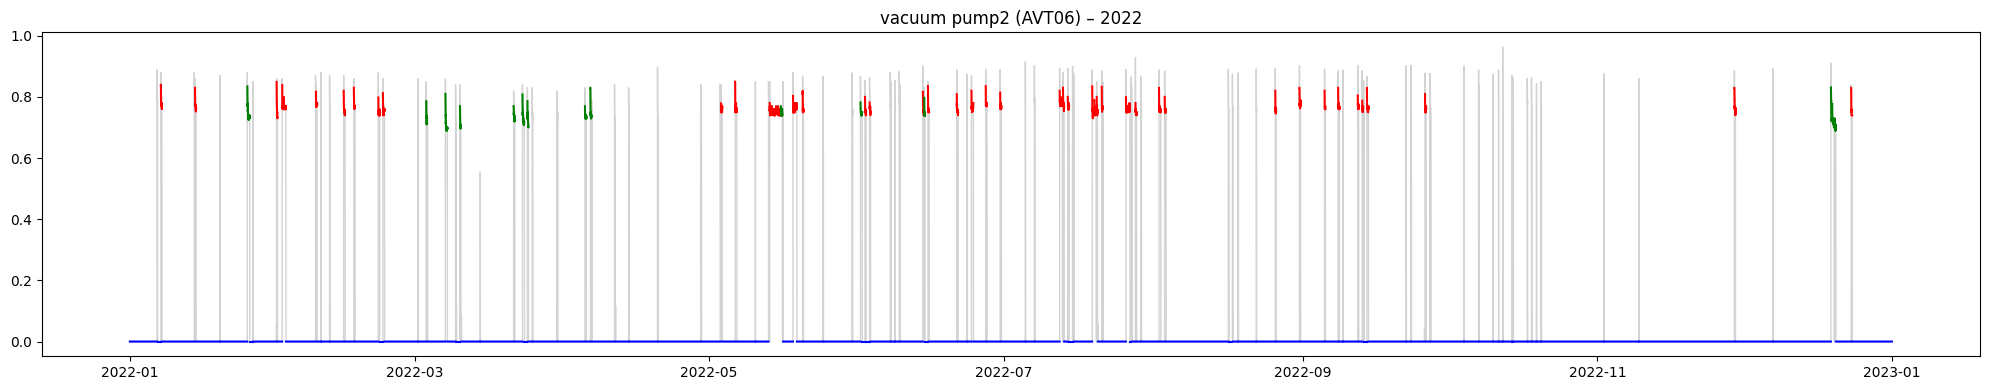


✔️  Loading AVT06 (vacuum pump2) for 2023


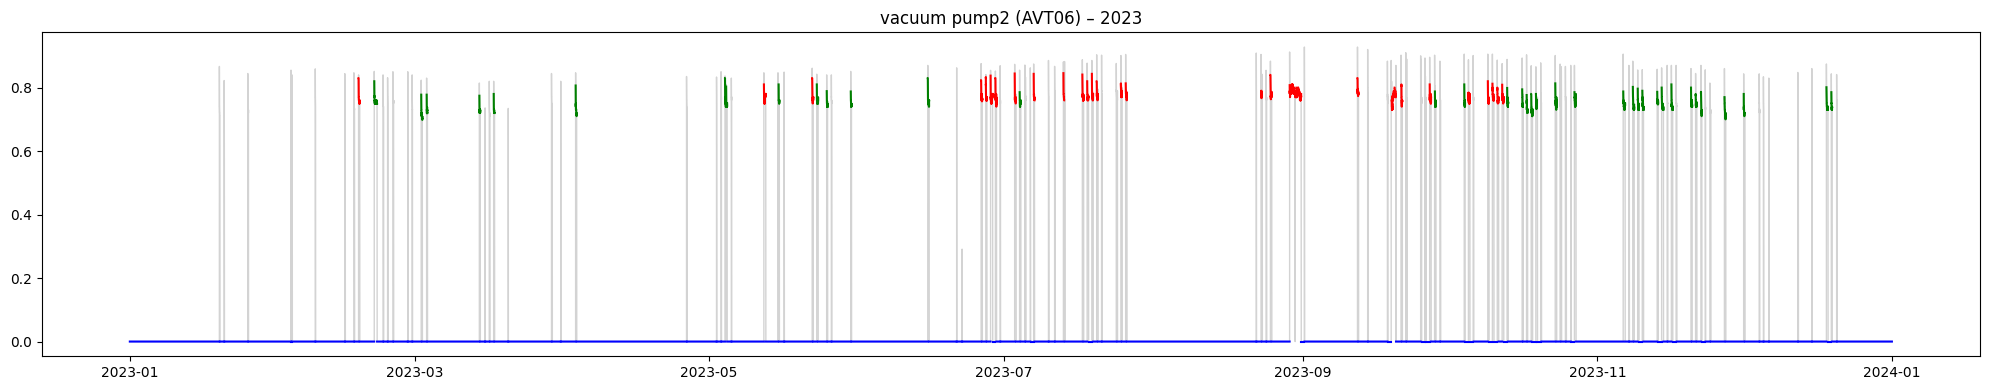


✔️  Loading AVT06 (vacuum pump2) for 2024


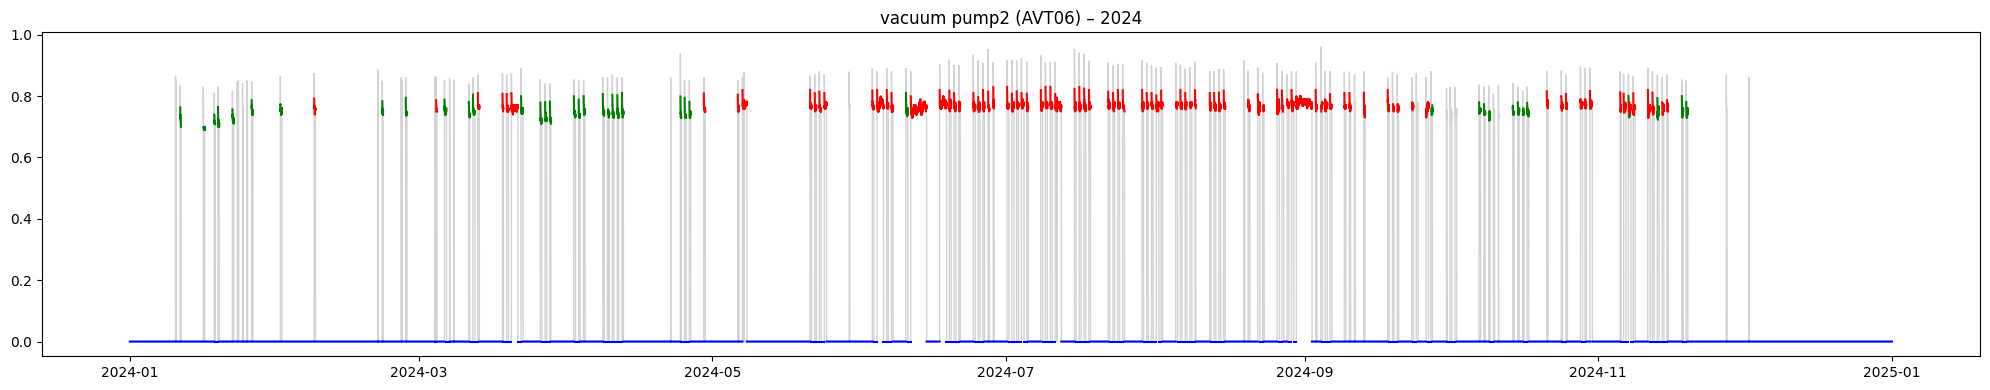


✔️  Loading AVT08 (SRO 700) for 2018


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def detect_plateaus(series, flat_thresh=0.004, min_length=200, window=5):
    """
    Detect flat regions (plateaus) in the signal.
    """
    smoothed = series.rolling(window=window, center=True, min_periods=1).mean()
    derivative = np.abs(np.diff(smoothed, prepend=smoothed.iloc[0]))
    plateau_mask = derivative < flat_thresh

    segments = []
    start = None
    for i, is_flat in enumerate(plateau_mask):
        if is_flat and start is None:
            start = i
        elif not is_flat and start is not None:
            if i - start >= min_length:
                segments.append((start, i))
            start = None
    if start is not None and len(smoothed) - start >= min_length:
        segments.append((start, len(smoothed)))

    return segments, smoothed

def cluster_plateaus(smoothed, segments, n_clusters=3):
    """
    Cluster plateau segments based on their mean values.
    """
    plateau_means = [smoothed[start:end].mean() for start, end in segments]
    X = np.array(plateau_means).reshape(-1, 1)
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_.flatten()

    sorted_indices = np.argsort(centers)
    label_mapping = {old: new for new, old in enumerate(sorted_indices)}
    labels = np.vectorize(label_mapping.get)(labels)
    
    return labels

def plot_plateaus(df, power_col, segments, labels, colors=['blue', 'green', 'red'], title=""):
    """
    Plot full time series in gray and overlay colored plateaus.
    """
    plt.figure(figsize=(20, 4))
    plt.plot(df.index, df[power_col], color="lightgray", linewidth=1)
    
    for (start, end), label in zip(segments, labels):
        plt.plot(df.index[start:end], df[power_col].iloc[start:end], color=colors[label], linewidth=1.5)
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# ------------------ Main loop -------------------

years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

for machine_id, machine_name in machine_names.items():
    for year in years:
        file_path = f"backupDaten/AVT/{machine_id}_{year}.csv"
        if os.path.exists(file_path):
            print(f"\n✔️  Loading {machine_id} ({machine_name}) for {year}")
            df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
            df_full = preprocess_data_minute_resolution(df, year)  # assumed available
            power_col = f"Power_{machine_id}"
            
            segments, smoothed = detect_plateaus(df_full[power_col])
            labels = cluster_plateaus(smoothed, segments)
            plot_title = f"{machine_name} ({machine_id}) – {year}"
            plot_plateaus(df_full, power_col, segments, labels, title=plot_title)
        else:
            print(f"⚠️  File not found: {file_path}")


✔️  Loading AVT01 for 2018
✔️  Loading AVT01 for 2019
✔️  Loading AVT01 for 2020
✔️  Loading AVT01 for 2021
✔️  Loading AVT01 for 2022
✔️  Loading AVT01 for 2023
✔️  Loading AVT01 for 2024


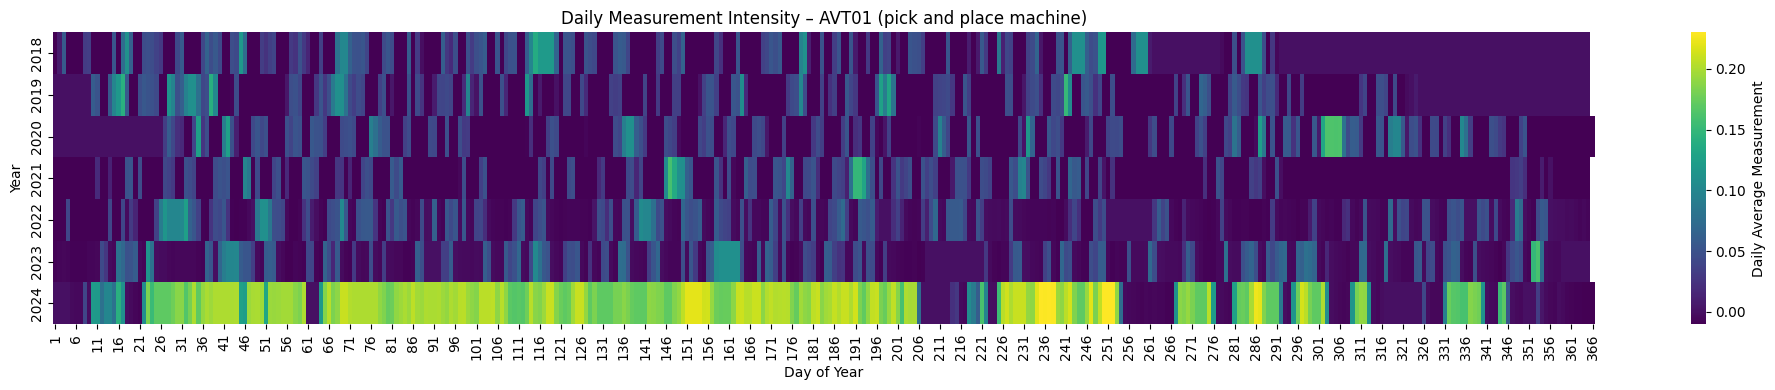

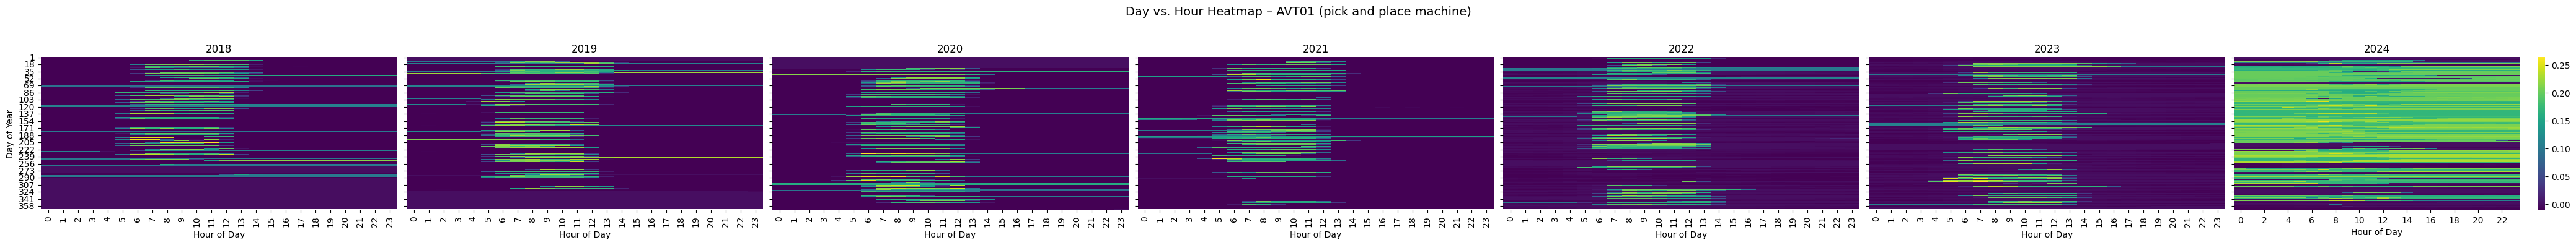

✔️  Loading AVT02 for 2018
✔️  Loading AVT02 for 2019
✔️  Loading AVT02 for 2020
✔️  Loading AVT02 for 2021
✔️  Loading AVT02 for 2022
✔️  Loading AVT02 for 2023
✔️  Loading AVT02 for 2024


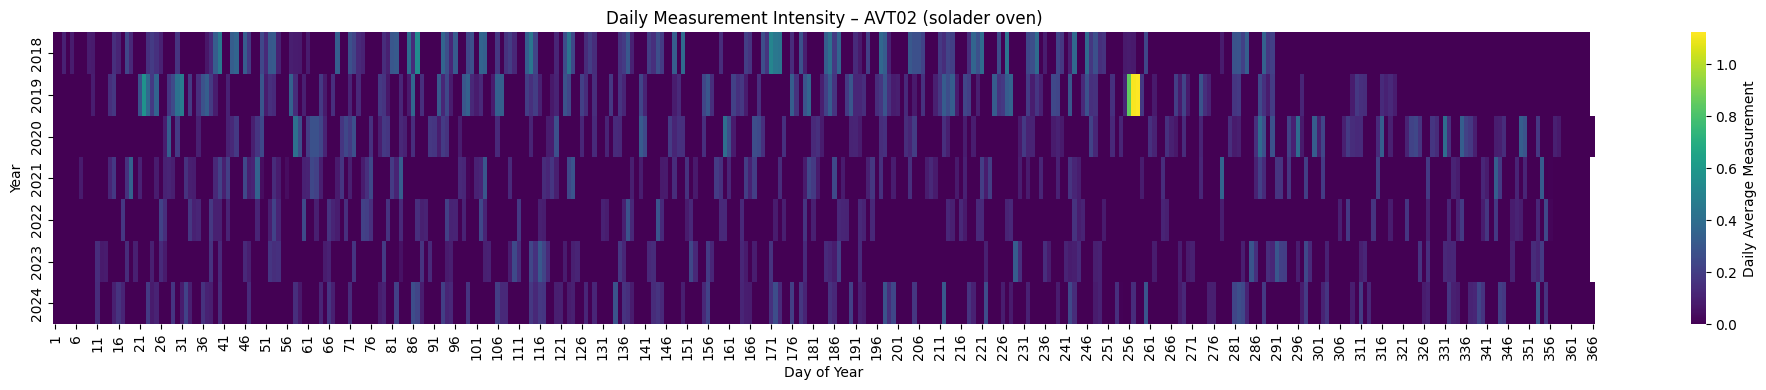

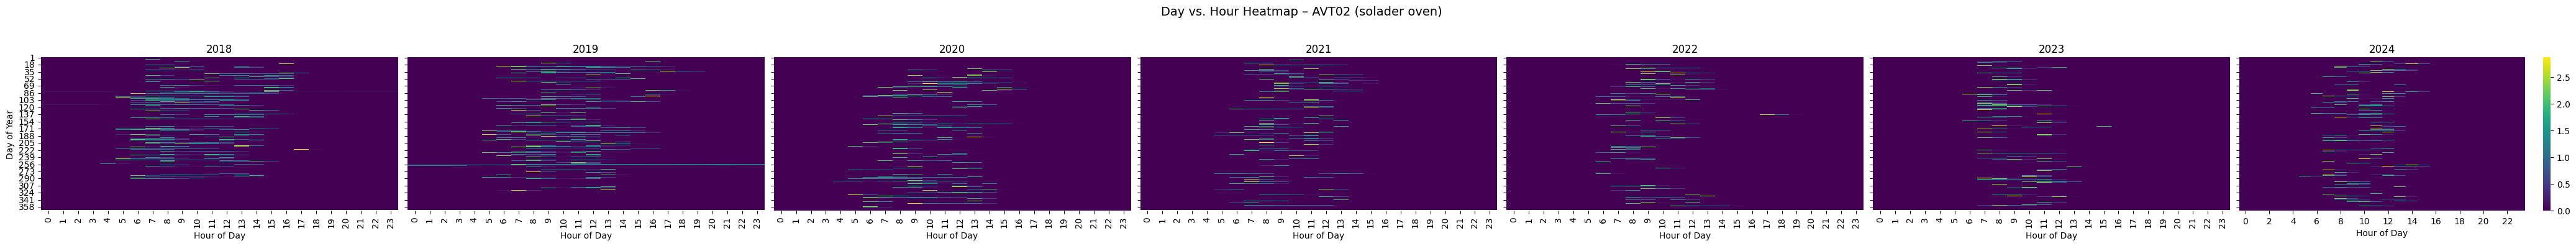

✔️  Loading AVT03 for 2018
✔️  Loading AVT03 for 2019
✔️  Loading AVT03 for 2020
✔️  Loading AVT03 for 2021
✔️  Loading AVT03 for 2022
✔️  Loading AVT03 for 2023
✔️  Loading AVT03 for 2024


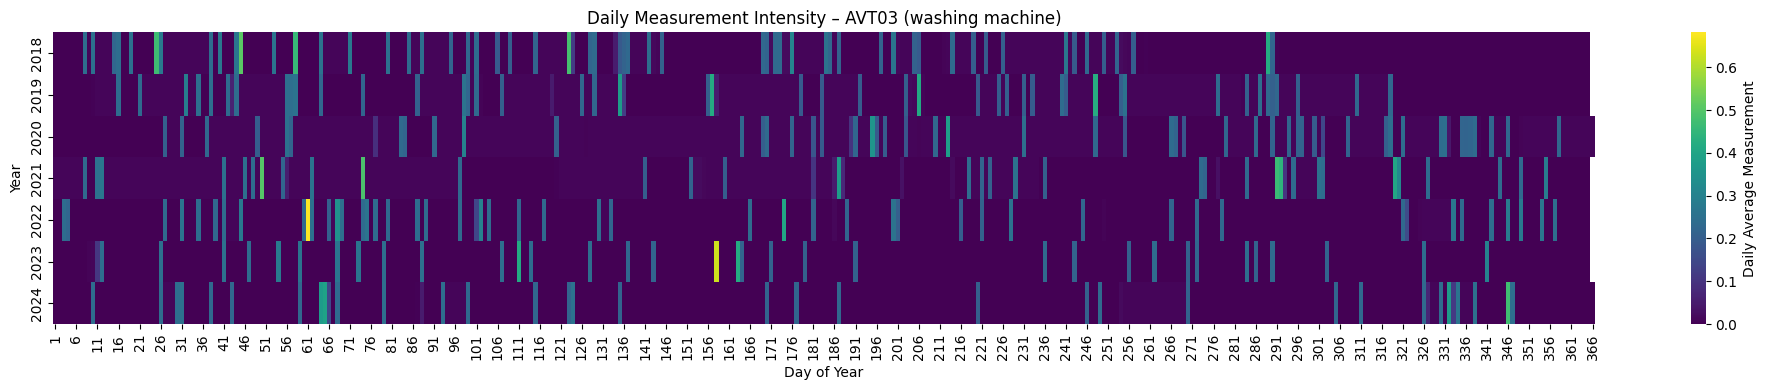

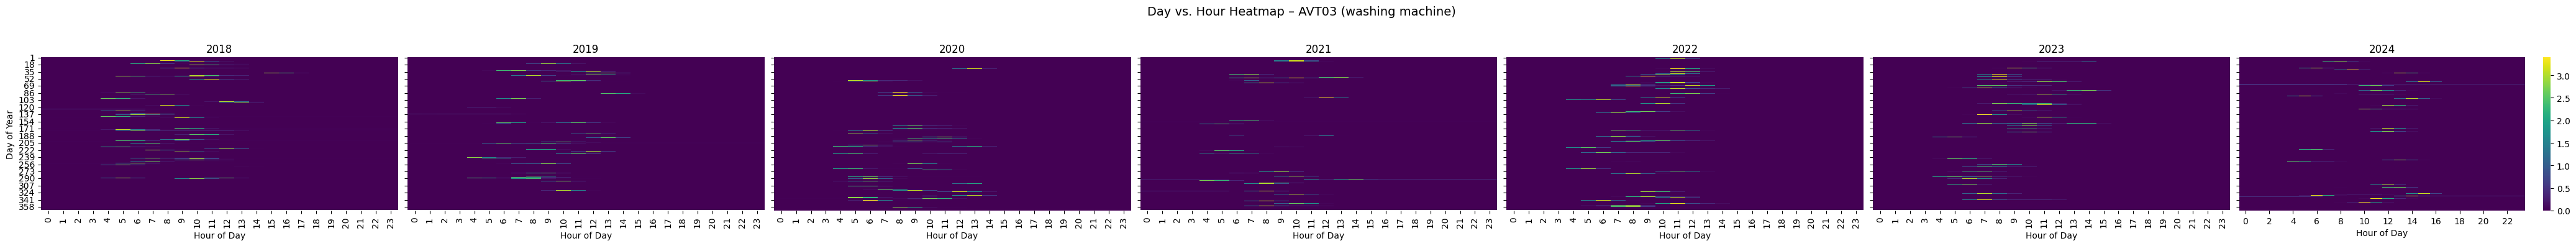

✔️  Loading AVT04 for 2018
✔️  Loading AVT04 for 2019
✔️  Loading AVT04 for 2020
✔️  Loading AVT04 for 2021
✔️  Loading AVT04 for 2022
✔️  Loading AVT04 for 2023
✔️  Loading AVT04 for 2024


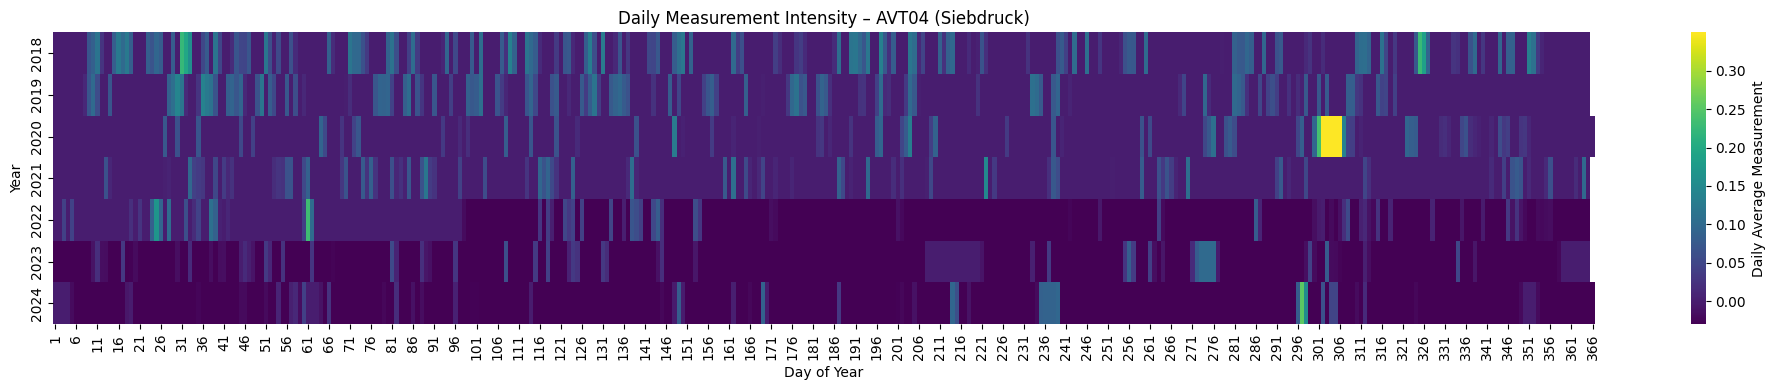

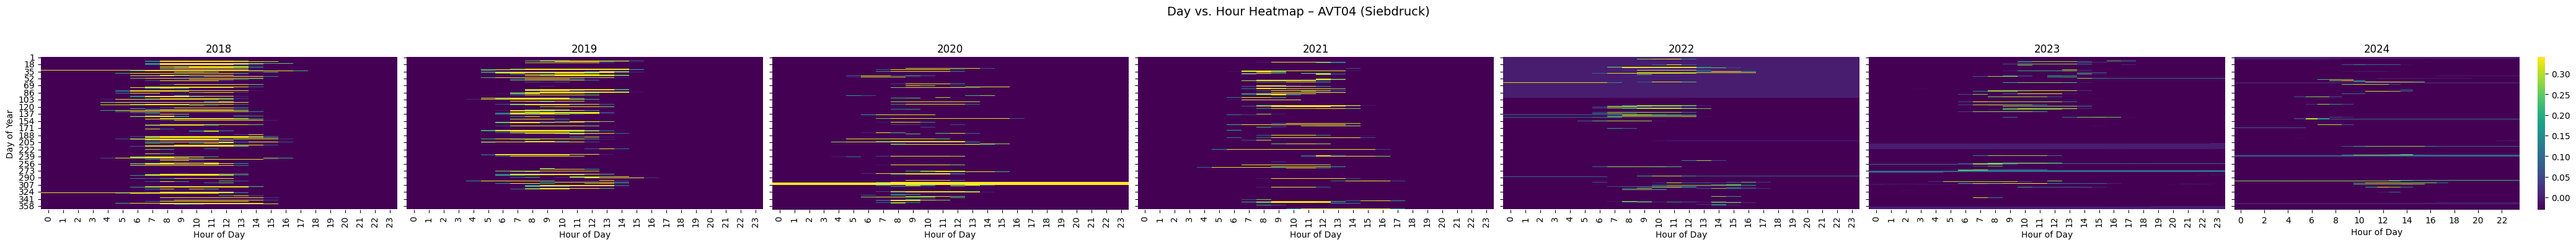

✔️  Loading AVT05 for 2018
✔️  Loading AVT05 for 2019
✔️  Loading AVT05 for 2020
✔️  Loading AVT05 for 2021
✔️  Loading AVT05 for 2022
✔️  Loading AVT05 for 2023
✔️  Loading AVT05 for 2024


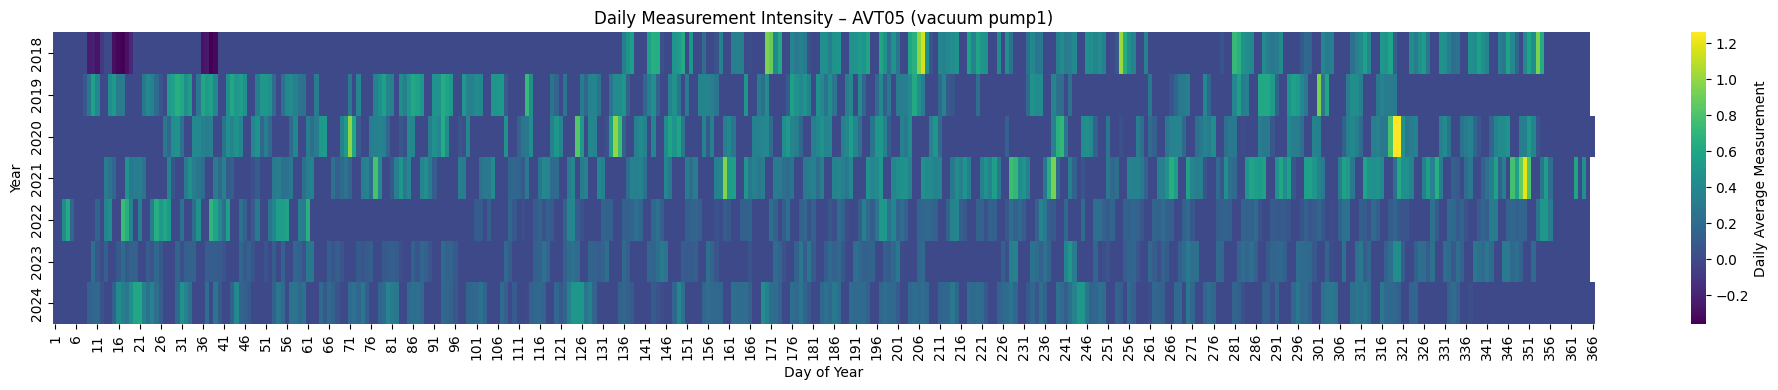

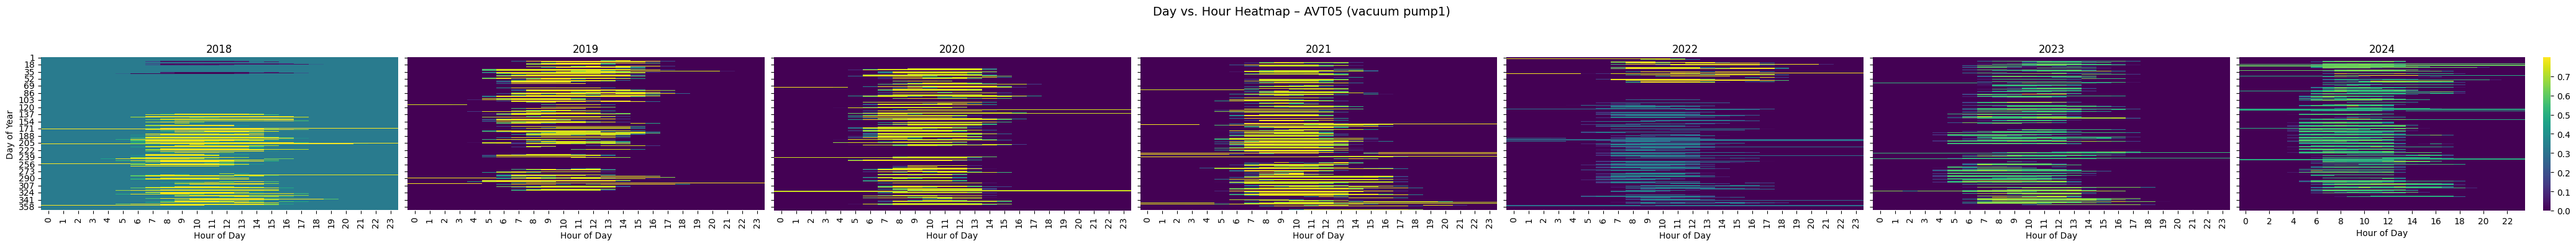

✔️  Loading AVT06 for 2018
✔️  Loading AVT06 for 2019
✔️  Loading AVT06 for 2020
✔️  Loading AVT06 for 2021
✔️  Loading AVT06 for 2022
✔️  Loading AVT06 for 2023
✔️  Loading AVT06 for 2024


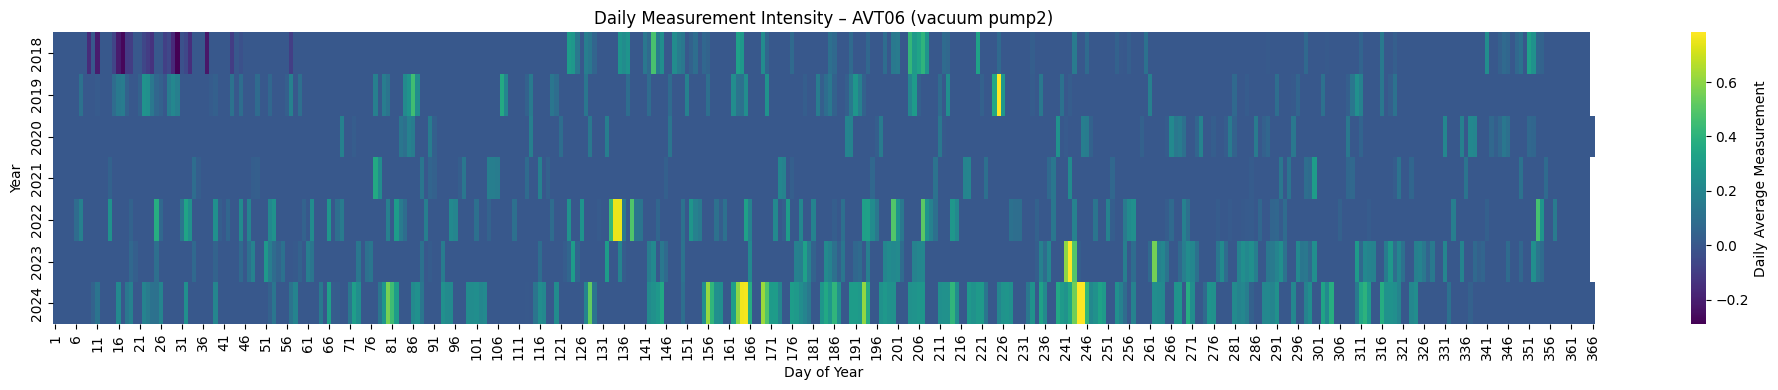

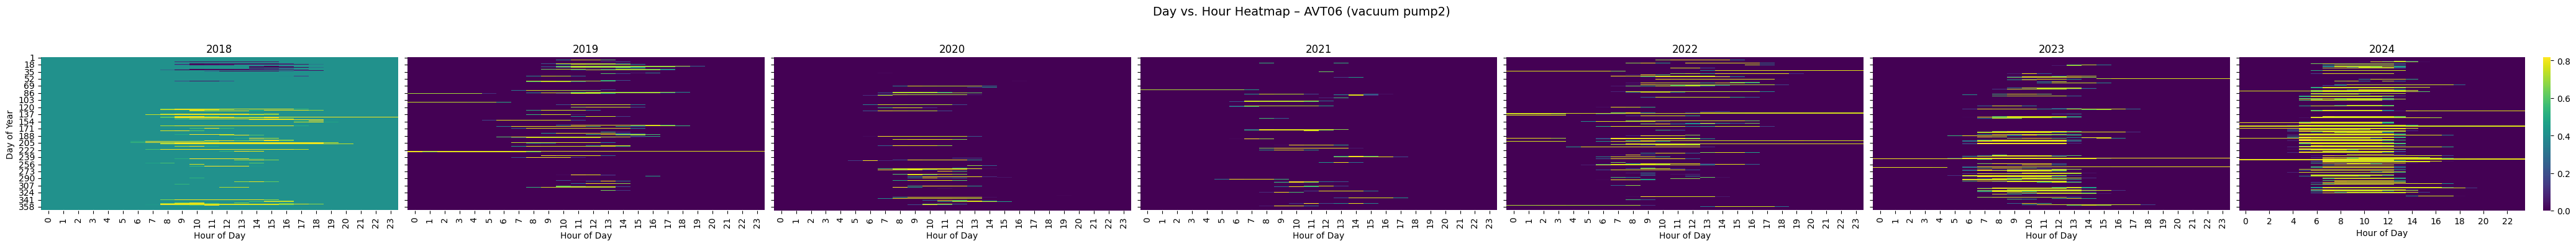

✔️  Loading AVT08 for 2018
✔️  Loading AVT08 for 2019
✔️  Loading AVT08 for 2020
✔️  Loading AVT08 for 2021
✔️  Loading AVT08 for 2022
✔️  Loading AVT08 for 2023
✔️  Loading AVT08 for 2024


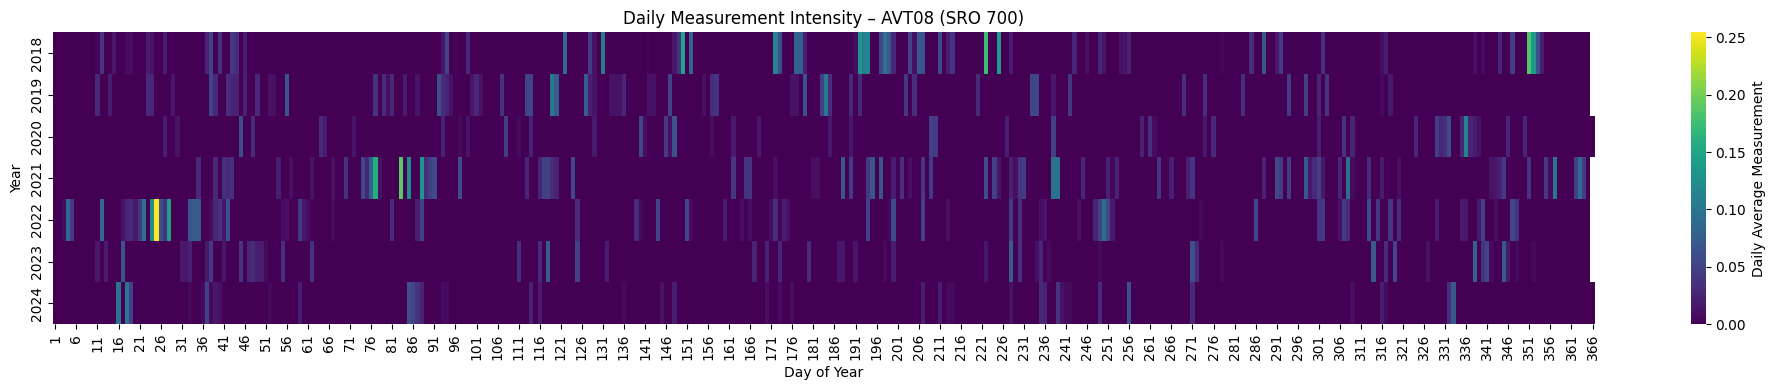

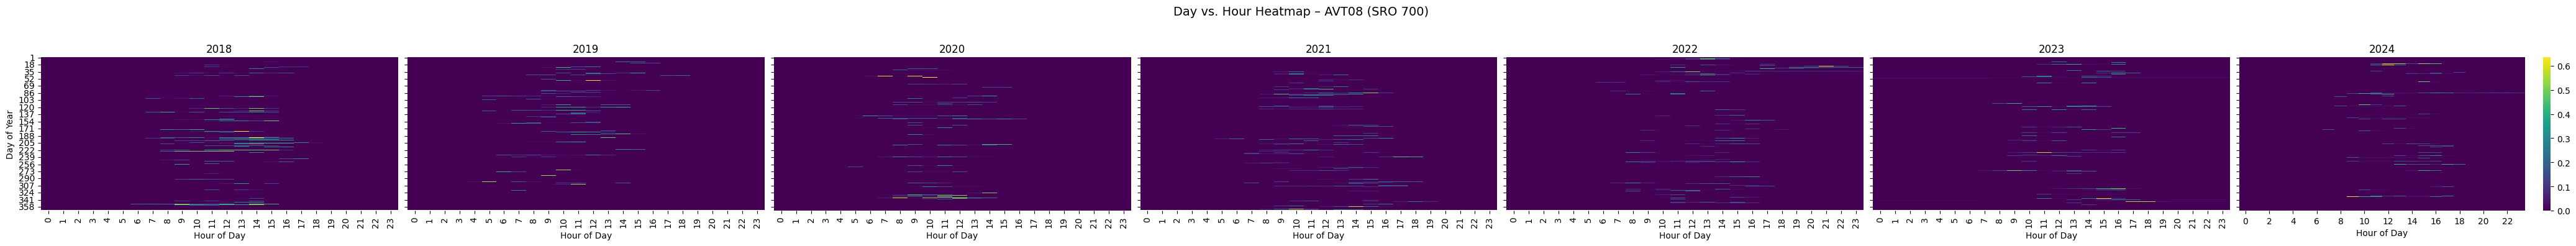

✔️  Loading AVT09 for 2018
✔️  Loading AVT09 for 2019
✔️  Loading AVT09 for 2020
✔️  Loading AVT09 for 2021
✔️  Loading AVT09 for 2022
✔️  Loading AVT09 for 2023
✔️  Loading AVT09 for 2024


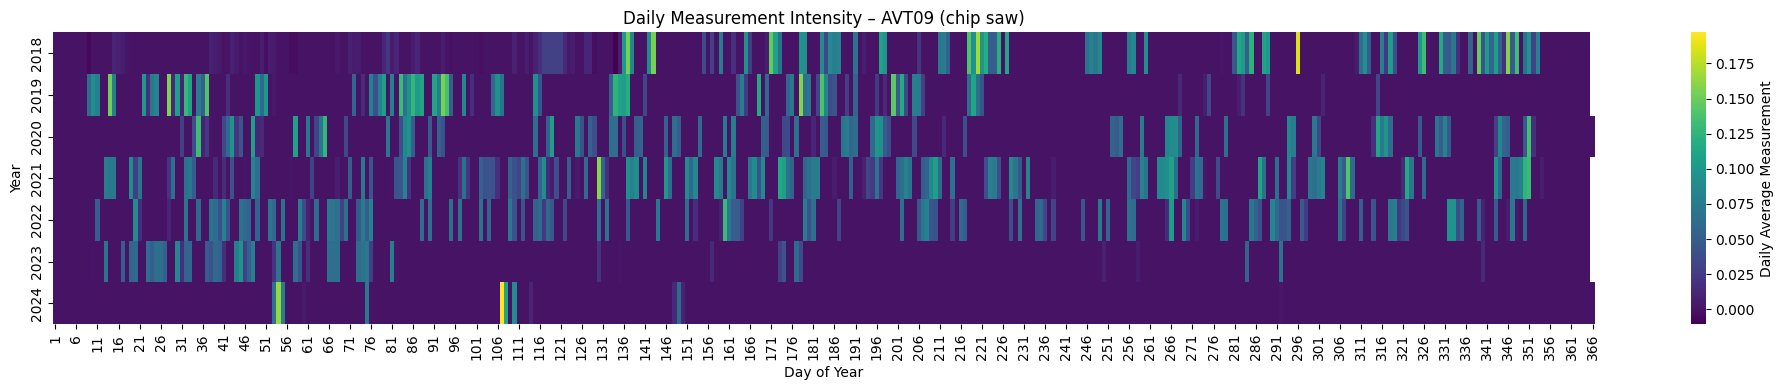

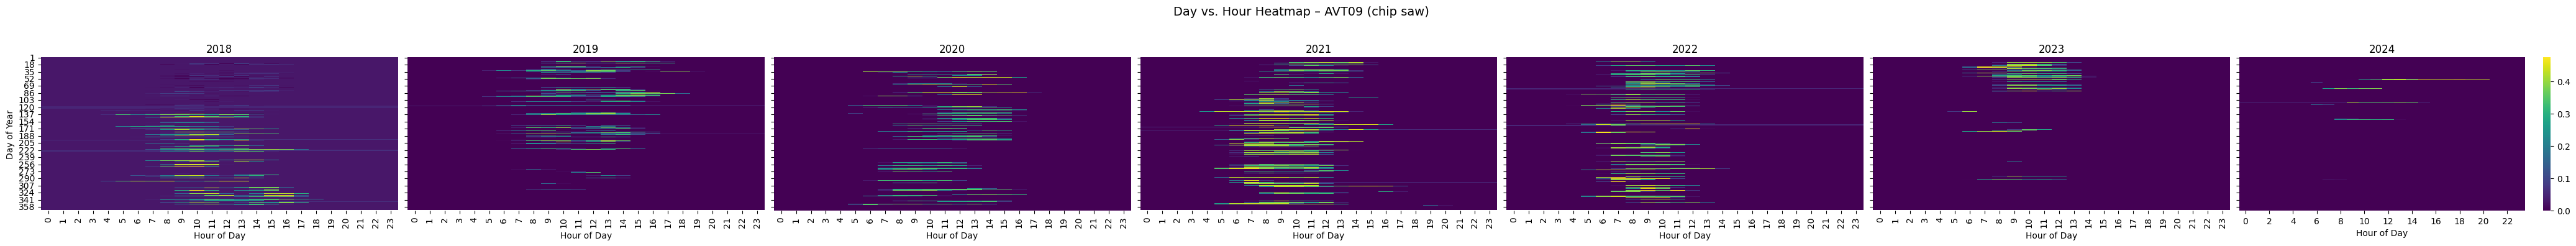

✔️  Loading AVT10 for 2018
✔️  Loading AVT10 for 2019
✔️  Loading AVT10 for 2020
✔️  Loading AVT10 for 2021
✔️  Loading AVT10 for 2022
✔️  Loading AVT10 for 2023
✔️  Loading AVT10 for 2024


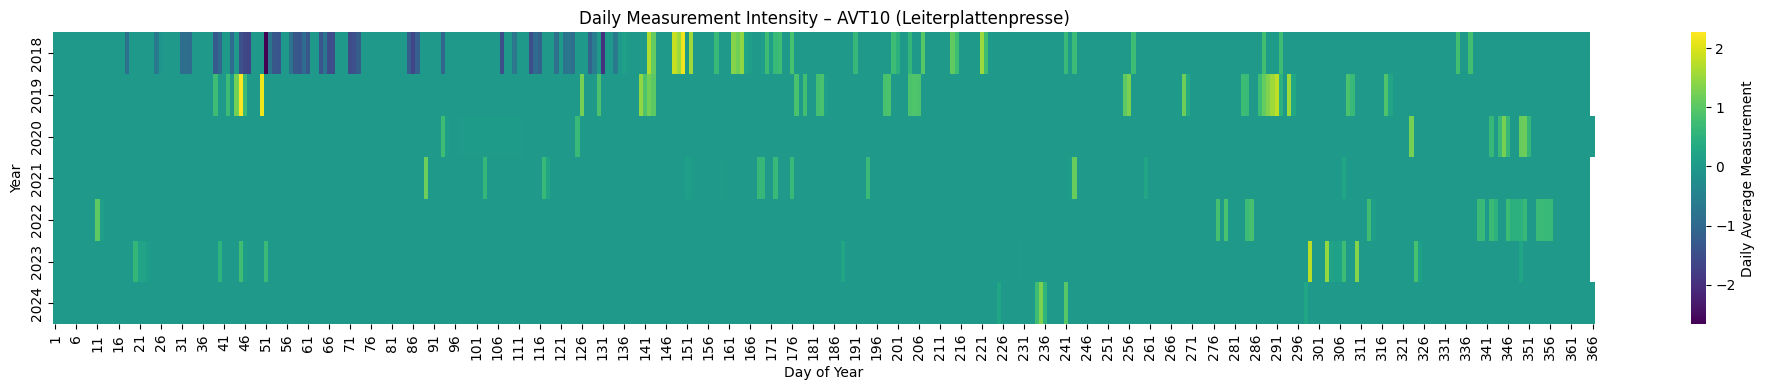

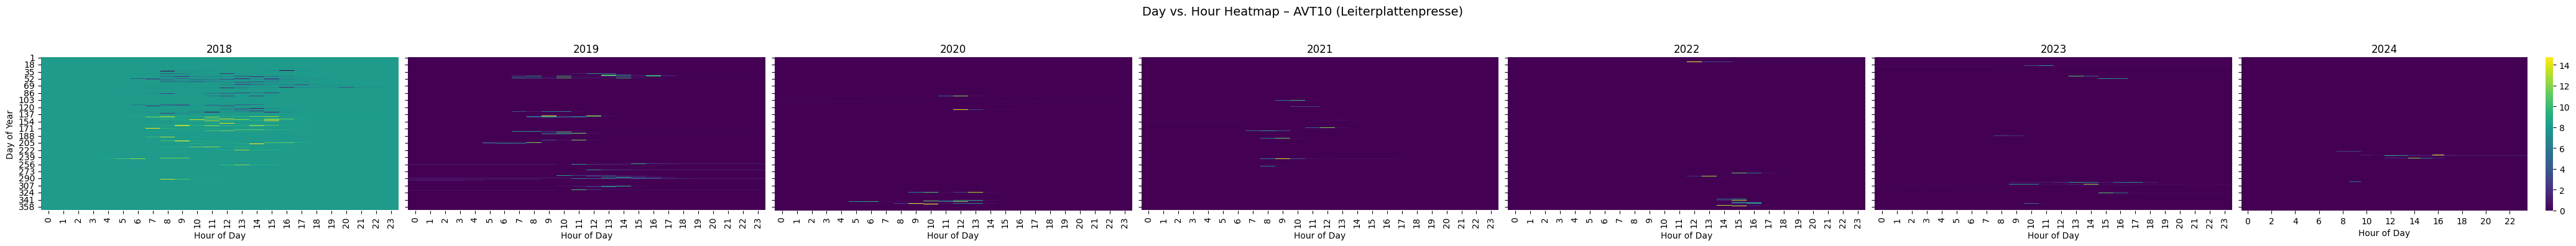

✔️  Loading AVT11 for 2018
✔️  Loading AVT11 for 2019
✔️  Loading AVT11 for 2020
✔️  Loading AVT11 for 2021
✔️  Loading AVT11 for 2022
✔️  Loading AVT11 for 2023
✔️  Loading AVT11 for 2024


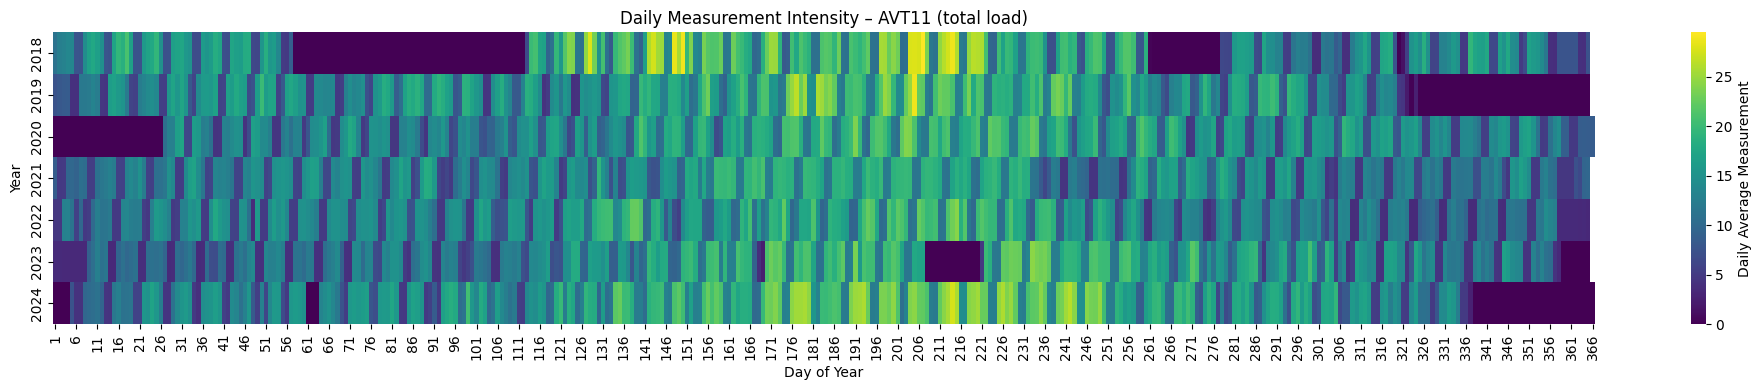

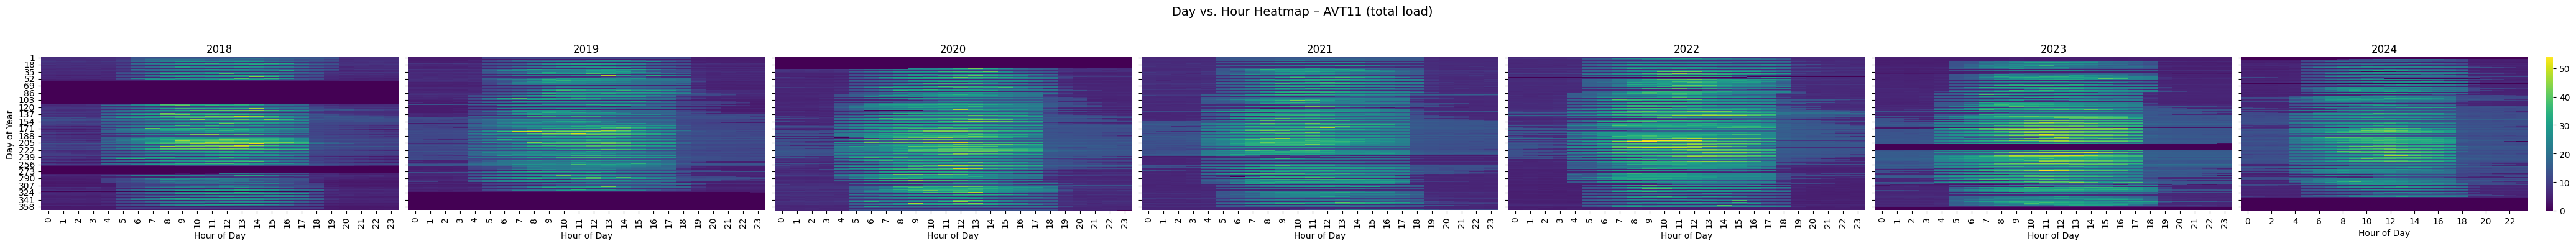

✔️  Loading AVT12 for 2018
✔️  Loading AVT12 for 2019
✔️  Loading AVT12 for 2020
✔️  Loading AVT12 for 2021
✔️  Loading AVT12 for 2022
✔️  Loading AVT12 for 2023
✔️  Loading AVT12 for 2024


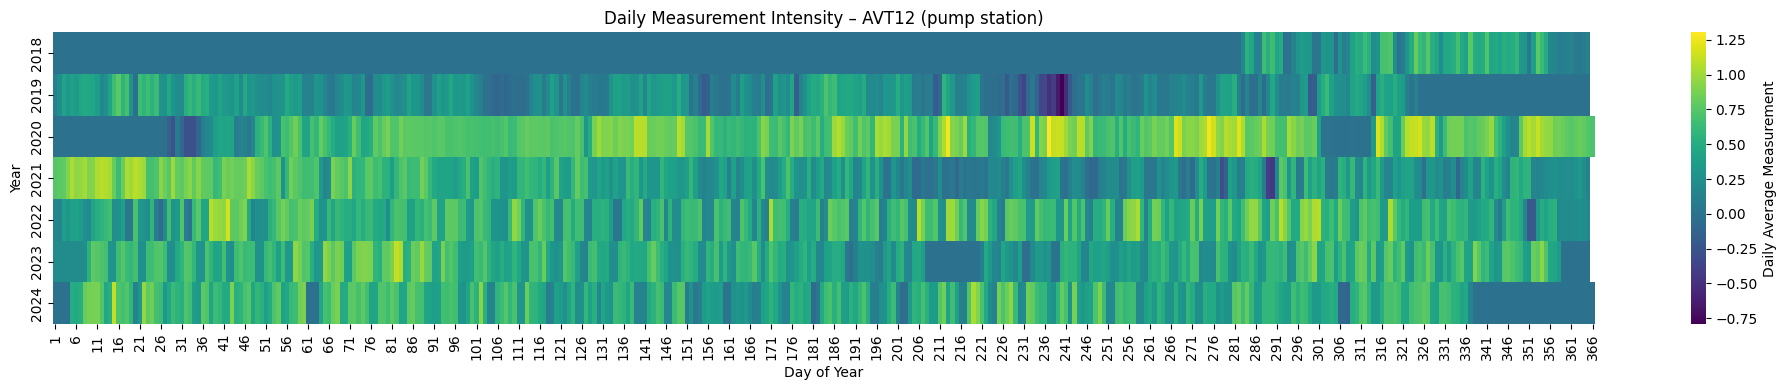

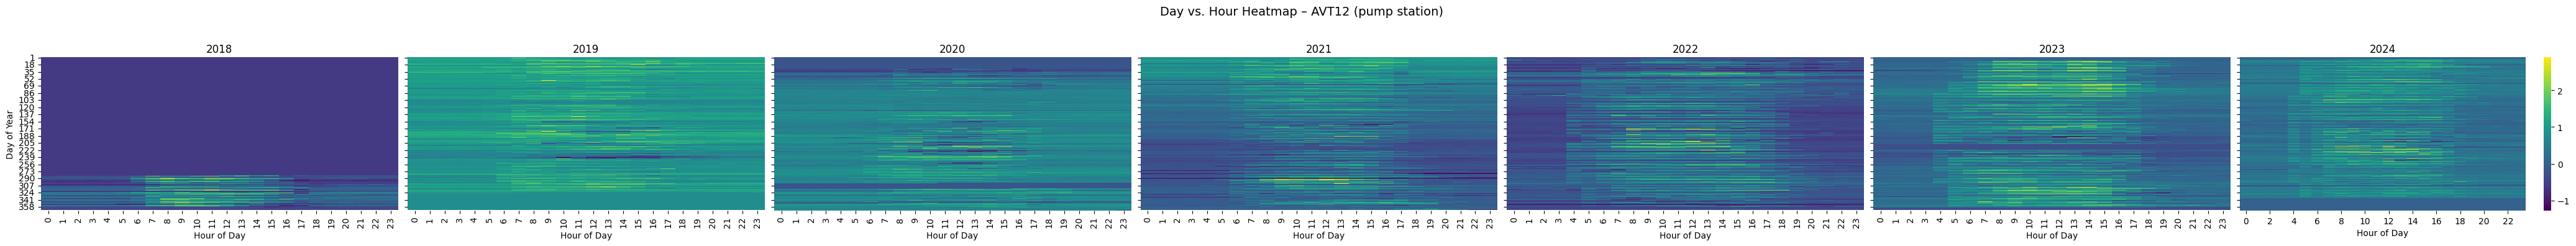

✔️  Loading AVT13 for 2018
✔️  Loading AVT13 for 2019
✔️  Loading AVT13 for 2020
✔️  Loading AVT13 for 2021
✔️  Loading AVT13 for 2022
✔️  Loading AVT13 for 2023
✔️  Loading AVT13 for 2024


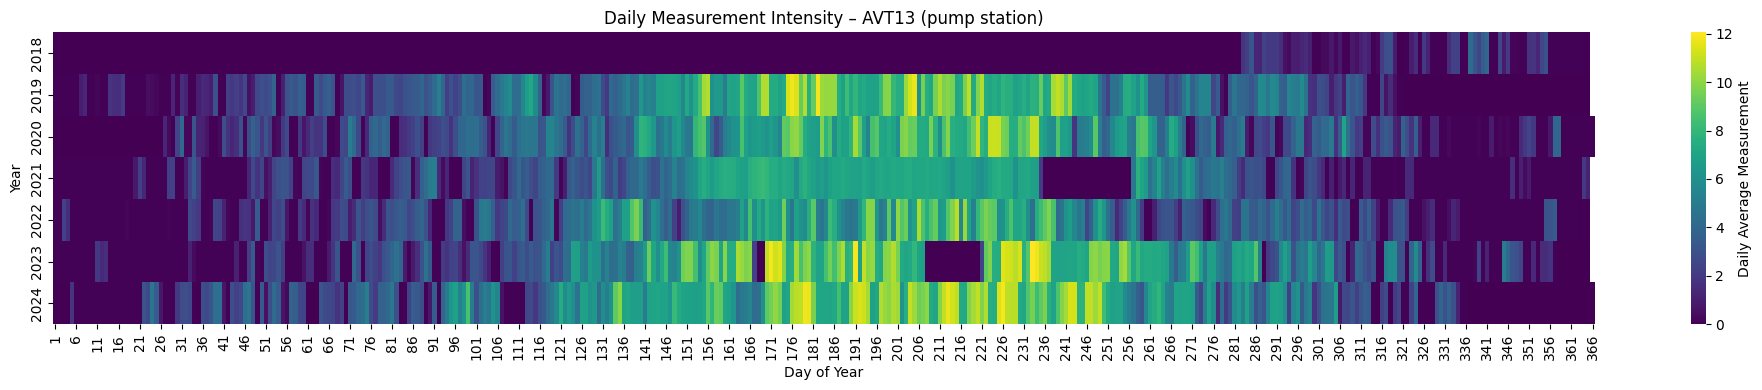

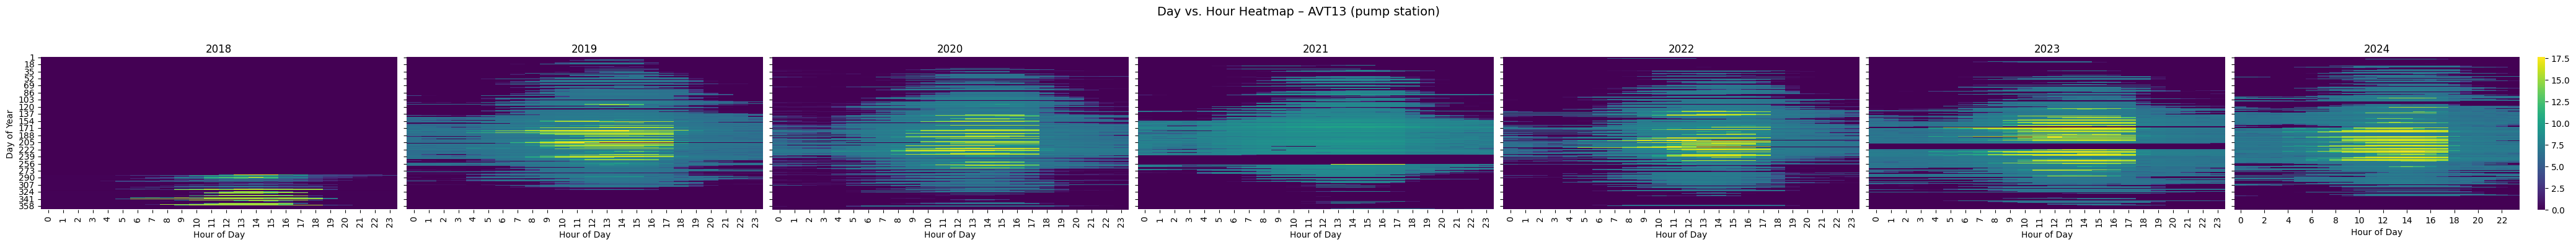

In [ ]:


years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
for machine_id, machine_name in machine_names.items():
    df_per_year = {}

    for year in years:
        file_path = f"backupDaten/AVT/{machine_id}_{year}.csv"
        if os.path.exists(file_path):
            print(f"✔️  Loading {machine_id} for {year}")
            df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
            df_full = preprocess_data_minute_resolution(df, year)
            df_per_year[year] = df_full
        else:
            print(f"⚠️  Missing file: {file_path}")

    if df_per_year:
        plot_combined_heatmaps(df_per_year, machine_id, machine_name)

✔️  Loading TH01_E30D2 for 2024


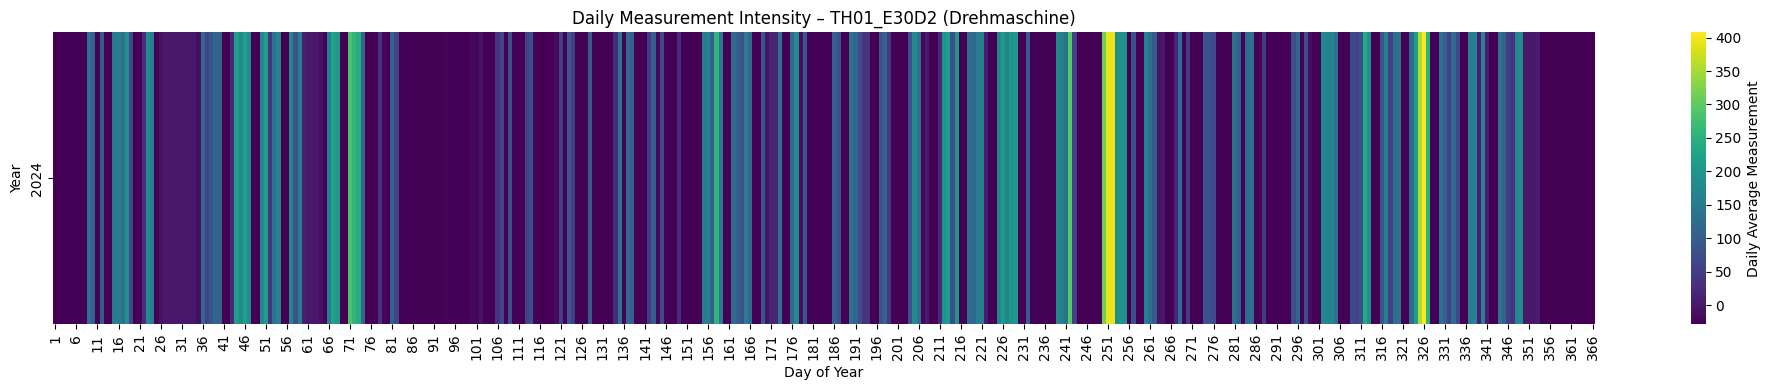

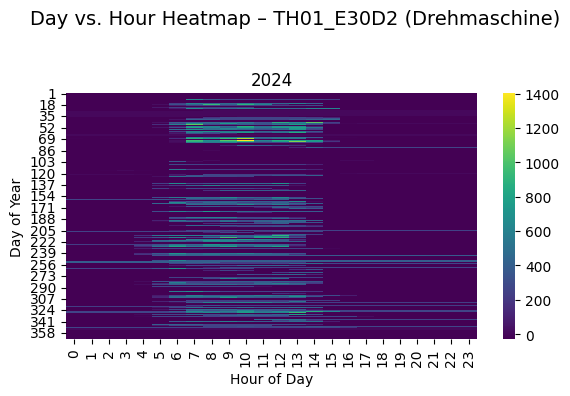

✔️  Loading TH02_48S for 2024


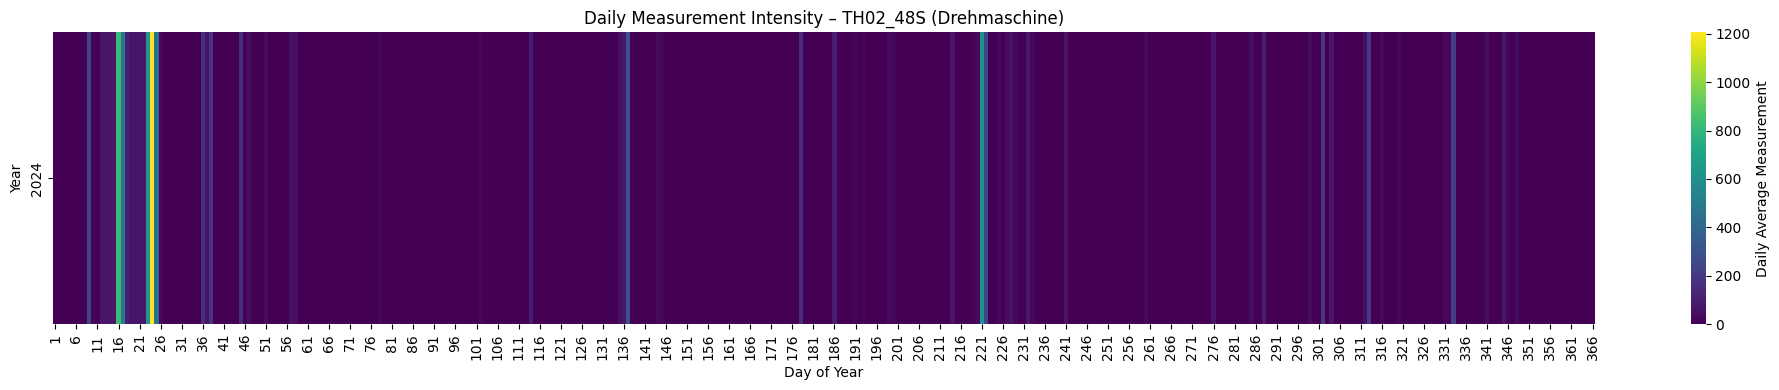

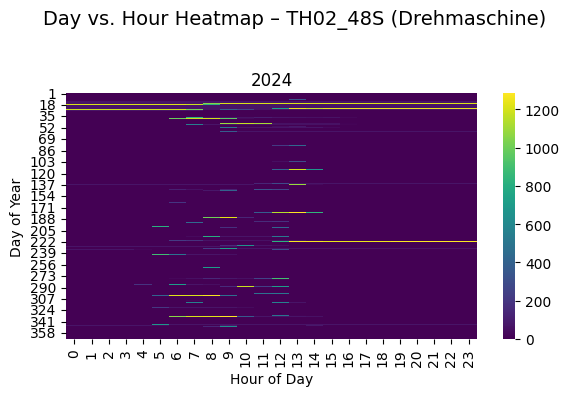

✔️  Loading TH03_CTX800TC for 2024


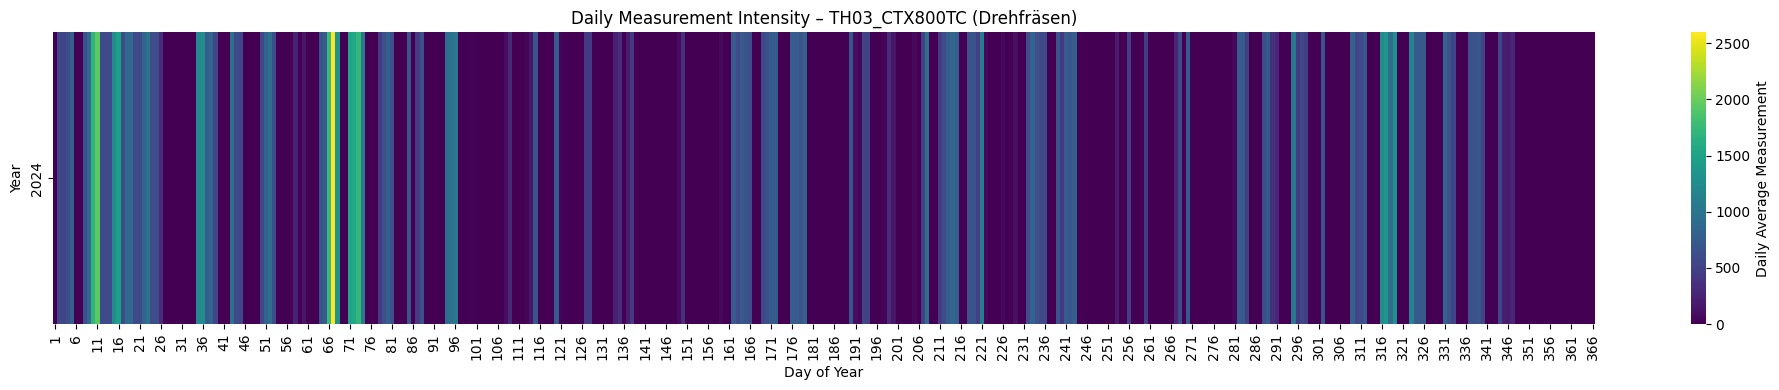

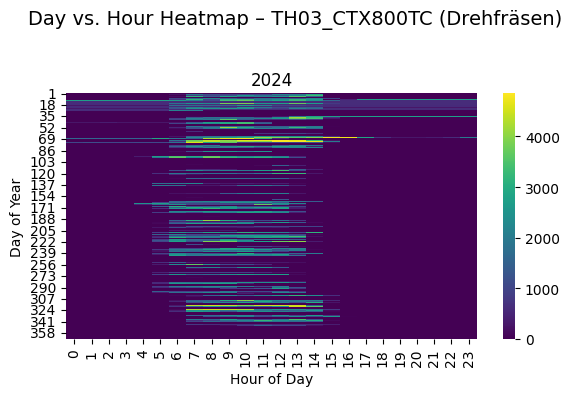

✔️  Loading TH04_DNG50evo for 2024


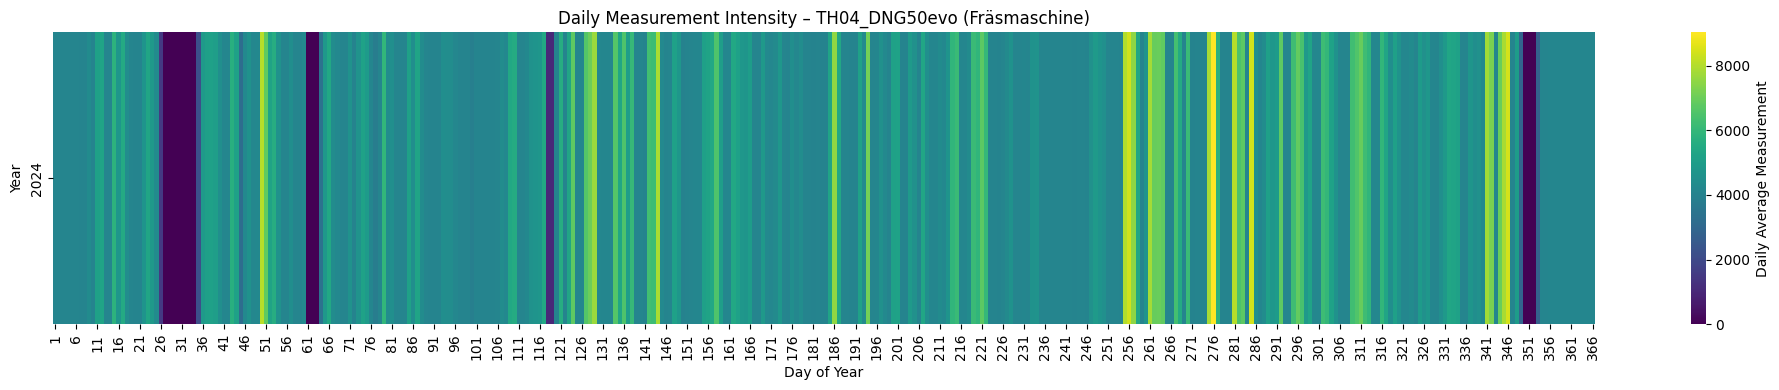

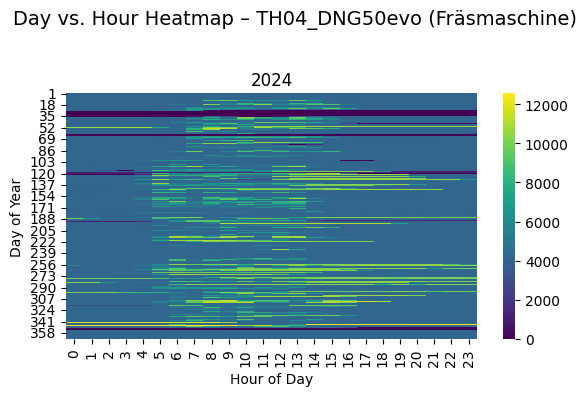

✔️  Loading TH05_MV2400R for 2024


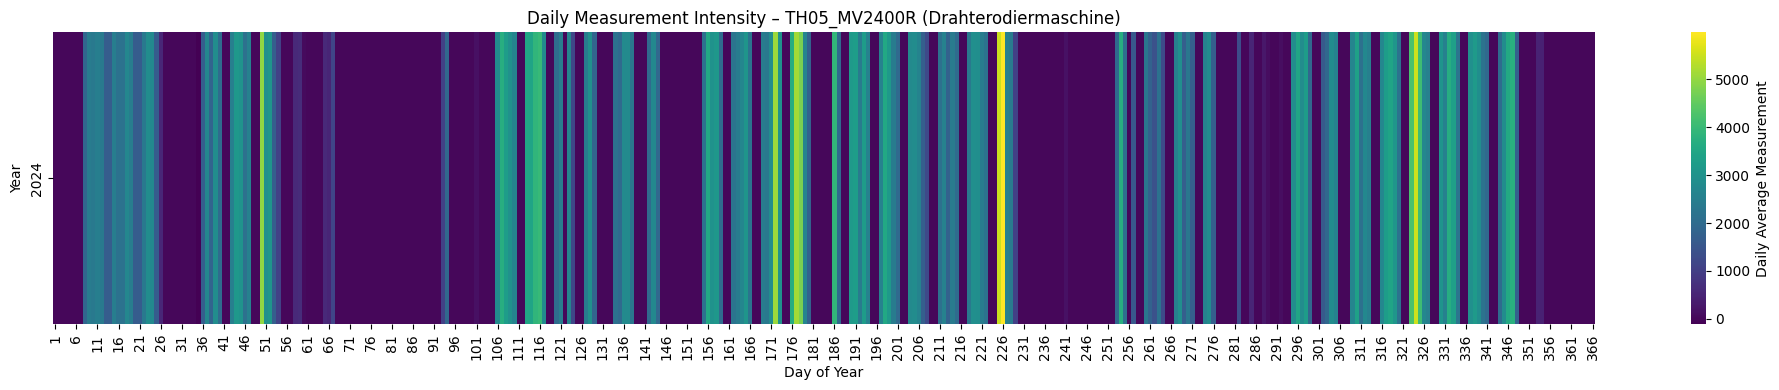

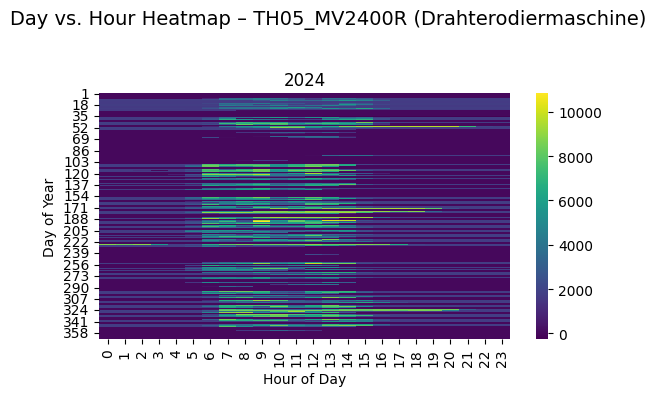

✔️  Loading TH06_Chiron800 for 2024


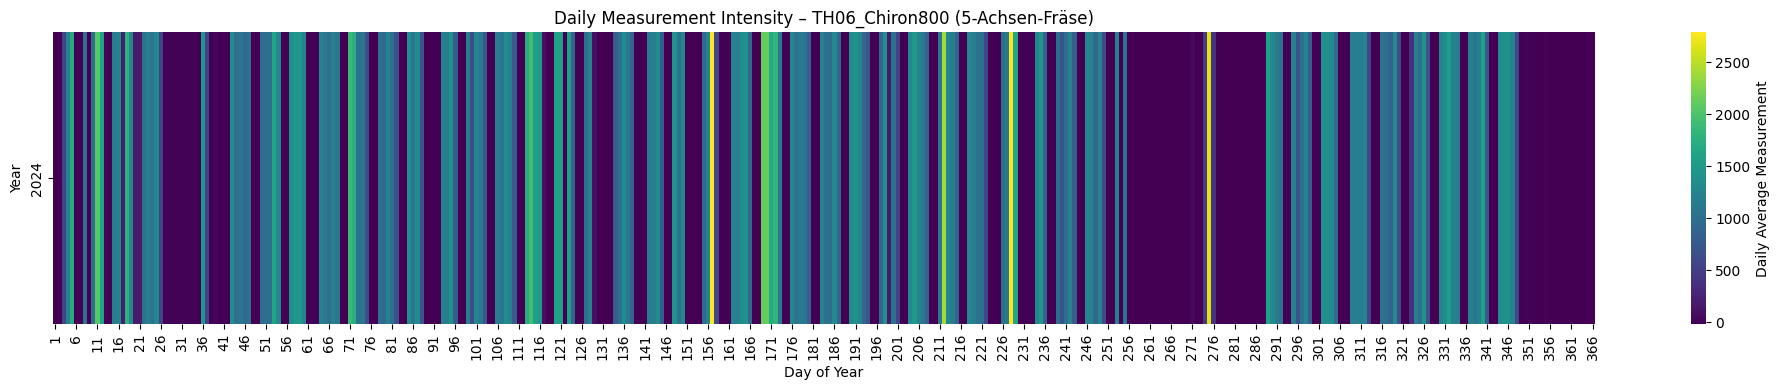

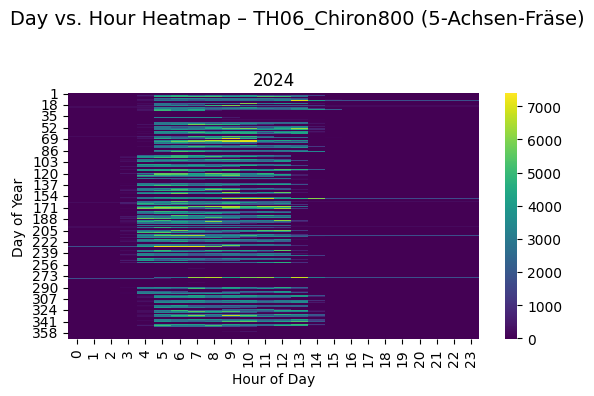

✔️  Loading TH08_DMU125MB for 2024


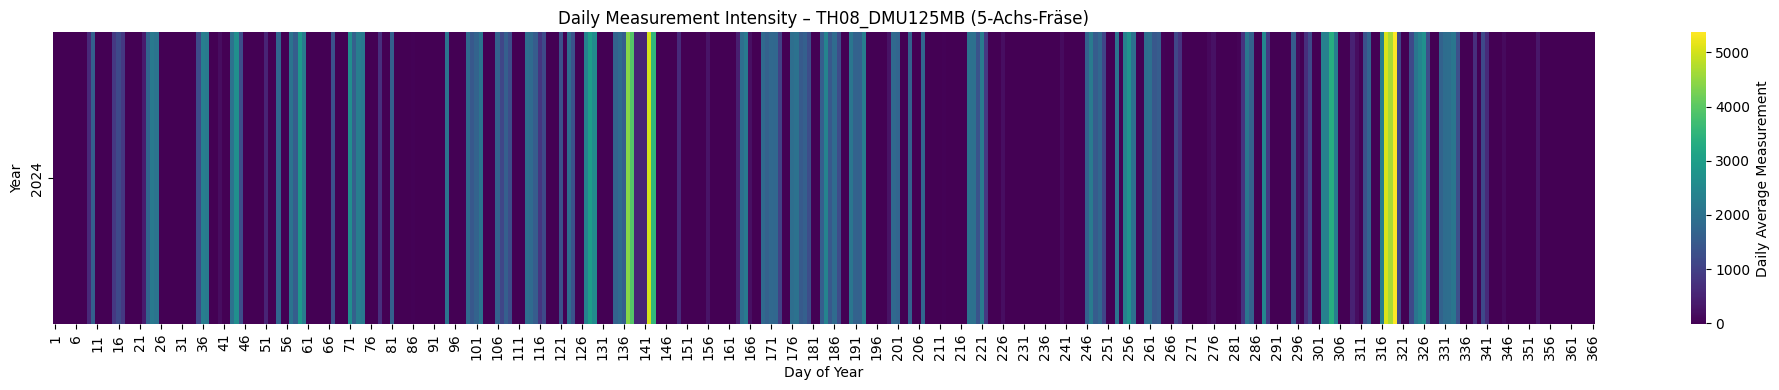

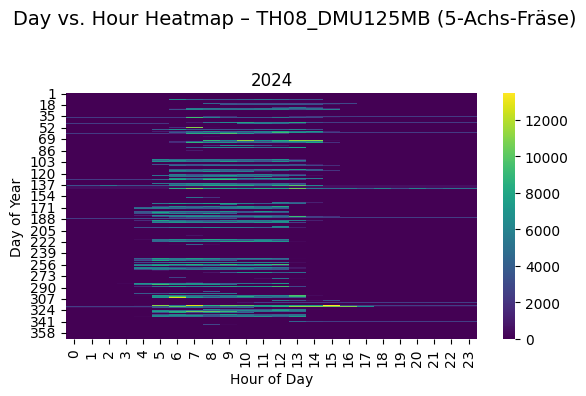

✔️  Loading TH09_E110 for 2024


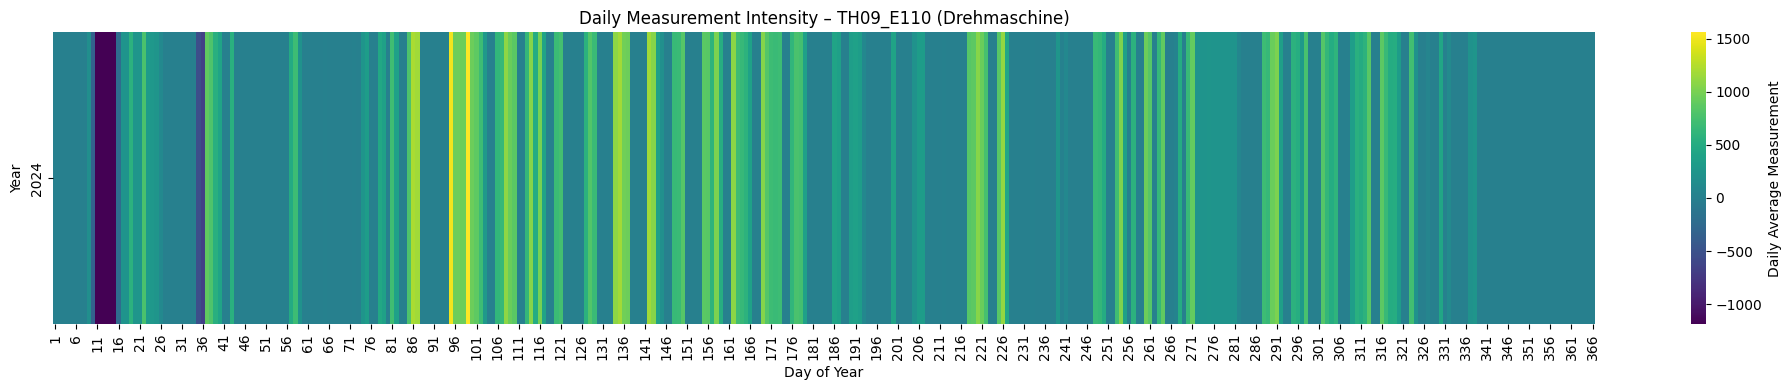

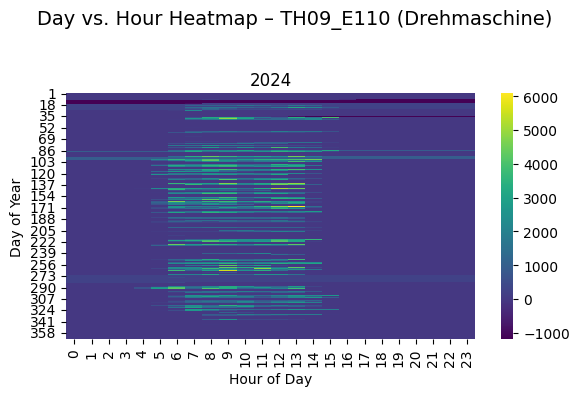

✔️  Loading TH10_CFST161 for 2024


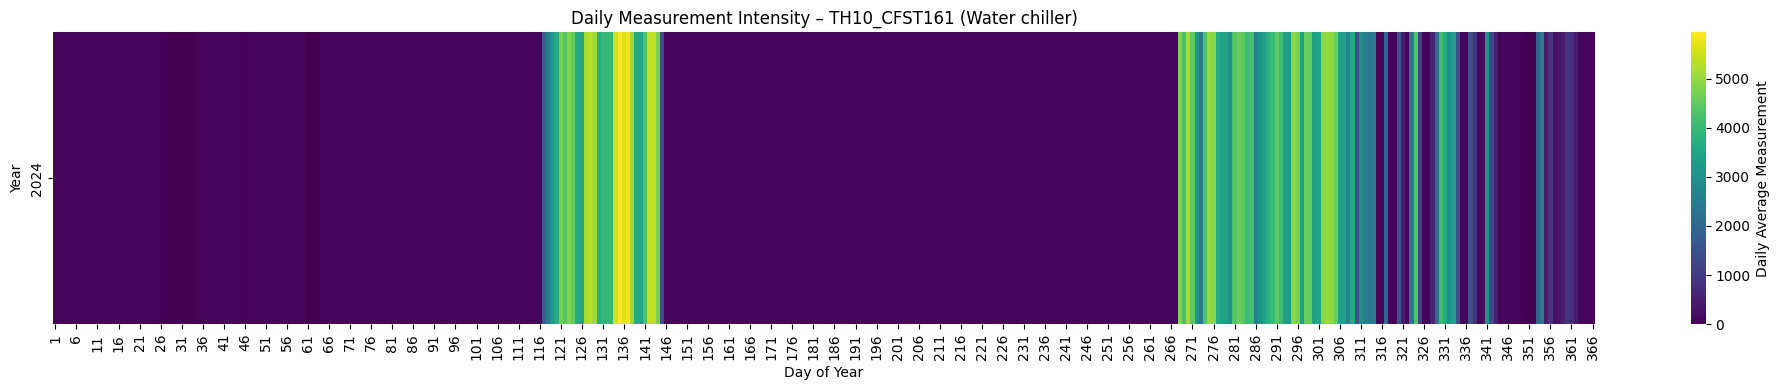

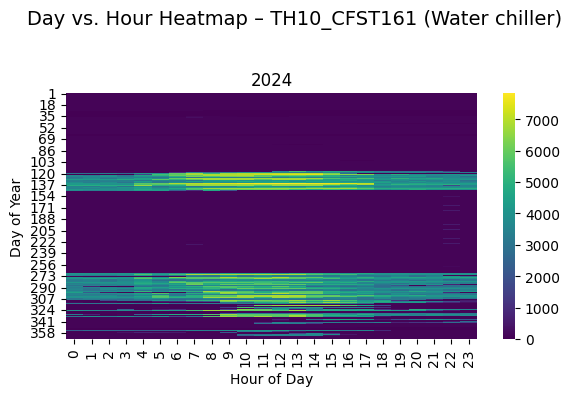

✔️  Loading TH11_JWA24 for 2024


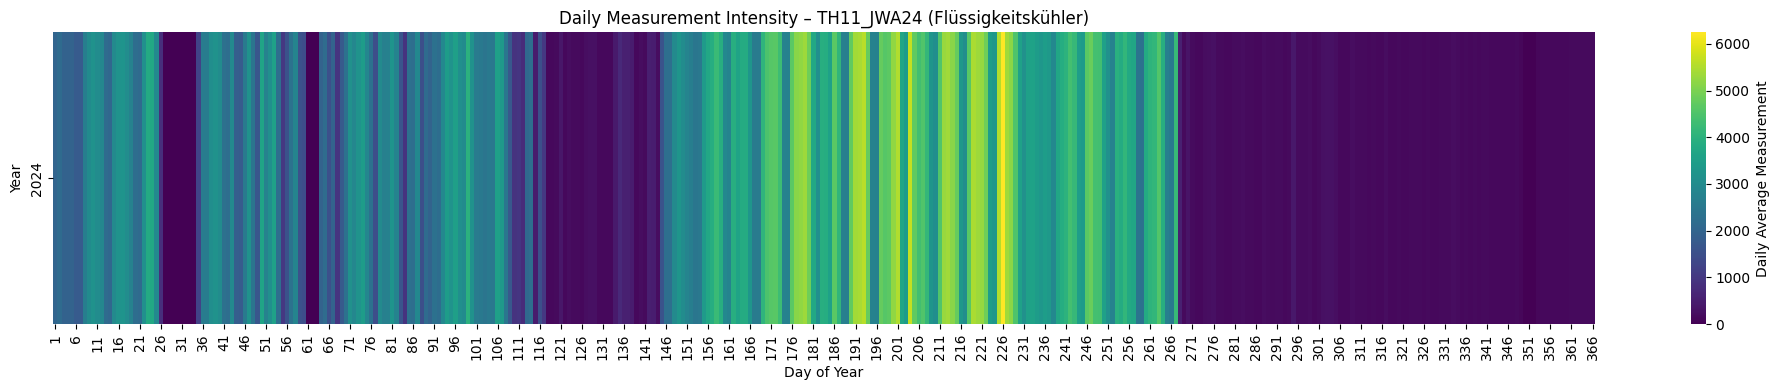

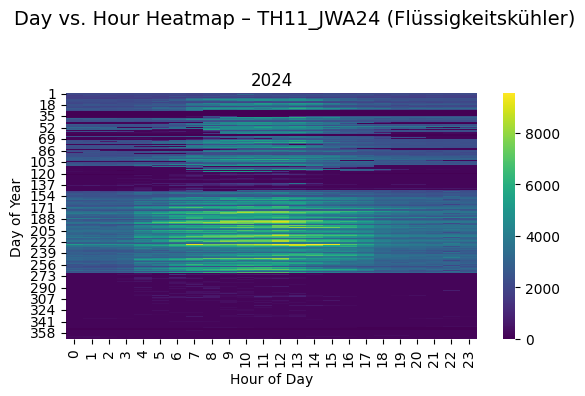

In [12]:
machine_names = {
    "TH01_E30D2": "Drehmaschine",
    "TH02_48S": "Drehmaschine",
    "TH03_CTX800TC": "Drehfräsen",
    "TH04_DNG50evo": "Fräsmaschine",
    "TH05_MV2400R": "Drahterodiermaschine",
    "TH06_Chiron800": "5-Achsen-Fräse",
    #"TH07_DMF3008": "5-Achs-Fräse",
    "TH08_DMU125MB": "5-Achs-Fräse",
    "TH09_E110": "Drehmaschine",
    "TH10_CFST161": "Water chiller",
    "TH11_JWA24": "Flüssigkeitskühler",
}



years = [2024]
for machine_id, machine_name in machine_names.items():
    df_per_year = {}

    for year in years:
        file_path = f"backupDaten/TH/{machine_id}_{year}.csv"
        if os.path.exists(file_path):
            print(f"✔️  Loading {machine_id} for {year}")
            df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
            df_full = preprocess_data_minute_resolution(df, year)
            df_per_year[year] = df_full
        else:
            print(f"⚠️  Missing file: {file_path}")

    if df_per_year:
        plot_combined_heatmaps(df_per_year, machine_id, machine_name)

In [ ]:
# Load Data
#df = pd.read_csv("backupDaten/AVT/AVT01__2020.csv", index_col="Date", parse_dates=True).sort_index()

C:\Users\rs1044\AppData\Local\Temp\ipykernel_6920\170529989.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('T').mean()  # 'T' = minute, 'S' = second


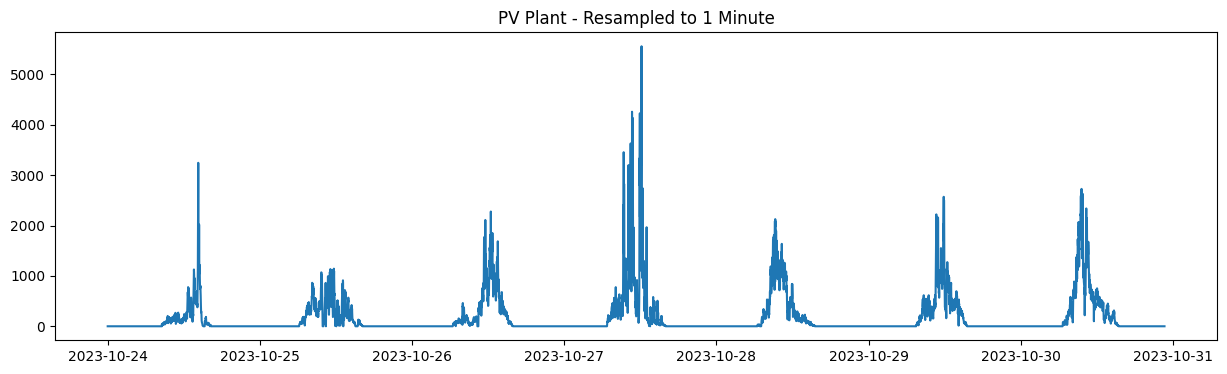

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Path to data
data_path = "backupDaten/PV/"
machines = [f"PVPlantIpe_EnMaSy"]

file_path = os.path.join(data_path, f"PVPlantIpe_EnMaSy.csv")
df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
df_resampled = df.resample('T').mean()  # 'T' = minute, 'S' = second

plt.figure(figsize=(15, 4))
plt.plot(df_resampled[:10000])
plt.title("PV Plant - Resampled to 1 Minute")
plt.show()

    

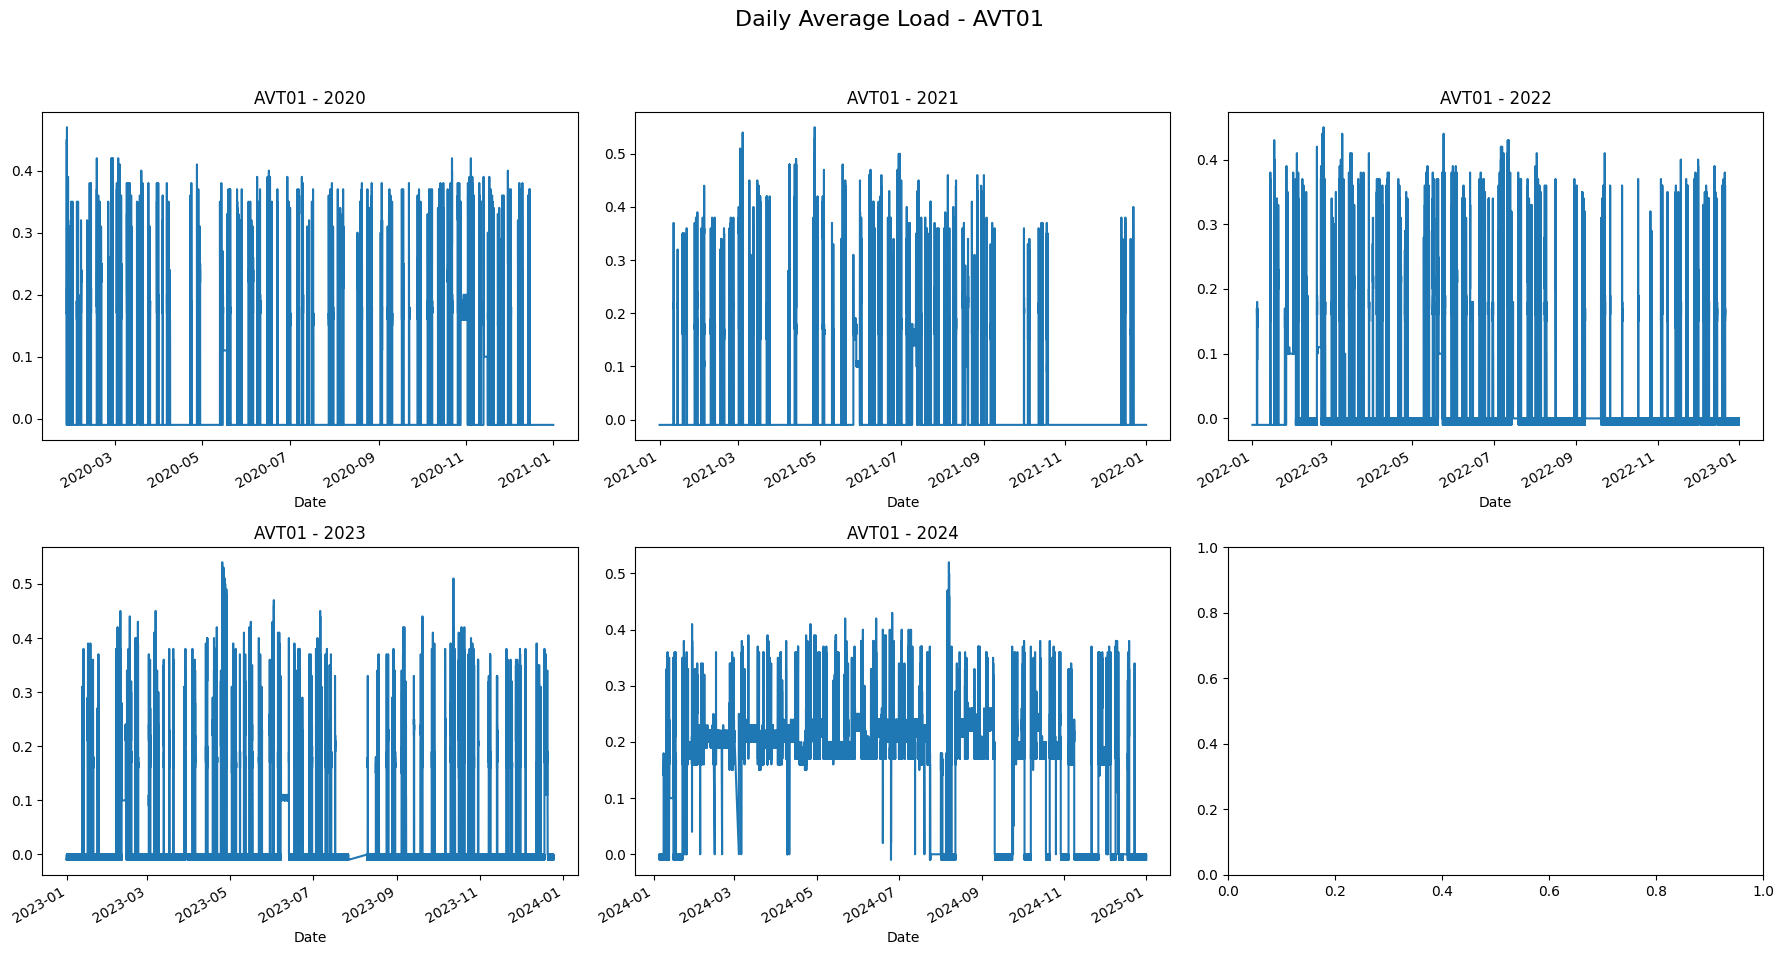

KeyboardInterrupt: 

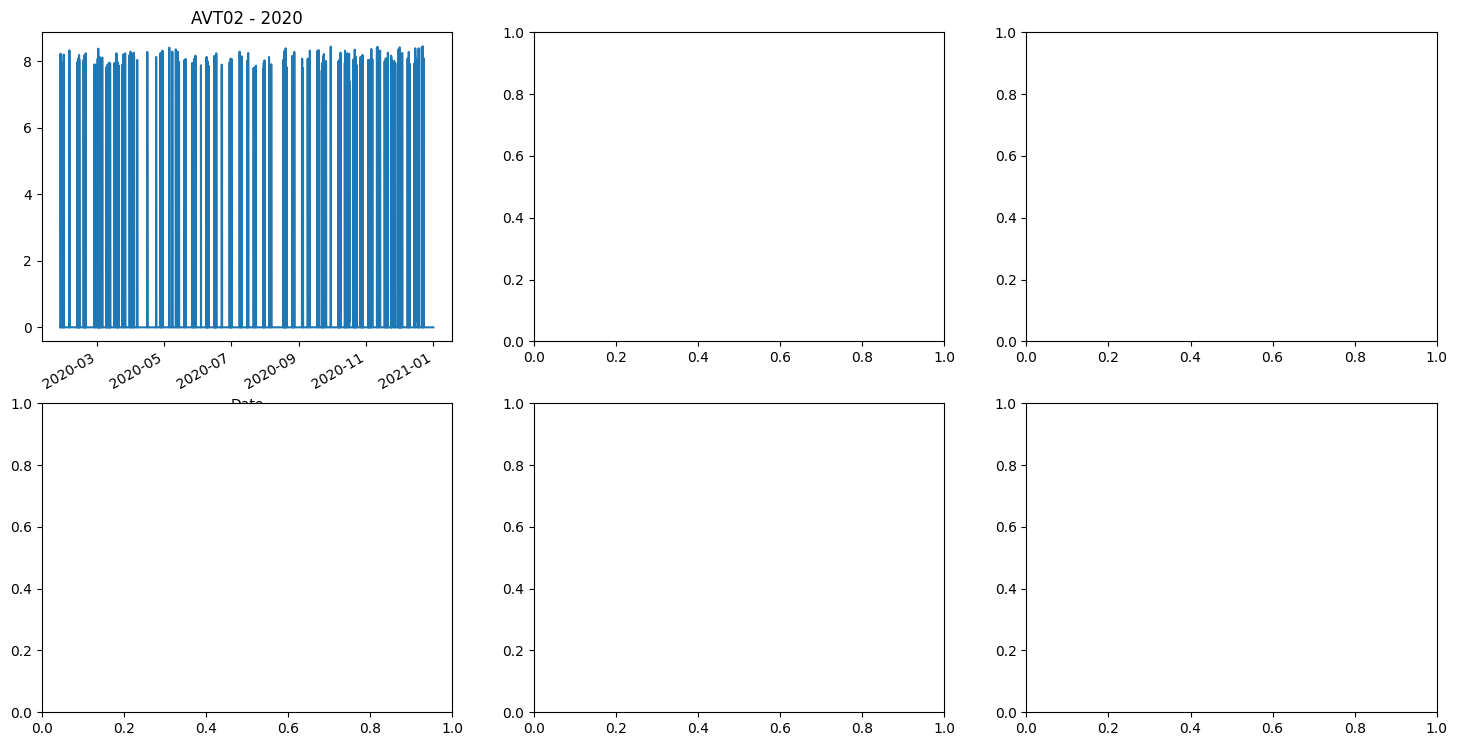

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Path to data
data_path = "backupDaten/AVT/"
machines = [f"AVT{str(i).zfill(2)}" for i in range(1, 14)]
years = [2020, 2021, 2022, 2023, 2024]

# Iterate over each machine
for machine in machines:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, year in enumerate(years):
        file_path = os.path.join(data_path, f"{machine}_{year}.csv")
        if os.path.exists(file_path):
            df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
            df_daily = df#.resample("D").mean()
            ax = axes[idx]
            df_daily.plot(ax=ax, legend=False)
            ax.set_title(f"{machine} - {year}")

    fig.suptitle(f"Daily Average Load - {machine}", fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


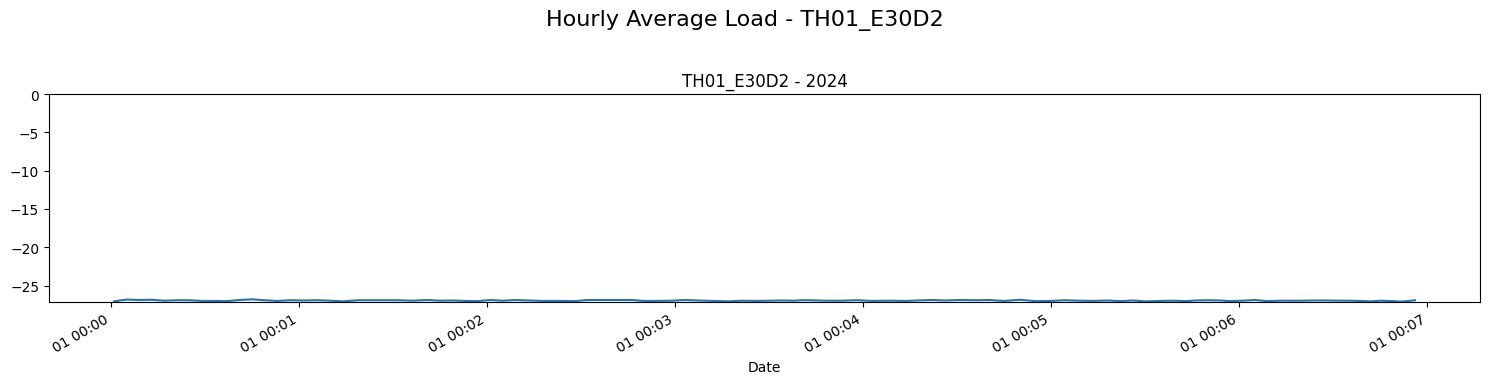

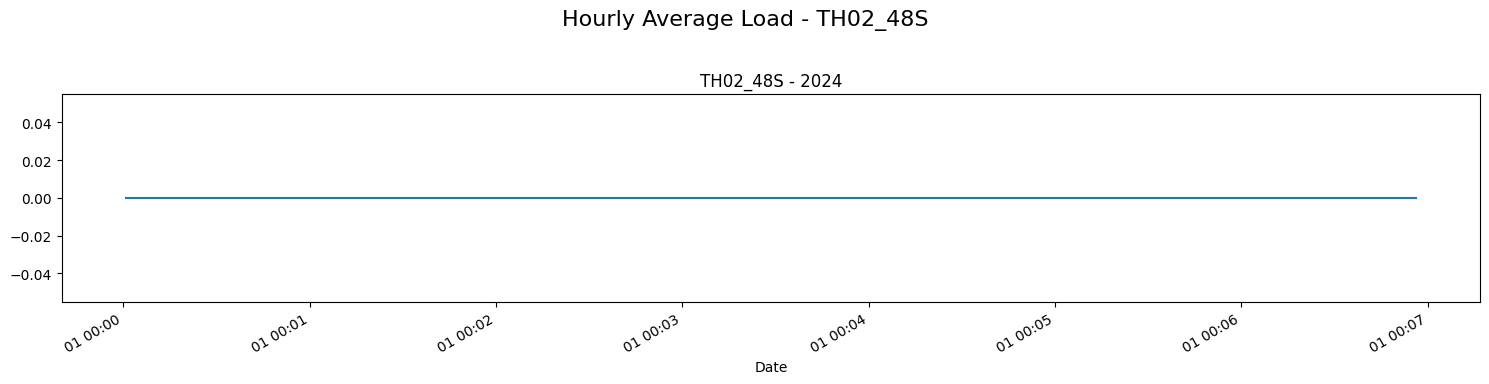

KeyboardInterrupt: 

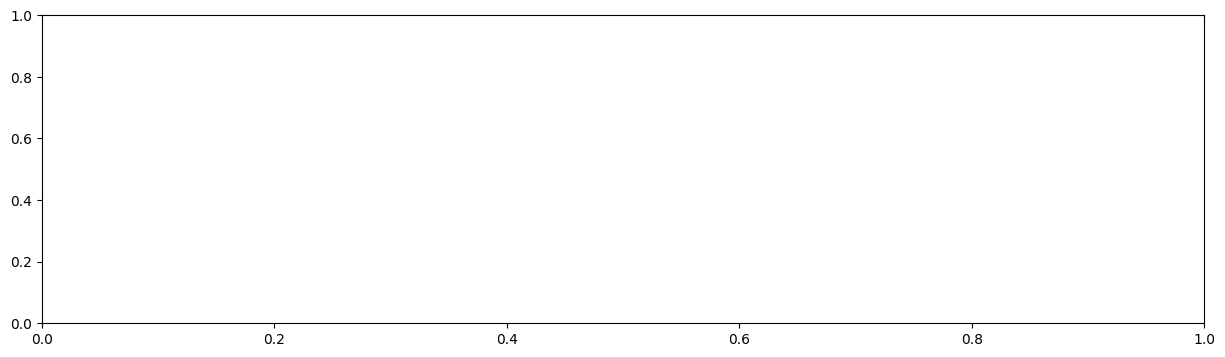

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define tables and years
tables = [
    "TH01_E30D2", "TH02_48S", "TH03_CTX800TC", "TH04_DNG50evo", "TH05_MV2400R",
    "TH06_Chiron800", "TH07_DMF3008", "TH08_DMU125MB", "TH09_E110", "TH10_CFST161", "TH11_JWA24"
]
years = [2024]
data_path = "backupDaten/TH/"  # Adjust path if necessary

# Iterate over each machine
for table in tables:
    fig, ax = plt.subplots(1, 1, figsize=(15, 4))  # changed axes -> ax

    file_path = os.path.join(data_path, f"{table}_2024.csv")  # removed loop over years
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, index_col="Date", parse_dates=True).sort_index()
        df_hourly = df[:100]#.resample("T").mean()  # keep resampling to "h"W, D, h, m
        df_hourly.plot(ax=ax, legend=False)
        ax.set_title(f"{table} - 2024")

        # Ensure y-axis includes 0
        ymin, ymax = ax.get_ylim()
        ax.set_ylim(min(0, ymin), max(0, ymax))

    fig.suptitle(f"Hourly Average Load - {table}", fontsize=16)  # optional title change
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
